In [1]:
import hvplot.pandas
#from bokeh.sampledata.penguins import data as df

#df.hvplot.scatter(x='bill_length_mm', y='bill_depth_mm', by='species')

In [2]:
import s3fs
s3 = s3fs.S3FileSystem(anon=False)
from math import cos, asin, sqrt
import re

import numpy as np
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
import os
import rioxarray as rio
import xarray as xr
import rasterio
import glob
from shapely.errors import ShapelyDeprecationWarning
from shapely.geometry import Point
import warnings
import folium
import datetime
import time
from folium import plugins
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 
#import contextily as cx
from shapely.geometry import box
import sys
from datetime import datetime, timedelta
from itertools import chain

from datetime import date
from bs4 import BeautifulSoup
import requests

In [3]:
sys.path.insert(0, '/projects/old_shared/fire_weather_vis/base-fwi-vis/')
import fwiVis.fwiVis as fv

path = "/projects/old_shared/fire_weather_vis/Lightning_analysis/fwi_timeline_only/April_1_unmerged_fires_with_FWI.csv"
#path = "/projects/old_shared/fire_weather_vis/Lightning_analysis/fwi_timeline_merge/Final_dataset_as_of_20240209.csv"
fire3 = fv.prep_fire_files(path)

ciffc = pd.read_csv("/projects/old_shared/fire_weather_vis/Lightning_analysis/CIFFC_data/ciffc_all_canada.csv")
ciffc = ciffc[ciffc.field_agency_code == "qc"]

ciffc = gpd.GeoDataFrame(ciffc, geometry= gpd.points_from_xy(ciffc.field_longitude, ciffc.field_latitude), crs = "4326")
ciffc = ciffc.to_crs("3571")

In [4]:
fire3 = fire3.sort_values(by = ["fireID", "t"])
fire3 = fire3[~fire3.FWI.isna()]
#fire3.farea = fire3.farea.astype("int64")
fire3 = fire3.sjoin(ciffc)
fire3["farea_diff"] = fire3.groupby("fireID").farea.diff()

row_mask = (~fire3.fireID.str.contains("_"))

#fire3[row_mask].hvplot.scatter(x='FWI', y='farea_diff', hover_cols=['fireID', 't'])
#fire3[row_mask].plot.scatter(x='FWI', y='farea_diff')

fire3

fireID                    t  \
0      10013  2023-06-12 12:00:00   
34     10013  2023-06-13 12:00:00   
11     10013  2023-06-14 12:00:00   
9      10013  2023-06-15 12:00:00   
35     10013  2023-06-16 12:00:00   
...      ...                  ...   
10187   9844  2023-06-16 12:00:00   
10185   9844  2023-06-17 12:00:00   
10182   9844  2023-06-18 12:00:00   
10197   9844  2023-06-19 12:00:00   
10198   9844  2023-06-20 12:00:00   

                                                geometry  Unnamed: 1 fireID.1  \
0      POLYGON ((3868319.743 1377440.691, 3868318.910...           0    10013   
34     POLYGON ((3870131.435 1376371.419, 3870130.993...          34    10013   
11     POLYGON ((3870131.435 1376371.419, 3870130.993...          11    10013   
9      POLYGON ((3870131.435 1376371.419, 3870130.993...           9    10013   
35     POLYGON ((3870131.435 1376371.419, 3870130.993...          35    10013   
...                                                  ...         ...      ...   
10187  POLYGON ((3761451.195 1210897.091, 3761463.735...           7     9844   
10185  POLYGON ((3761451.195 1210897.091, 3761463.735...           5     9844   
10182  POLYGON ((3761463.735 1210883.977, 3761474.949...           2     9844   
10197  POLYGON ((3761484.731 1210854.430, 3761492.990...          17     9844   
10198  POLYGON ((3761647.815 1210495.430, 3761648.441...          18     9844   

                                            csv_geometry  n_pixels  \
0      POLYGON ((3868319.742936663 1377440.6913960252...      28.0   
34     POLYGON ((3870131.4348988147 1376371.418622353...      93.0   
11     POLYGON ((3870131.4348988147 1376371.418622353...      93.0   
9      POLYGON ((3870131.4348988147 1376371.418622353...      93.0   
35     POLYGON ((3870131.4348988147 1376371.418622353...      93.0   
...                                                  ...       ...   
10187  POLYGON ((3761451.1948491456 1210897.091133758...     173.0   
10185  POLYGON ((3761451.1948491456 1210897.091133758...     173.0   
10182  POLYGON ((3761463.734856431 1210883.9767765, 3...     175.0   
10197  POLYGON ((3761484.730815426 1210854.4295433327...     262.0   
10198  POLYGON ((3761647.815397185 1210495.429570253,...     643.0   

       n_newpixels      farea     fperim  ...  field_situation_report_date  \
0             26.0   4.883534   8.467518  ...     2023-06-12T08:00:00.000Z   
34            39.0  14.597305  15.447063  ...     2023-06-12T08:00:00.000Z   
11             0.0  14.597305  15.447063  ...     2023-06-12T08:00:00.000Z   
9              0.0  14.597305  15.447063  ...     2023-06-12T08:00:00.000Z   
35             0.0  14.597305  15.447063  ...     2023-06-12T08:00:00.000Z   
...            ...        ...        ...  ...                          ...   
10187          0.0  16.532646  20.643700  ...     2023-06-10T22:37:00.000Z   
10185          0.0  16.532646  20.643700  ...     2023-06-10T22:37:00.000Z   
10182          2.0  17.629704  22.216951  ...     2023-06-10T22:37:00.000Z   
10197         85.0  27.781409  32.388533  ...     2023-06-10T22:37:00.000Z   
10198        280.0  64.468739  39.922001  ...     2023-06-10T22:37:00.000Z   

              field_status_date  field_stage_of_control_status  \
0      2023-11-10T13:19:14.000Z                            OUT   
34     2023-11-10T13:19:14.000Z                            OUT   
11     2023-11-10T13:19:14.000Z                            OUT   
9      2023-11-10T13:19:14.000Z                            OUT   
35     2023-11-10T13:19:14.000Z                            OUT   
...                         ...                            ...   
10187  2023-11-22T16:37:30.000Z                            OUT   
10185  2023-11-22T16:37:30.000Z                            OUT   
10182  2023-11-22T16:37:30.000Z                            OUT   
10197  2023-11-22T16:37:30.000Z                            OUT   
10198  2023-11-22T16:37:30.000Z                            OUT   

       field_syst

In [5]:
fire3 = fire3.sort_values(by = ["fireID", "t"])
fire3 = fire3[~fire3.FWI.isna()]
#fire3.farea = fire3.farea.astype("int64")
fire3["farea_diff"] = fire3.groupby("fireID").farea.diff()

row_mask = (~fire3.fireID.str.contains("_"))
fire3[row_mask]
#fire3[row_mask].hvplot.scatter(x='FWI', y='farea_diff', hover_cols=['fireID', 't'])
#fire3[row_mask].plot.scatter(x='FWI', y='farea_diff')

fireID                    t  \
0      10013  2023-06-12 12:00:00   
34     10013  2023-06-13 12:00:00   
11     10013  2023-06-14 12:00:00   
9      10013  2023-06-15 12:00:00   
35     10013  2023-06-16 12:00:00   
...      ...                  ...   
10187   9844  2023-06-16 12:00:00   
10185   9844  2023-06-17 12:00:00   
10182   9844  2023-06-18 12:00:00   
10197   9844  2023-06-19 12:00:00   
10198   9844  2023-06-20 12:00:00   

                                                geometry  Unnamed: 1 fireID.1  \
0      POLYGON ((3868319.743 1377440.691, 3868318.910...           0    10013   
34     POLYGON ((3870131.435 1376371.419, 3870130.993...          34    10013   
11     POLYGON ((3870131.435 1376371.419, 3870130.993...          11    10013   
9      POLYGON ((3870131.435 1376371.419, 3870130.993...           9    10013   
35     POLYGON ((3870131.435 1376371.419, 3870130.993...          35    10013   
...                                                  ...         ...      ...   
10187  POLYGON ((3761451.195 1210897.091, 3761463.735...           7     9844   
10185  POLYGON ((3761451.195 1210897.091, 3761463.735...           5     9844   
10182  POLYGON ((3761463.735 1210883.977, 3761474.949...           2     9844   
10197  POLYGON ((3761484.731 1210854.430, 3761492.990...          17     9844   
10198  POLYGON ((3761647.815 1210495.430, 3761648.441...          18     9844   

                                            csv_geometry  n_pixels  \
0      POLYGON ((3868319.742936663 1377440.6913960252...      28.0   
34     POLYGON ((3870131.4348988147 1376371.418622353...      93.0   
11     POLYGON ((3870131.4348988147 1376371.418622353...      93.0   
9      POLYGON ((3870131.4348988147 1376371.418622353...      93.0   
35     POLYGON ((3870131.4348988147 1376371.418622353...      93.0   
...                                                  ...       ...   
10187  POLYGON ((3761451.1948491456 1210897.091133758...     173.0   
10185  POLYGON ((3761451.1948491456 1210897.091133758...     173.0   
10182  POLYGON ((3761463.734856431 1210883.9767765, 3...     175.0   
10197  POLYGON ((3761484.730815426 1210854.4295433327...     262.0   
10198  POLYGON ((3761647.815397185 1210495.429570253,...     643.0   

       n_newpixels      farea     fperim  ...  field_situation_report_date  \
0             26.0   4.883534   8.467518  ...     2023-06-12T08:00:00.000Z   
34            39.0  14.597305  15.447063  ...     2023-06-12T08:00:00.000Z   
11             0.0  14.597305  15.447063  ...     2023-06-12T08:00:00.000Z   
9              0.0  14.597305  15.447063  ...     2023-06-12T08:00:00.000Z   
35             0.0  14.597305  15.447063  ...     2023-06-12T08:00:00.000Z   
...            ...        ...        ...  ...                          ...   
10187          0.0  16.532646  20.643700  ...     2023-06-10T22:37:00.000Z   
10185          0.0  16.532646  20.643700  ...     2023-06-10T22:37:00.000Z   
10182          2.0  17.629704  22.216951  ...     2023-06-10T22:37:00.000Z   
10197         85.0  27.781409  32.388533  ...     2023-06-10T22:37:00.000Z   
10198        280.0  64.468739  39.922001  ...     2023-06-10T22:37:00.000Z   

              field_status_date  field_stage_of_control_status  \
0      2023-11-10T13:19:14.000Z                            OUT   
34     2023-11-10T13:19:14.000Z                            OUT   
11     2023-11-10T13:19:14.000Z                            OUT   
9      2023-11-10T13:19:14.000Z                            OUT   
35     2023-11-10T13:19:14.000Z                            OUT   
...                         ...                            ...   
10187  2023-11-22T16:37:30.000Z                            OUT   
10185  2023-11-22T16:37:30.000Z                            OUT   
10182  2023-11-22T16:37:30.000Z                            OUT   
10197  2023-11-22T16:37:30.000Z                            OUT   
10198  2023-11-22T16:37:30.000Z                            OUT   

       field_syst

In [6]:
fire3["FWI_diff"] = fire3.groupby("fireID").FWI.diff()
fire3["farea_diff"] = fire3.groupby("fireID").farea.diff()

row_mask = (~fire3.fireID.str.contains("_"))

#fire3[row_mask].hvplot.scatter(x='FWI_diff', y='farea_diff', hover_cols=['fireID', 't'])
#fire3[row_mask].plot.scatter(x='FWI', y='farea_diff')

In [7]:
fire3["FWI_rolling"] = fire3.groupby("fireID").FWI.rolling(3).max().reset_index(drop = True)

#fire3.groupby("fireID").FWI.rolling(3).mean()

In [8]:
row_mask = (~fire3.fireID.str.contains("_"))

#fire3[row_mask].hvplot.scatter(x='FWI_rolling', y='farea_diff', hover_cols=['fireID', 't'])

In [9]:
row_mask = (~fire3.fireID.str.contains("_")) & (fire3.farea_diff > 0.1)

#fire3[row_mask].hvplot.scatter(x='FWI_rolling', y='farea', hover_cols=['fireID', 't'])

In [10]:
# test = fire3.groupby("fireID").day_of_fire.max()
# test



### Get fireIDs that last longer than three days

def normalize_fwi(df, col = "FWI"):
    #print(df[col].mean())
    df[col+"_norm"] = df[col]/df[col].mean()
    return(df)

fire3 = fire3.groupby("fireID").apply(normalize_fwi).reset_index(drop = True)

/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 167 rows containing missing values.


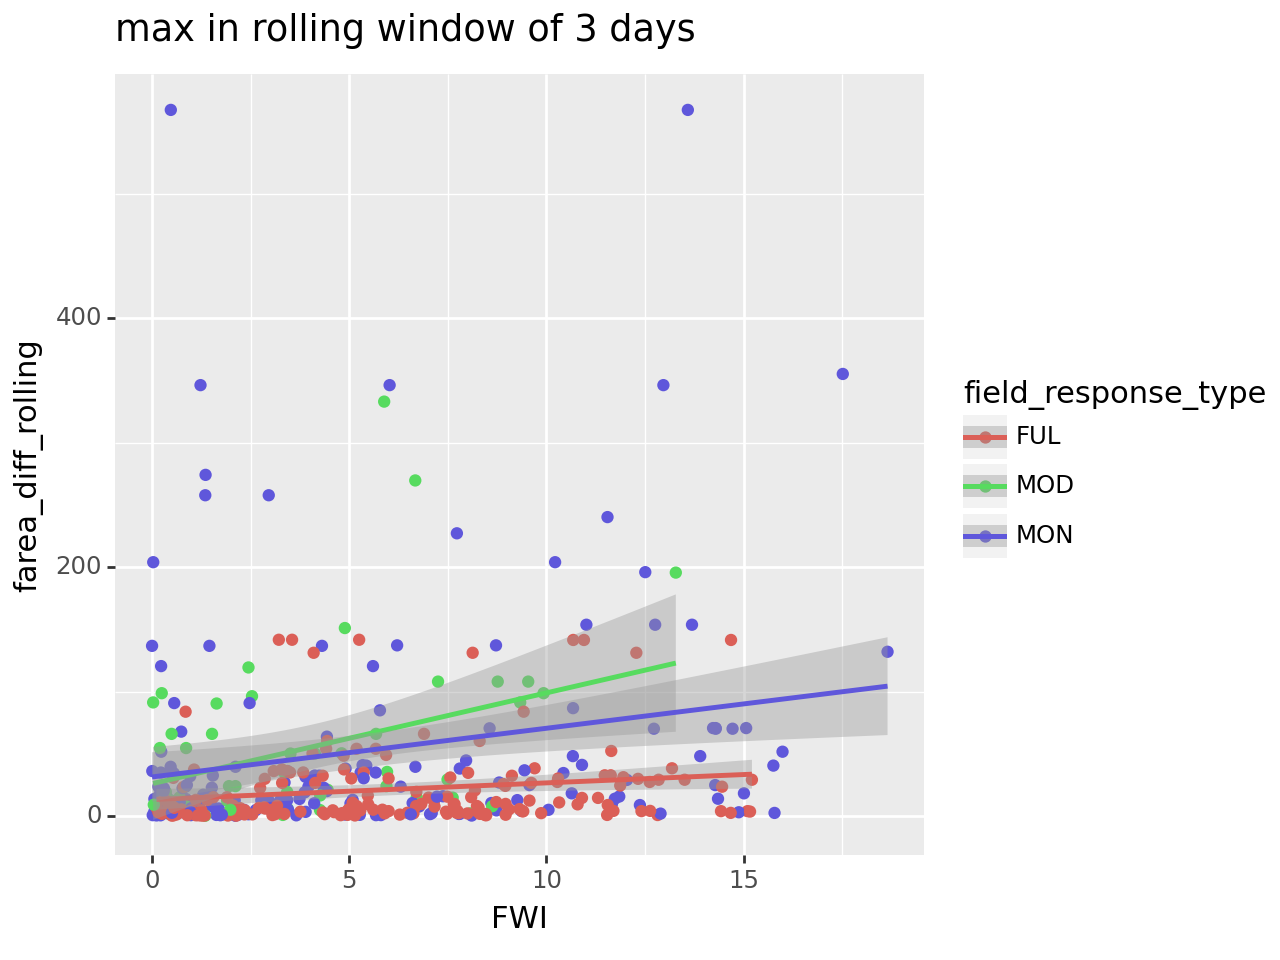

/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 167 rows containing missing values.


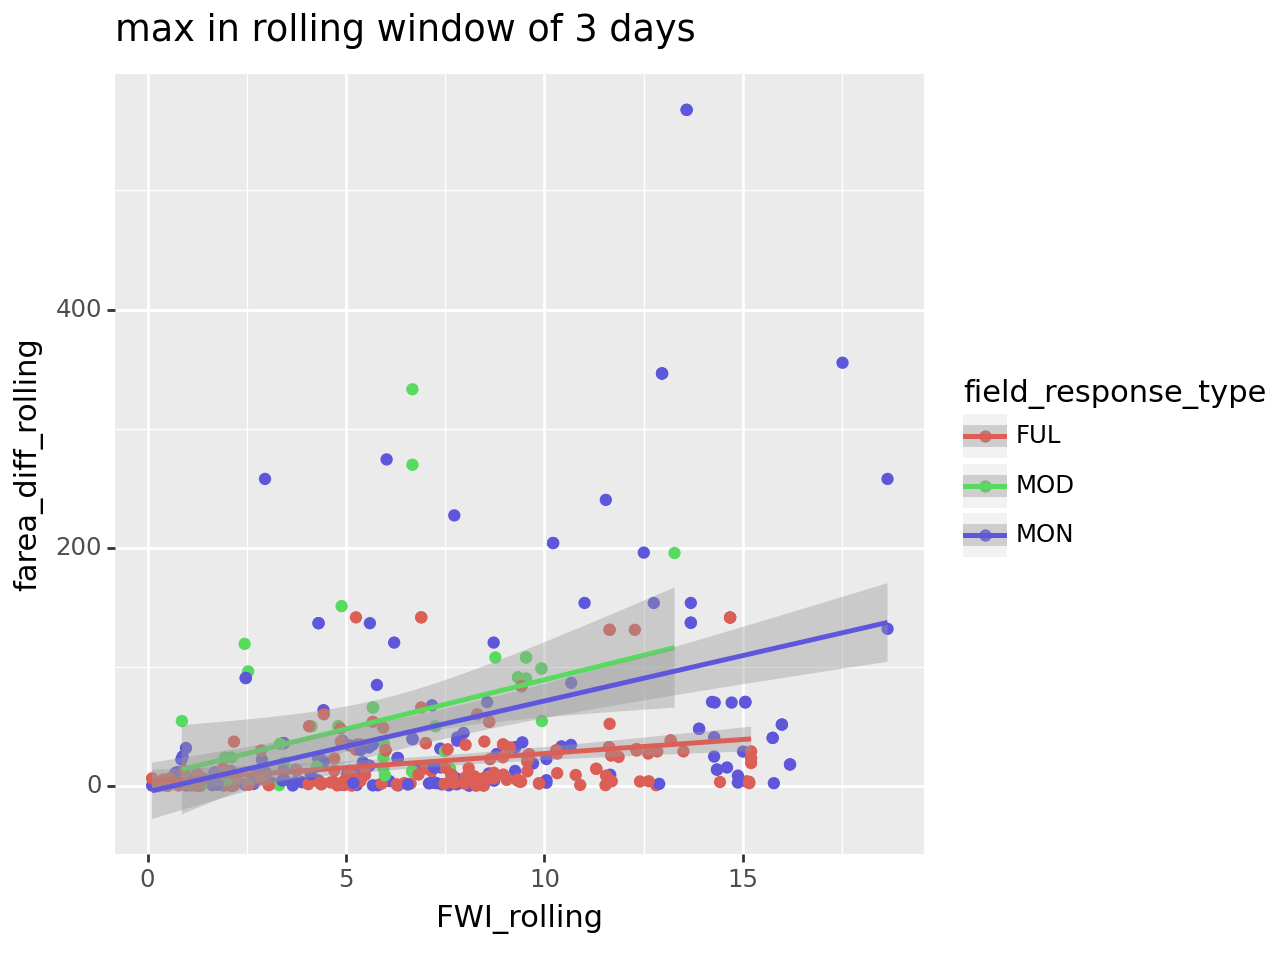

/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 167 rows containing missing values.


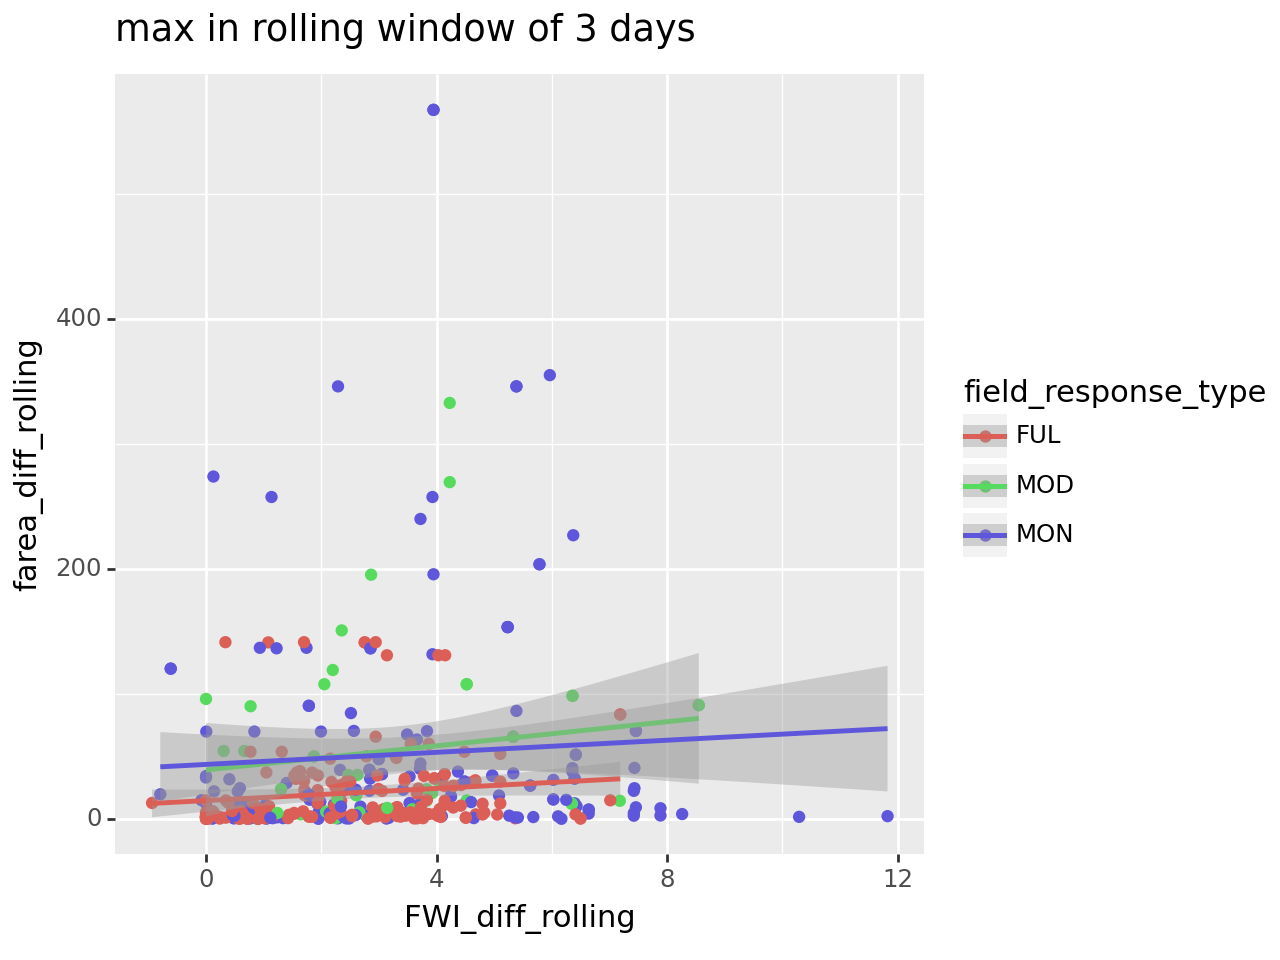

/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 167 rows containing missing values.


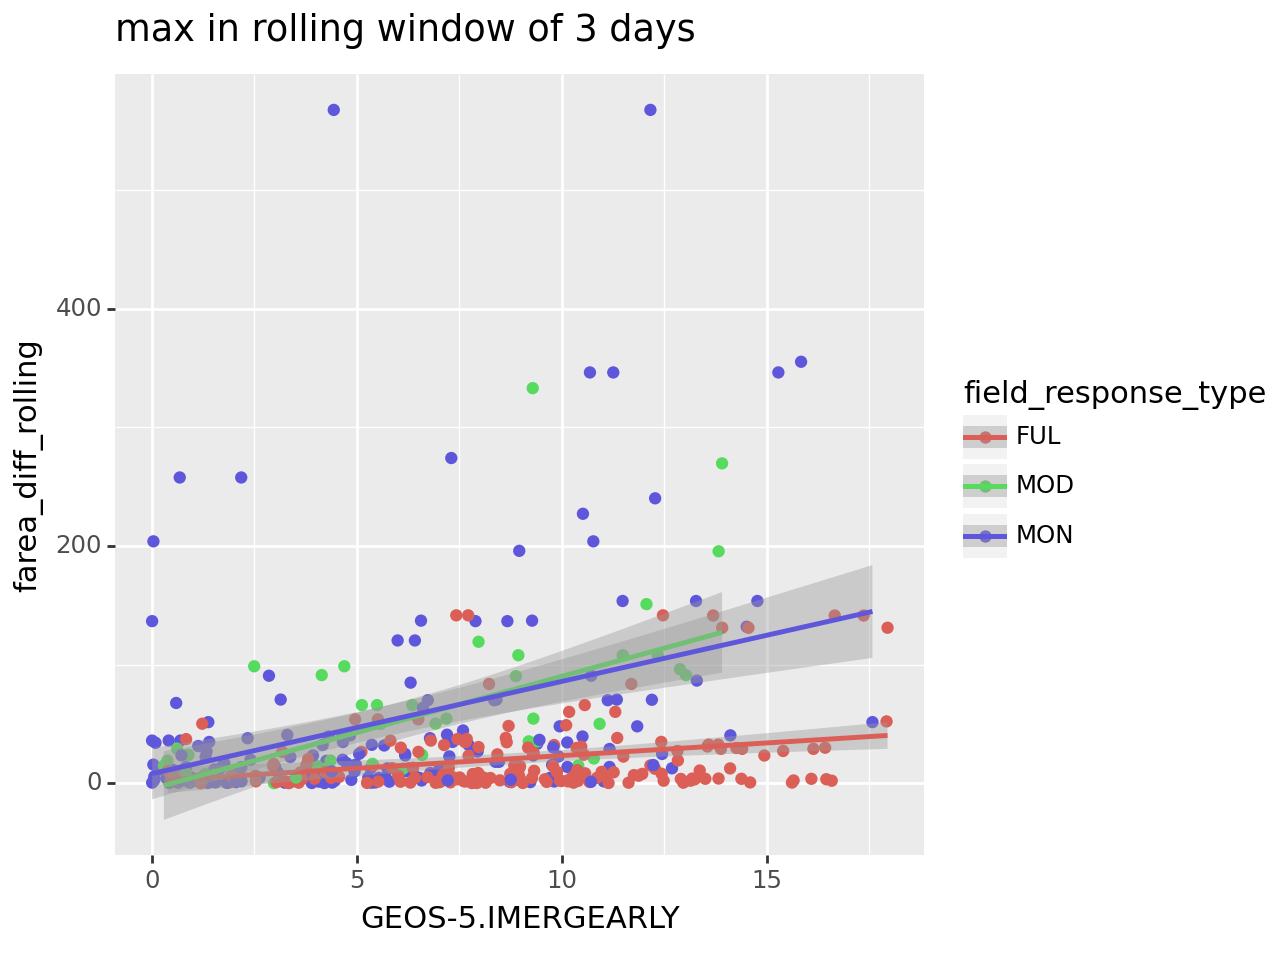

/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 167 rows containing missing values.


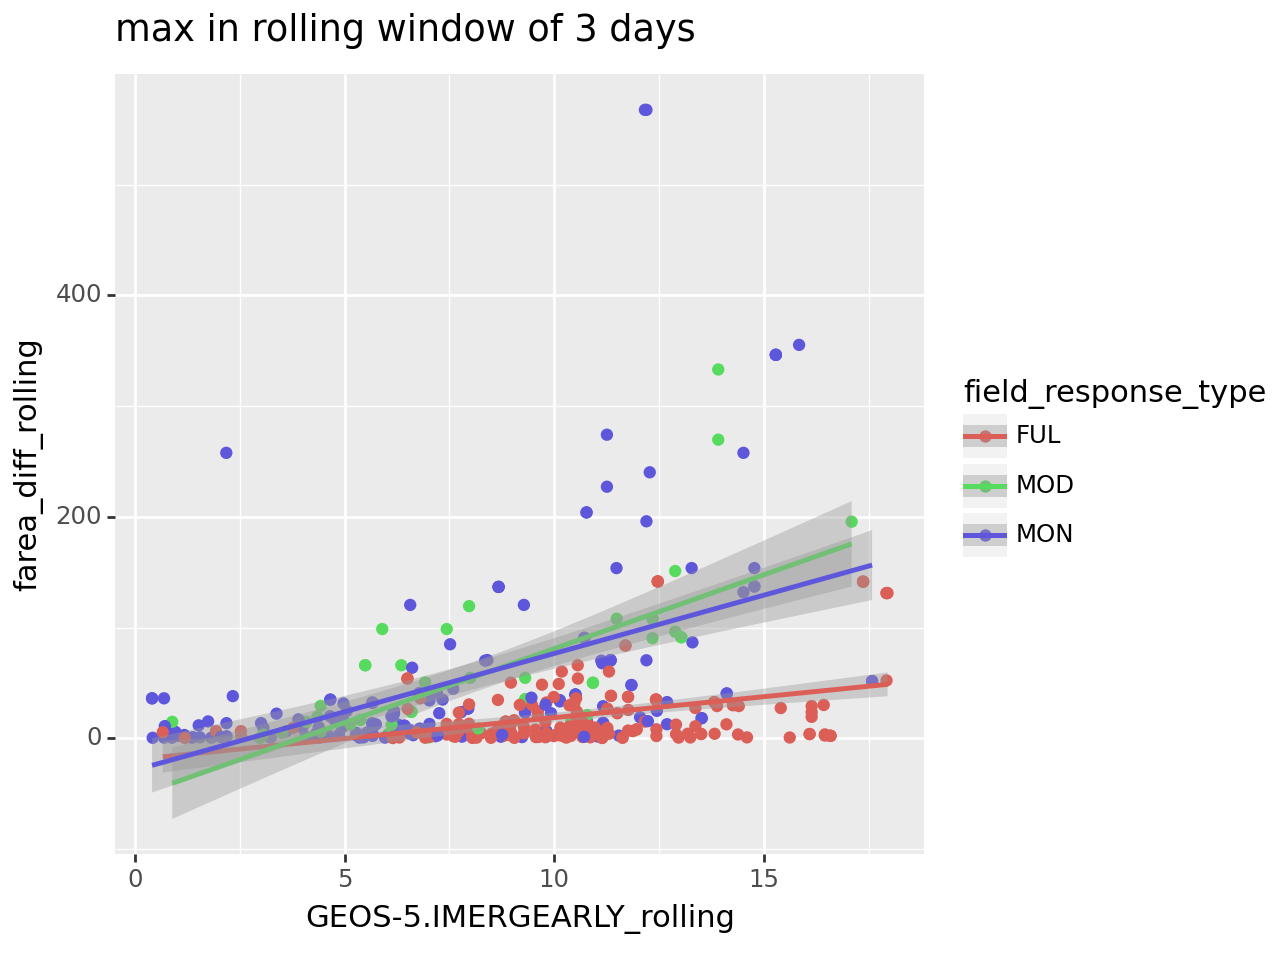

In [11]:
#import numpy as np
from matplotlib import pyplot as plt
from plotnine import ggplot, geom_point, geom_jitter, aes, stat_smooth, facet_wrap
import plotnine as plotnine

### Some useful vars to color by 
def assign_day_of_fire(df):
    df = df.sort_values(by = "t")
    df['day_of_fire'] = df.t.rank()
    #df['day_of_fire'] = df['day_of_fire'].astype("int64")
    return(df)


fire3 = fire3.groupby("fireID").apply(assign_day_of_fire).reset_index(drop = True)
fire3["farea_shifted"] = fire3.groupby("fireID").farea.shift(periods = 1)

fire3["normalized_farea_diff"] = fire3.farea_diff/fire3.farea_shifted

rolling_num = 3
agg_function = "max" # max

fire3["FWI_rolling"] = fire3.groupby("fireID").FWI.rolling(rolling_num).agg(agg_function).reset_index(drop = True)
fire3["FWI_norm_rolling"] = fire3.groupby("fireID").FWI_norm.rolling(rolling_num).agg(agg_function).reset_index(drop = True)
fire3["FWI_diff_rolling"] = fire3.groupby("fireID").FWI_diff.rolling(rolling_num).agg(agg_function).reset_index(drop = True)
fire3['farea_rolling'] = fire3.groupby("fireID").farea.rolling(rolling_num).agg(agg_function).reset_index(drop = True)
fire3['farea_diff_rolling'] = fire3.groupby("fireID").farea_diff.rolling(rolling_num).agg(agg_function).reset_index(drop = True)
fire3["GEOS-5.IMERGEARLY_rolling"] = fire3.groupby("fireID")["GEOS-5.IMERGEARLY"].rolling(rolling_num).agg(agg_function).reset_index(drop = True)

long_fires = fire3[fire3.day_of_fire > 3].fireID.unique()
#fire3['max_dof'] = fire3.groupby("fireID").day_of_fire.max()

row_mask = (~fire3.fireID.str.contains("_")) & (fire3.farea_diff > 0.1) & (fire3.fireID.isin(long_fires)) #& fire3['max_dof'] >= 3#& (fire3.max_duration >= 3)

#x_var = ["FWI","FWI_rolling", "FWI_diff_rolling", "FWI_norm_rolling"]
#y_var = ['farea', "normalized_farea_diff", 'farea_rolling', 'farea_diff_rolling']


x_var = ["FWI","FWI_rolling", "FWI_diff_rolling", "GEOS-5.IMERGEARLY", "GEOS-5.IMERGEARLY_rolling"]
y_var = [ 'farea_diff_rolling']

for x in x_var:
    for y in y_var:
        #p = (ggplot(fire3[row_mask], aes( x = x, y = y, color = 'field_latitude'))
        p = (ggplot(fire3[row_mask], aes( x = x, y = y, color = "field_response_type"))
        #p = (ggplot(fire3[row_mask], aes( x = x, y = y, color = "farea_shifted"))
         + geom_point()
         + plotnine.labels.ylab(y)
         + plotnine.labels.xlab(x)
         + stat_smooth(method = "glm", formula = "y ~ x")
         #+ plotnine.scale_y_log10()
         + plotnine.ggtitle(f"{agg_function} in rolling window of {rolling_num} days")

         )
        print(p)
        #del(p)

        
        

## Trying to narrow things down to just publication-level figures. 

In [12]:
# fire3.columns
fire3["GEOS5_IMERGEARLY_rolling"] = fire3["GEOS-5.IMERGEARLY_rolling"]

fire3["log_farea_diff_rolling"] = np.log(fire3["farea_diff_rolling"] + 0.999)

In [13]:
#zip_model = sm.ZeroInflatedPoisson.from_formula(formula, data=df, inflation='probit').fit()
#print(zip_model.summary())

In [14]:
# print(zip_model.aic)

# ?sm.ZeroInflatedPoisson

In [15]:
#smf.glm
fire3.loc[row_mask, ['fireID', 't',  'GEOS-5.IMERGEARLY', 'FWI',
'field_response_type', 
'FWI_rolling', 'farea_diff_rolling', 'GEOS-5.IMERGEARLY_rolling',"GEOS5_IMERGEARLY_rolling"]].field_response_type

1       MON
23      MOD
24      MOD
29      MOD
30      MOD
       ... 
6918    MON
6919    MON
6924    MON
6925    MON
6926    MON
Name: field_response_type, Length: 565, dtype: object

In [16]:
### Need to implement a color bar for fill_between
# rgb_values.reverse()
# rgb_values

farea_diff_rolling ~ GEOS5_IMERGEARLY_rolling:C(field_response_type)
                 Generalized Linear Model Regression Results                  
Dep. Variable:     farea_diff_rolling   No. Observations:                  398
Model:                            GLM   Df Residuals:                      394
Model Family:                Gaussian   Df Model:                            3
Link Function:                    Log   Scale:                          3398.9
Method:                          IRLS   Log-Likelihood:                -2180.8
Date:                Tue, 16 Jul 2024   Deviance:                   1.3392e+06
Time:                        13:16:28   Pearson chi2:                 1.34e+06
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3630
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------

/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.


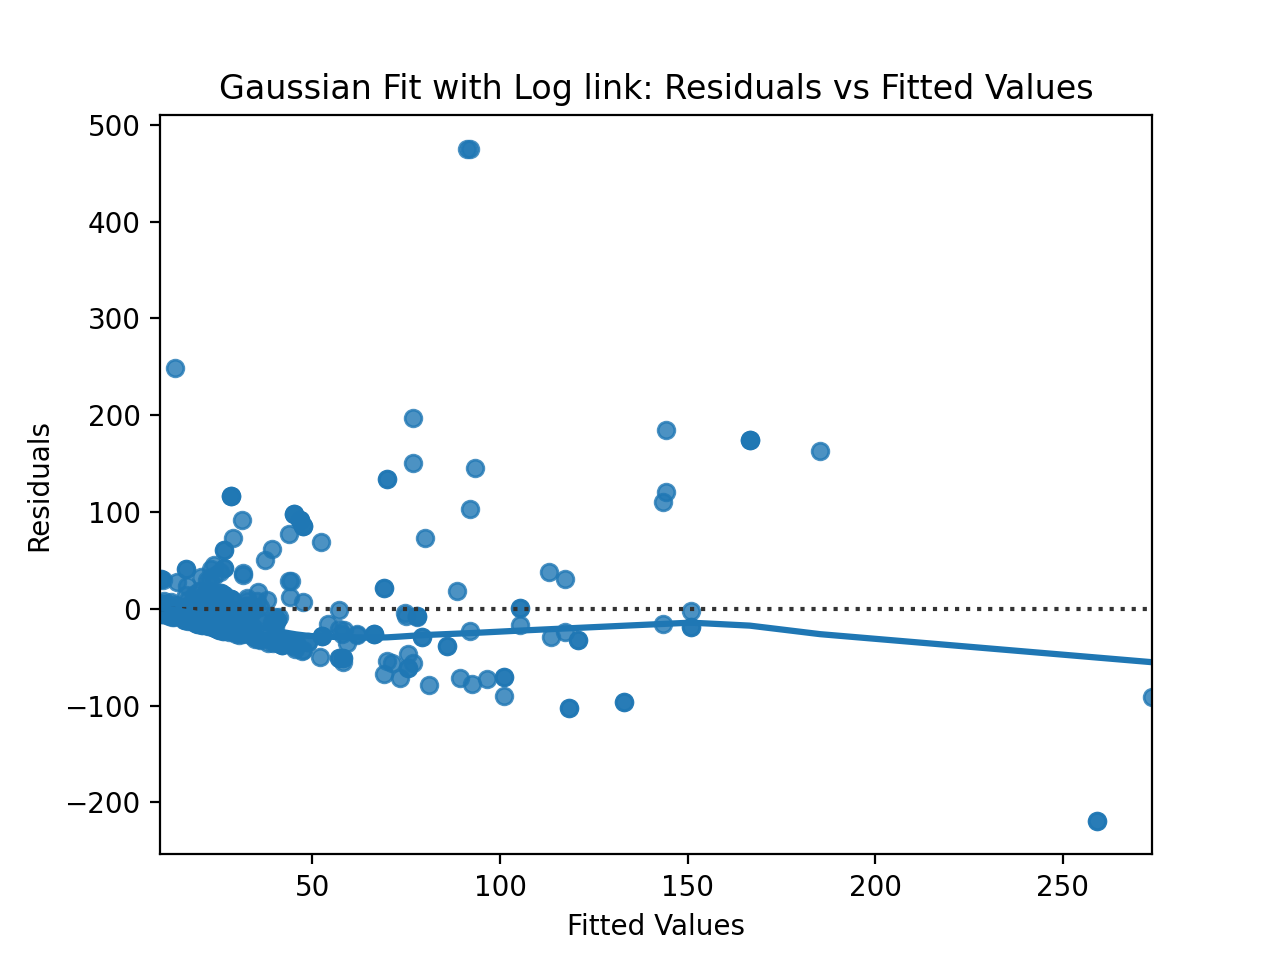

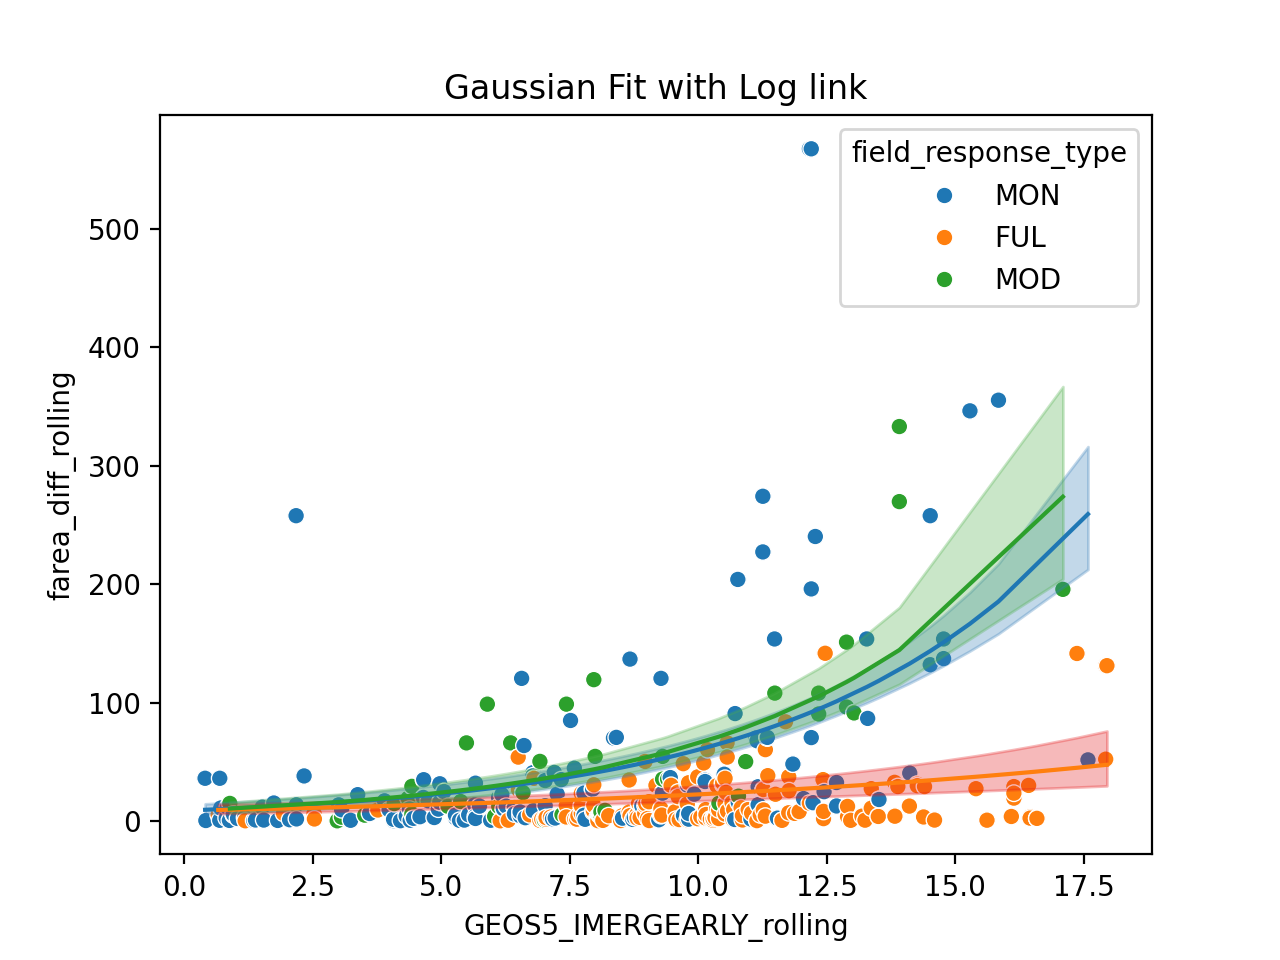

                 Generalized Linear Model Regression Results                  
Dep. Variable:     farea_diff_rolling   No. Observations:                  398
Model:                            GLM   Df Residuals:                      394
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                          3557.1
Method:                          IRLS   Log-Likelihood:                -2189.9
Date:                Tue, 16 Jul 2024   Deviance:                   1.4015e+06
Time:                        13:16:30   Pearson chi2:                 1.40e+06
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3209
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.


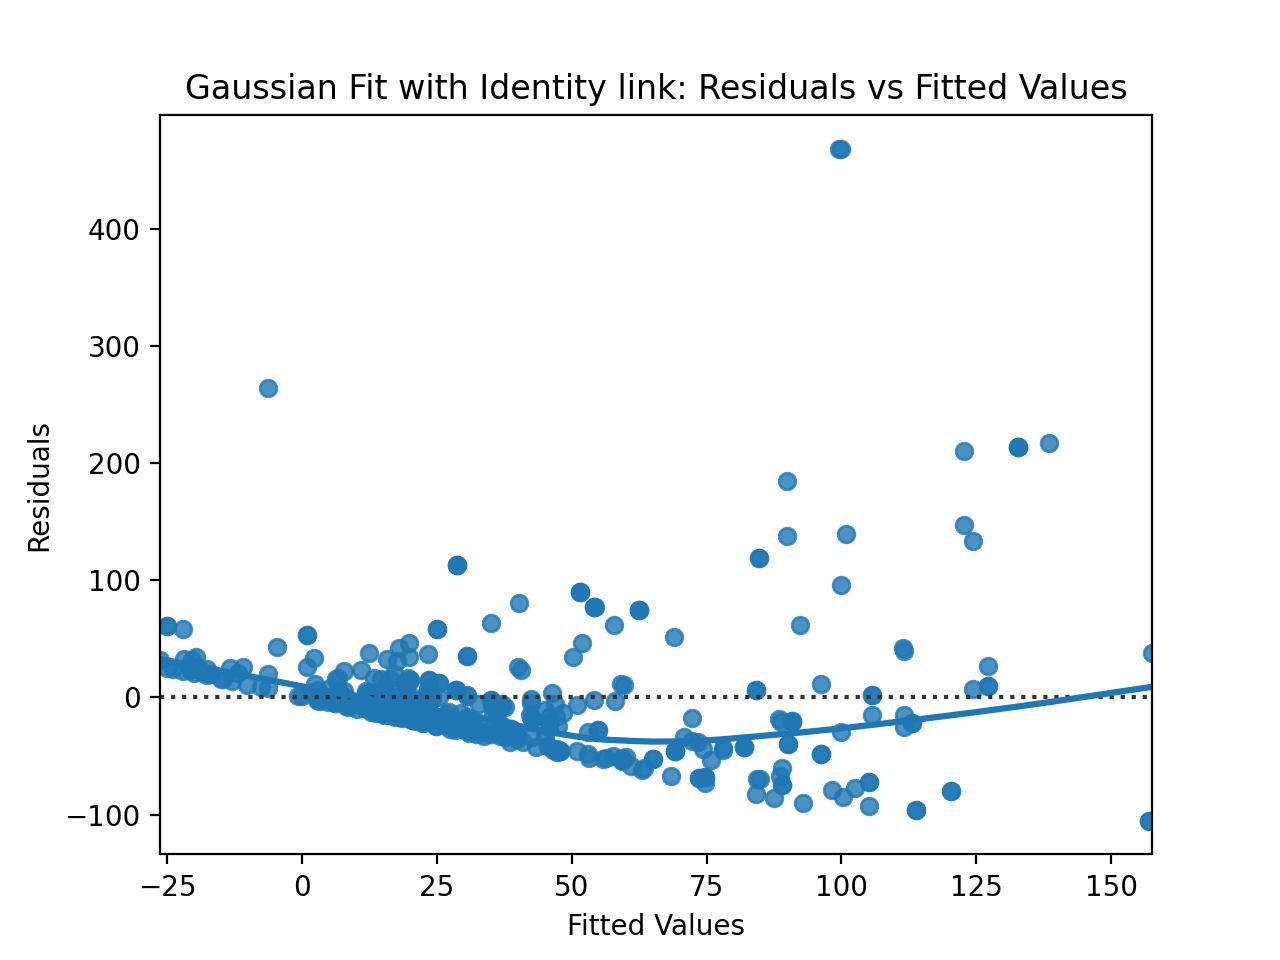

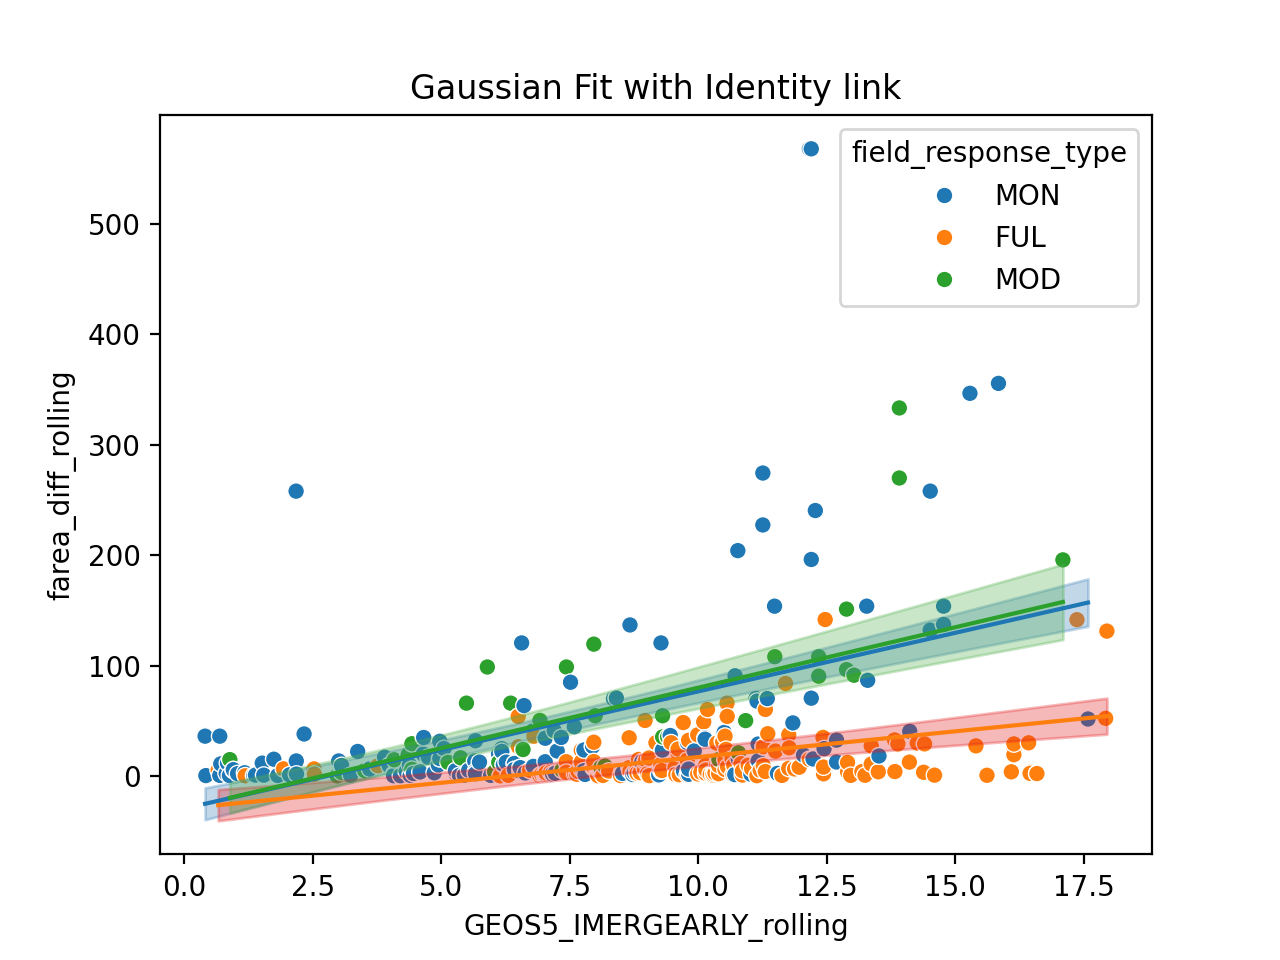

                 Generalized Linear Model Regression Results                  
Dep. Variable:     farea_diff_rolling   No. Observations:                  398
Model:                            GLM   Df Residuals:                      394
Model Family:                   Gamma   Df Model:                            3
Link Function:                    Log   Scale:                          2.5748
Method:                          IRLS   Log-Likelihood:                -1754.5
Date:                Tue, 16 Jul 2024   Deviance:                       657.91
Time:                        13:16:31   Pearson chi2:                 1.01e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.2283
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.


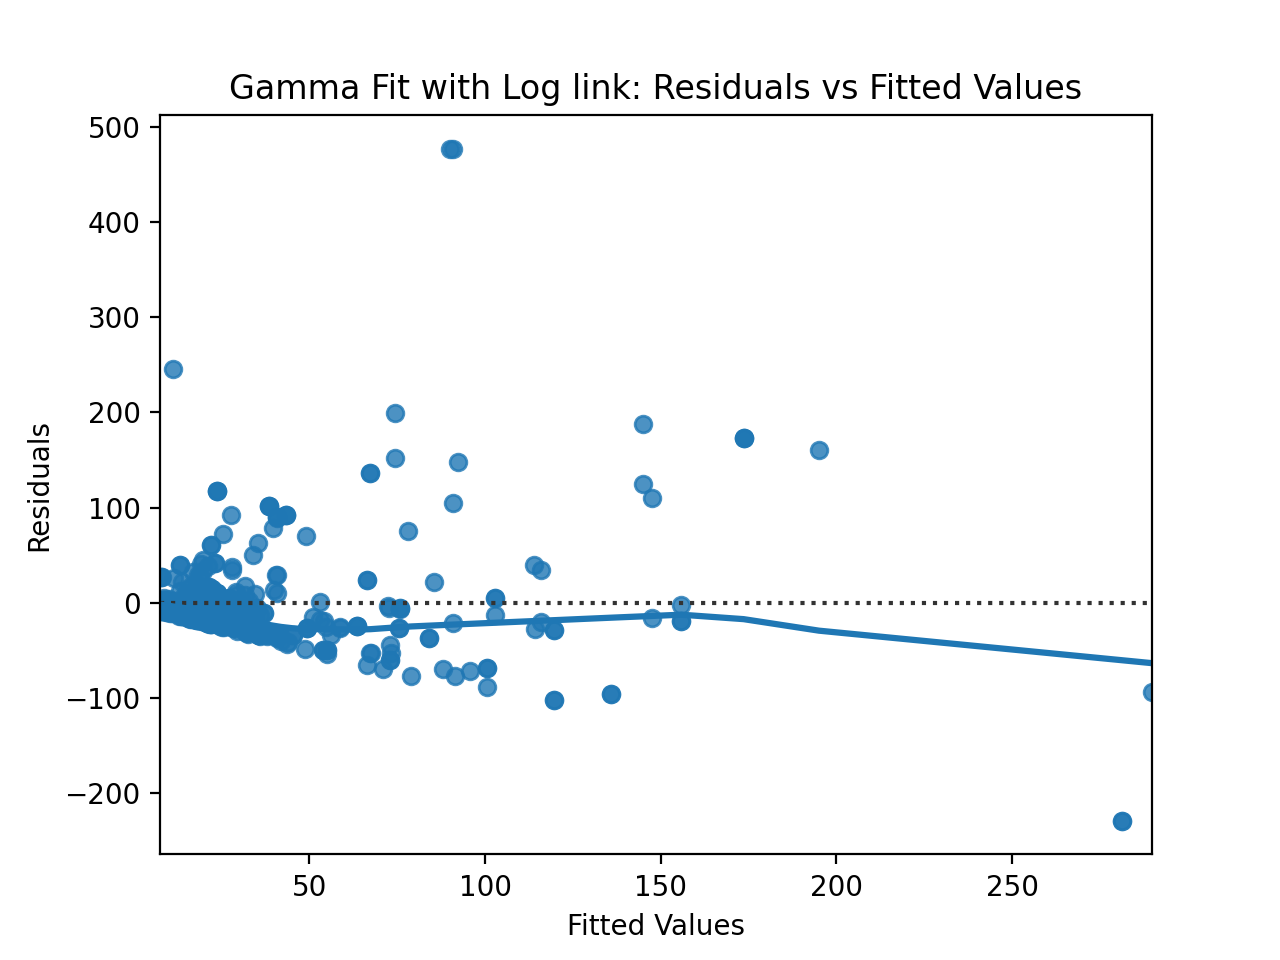

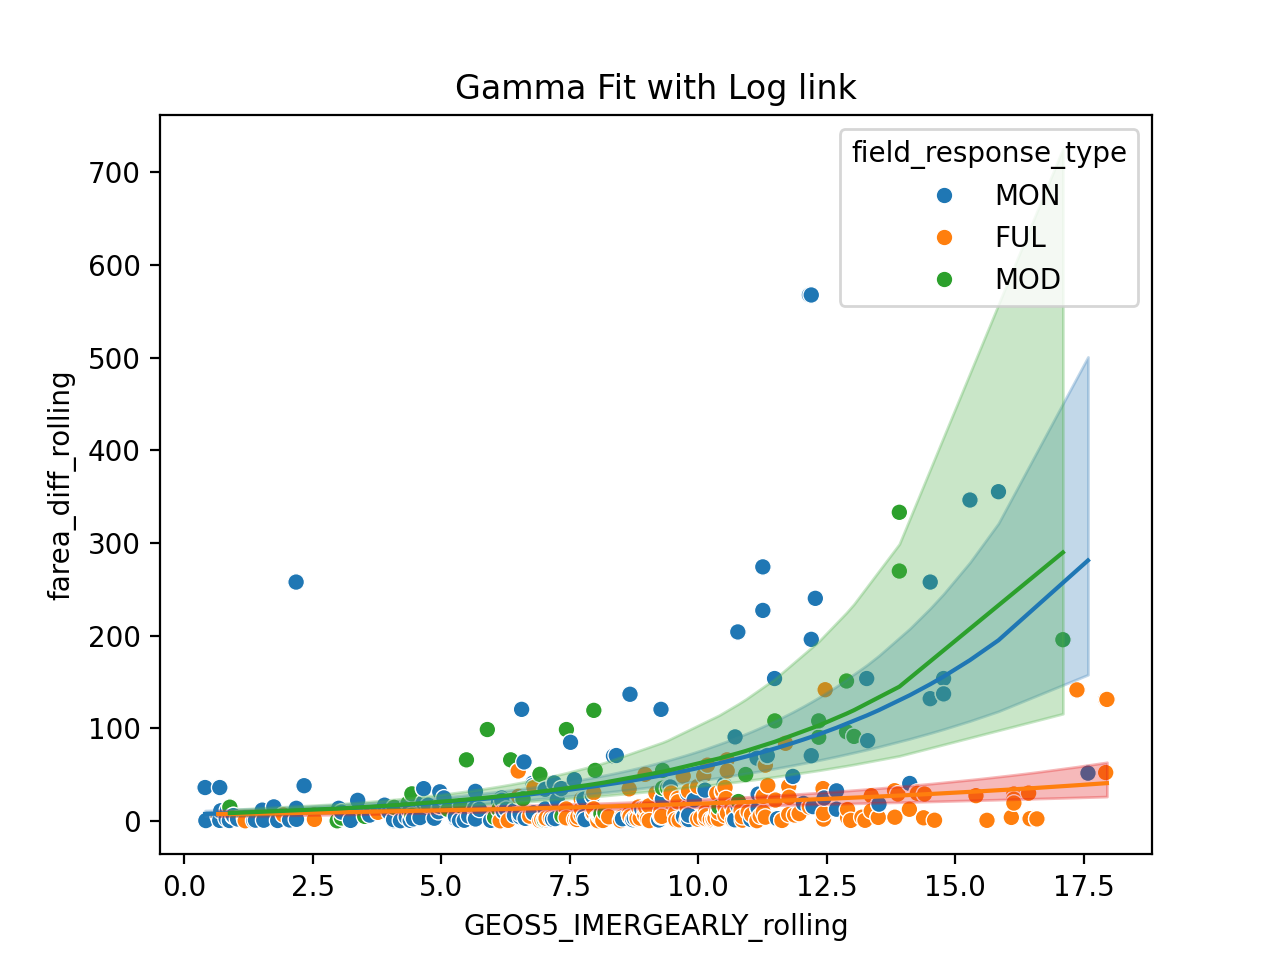

                 Generalized Linear Model Regression Results                  
Dep. Variable:     farea_diff_rolling   No. Observations:                  398
Model:                            GLM   Df Residuals:                      394
Model Family:                   Gamma   Df Model:                            3
Link Function:               Identity   Scale:                          2.2026
Method:                          IRLS   Log-Likelihood:                -1748.1
Date:                Tue, 16 Jul 2024   Deviance:                       713.43
Time:                        13:16:33   Pearson chi2:                     868.
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2131
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The Identity link function does not respect the domain of the Gamma family.
/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.


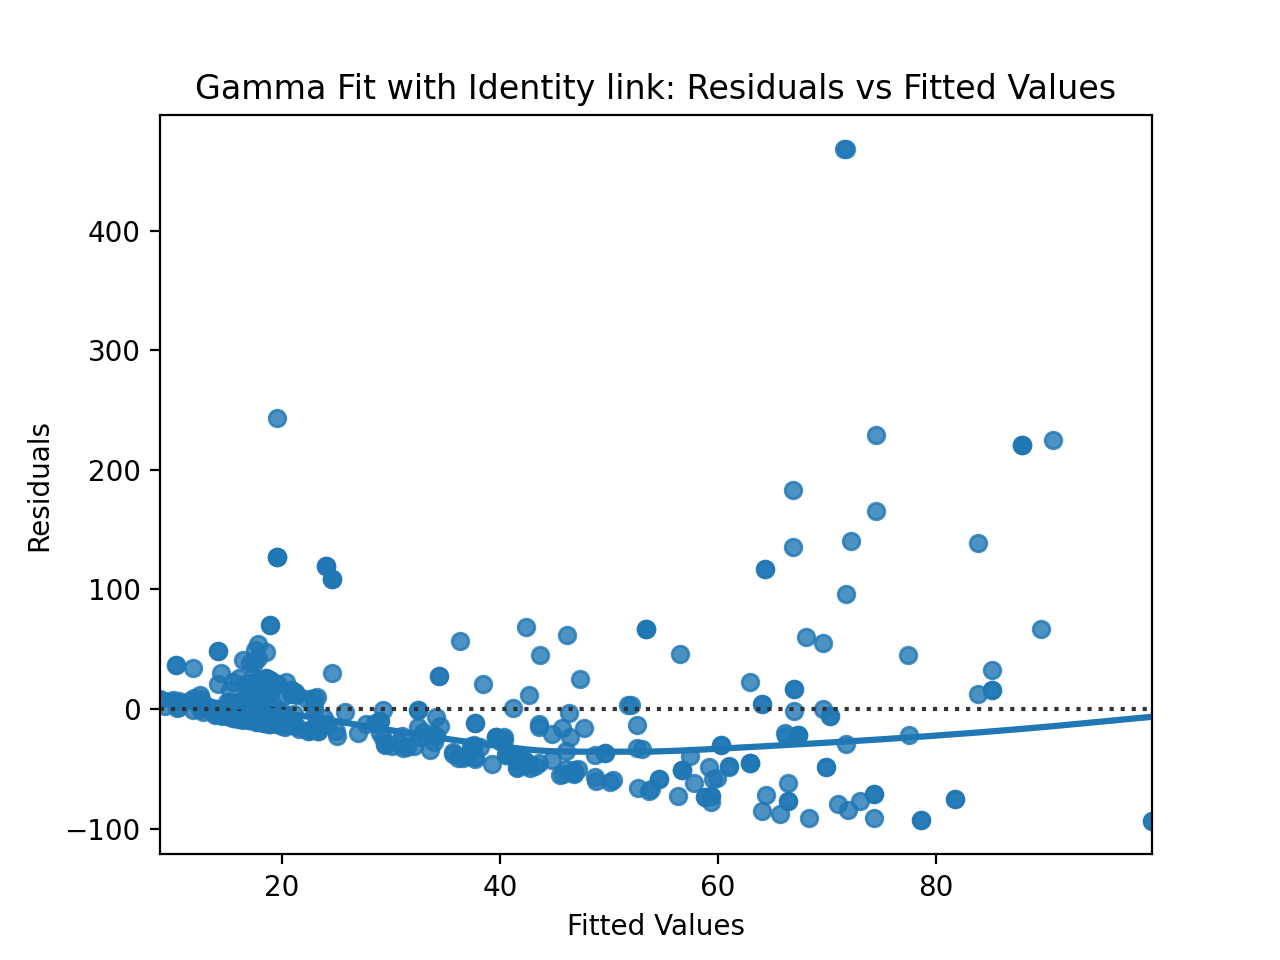

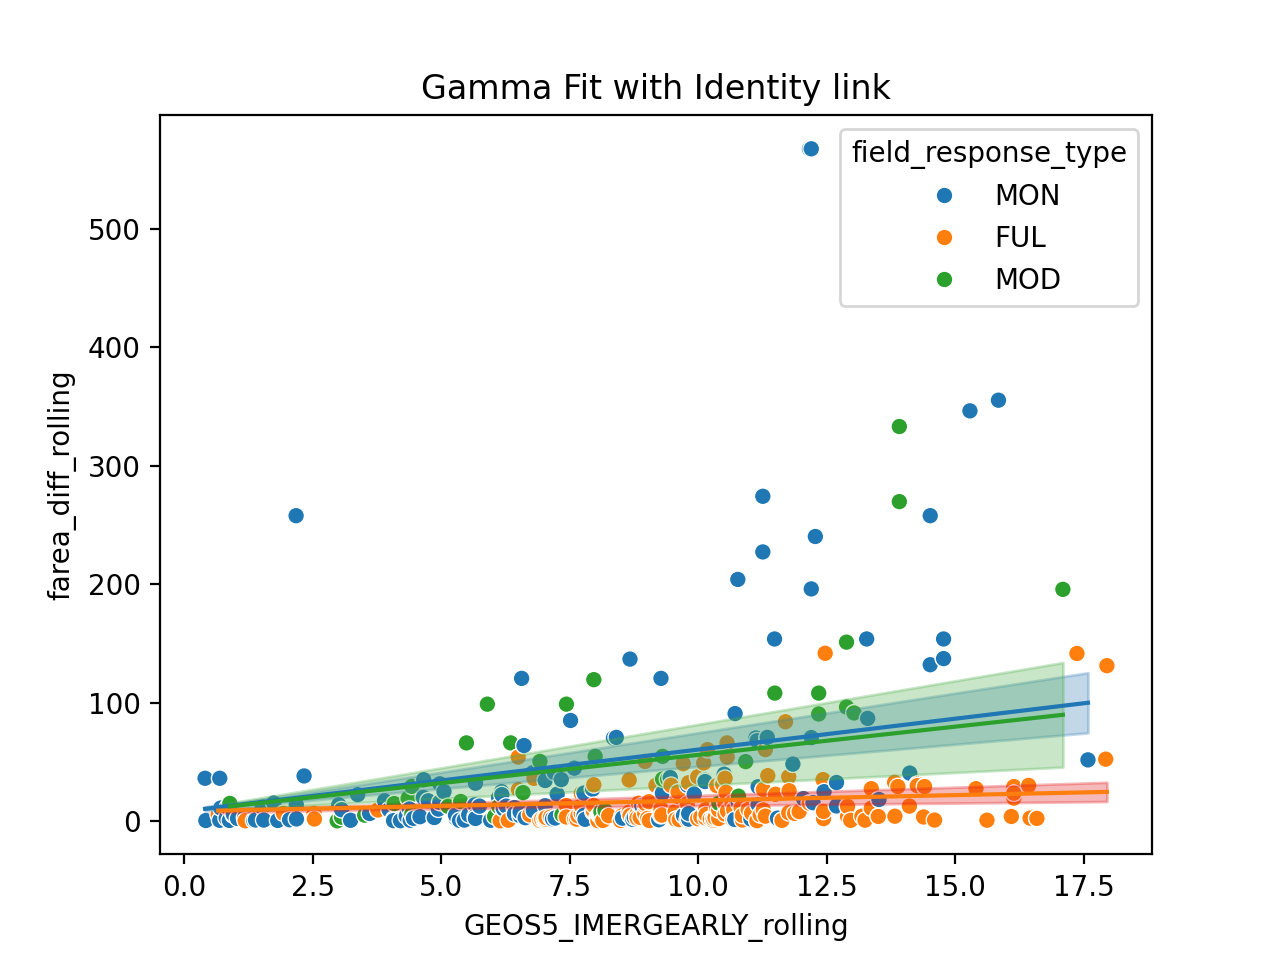

                 Generalized Linear Model Regression Results                  
Dep. Variable:     farea_diff_rolling   No. Observations:                  398
Model:                            GLM   Df Residuals:                      394
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9133.3
Date:                Tue, 16 Jul 2024   Deviance:                       16519.
Time:                        13:16:35   Pearson chi2:                 2.51e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.


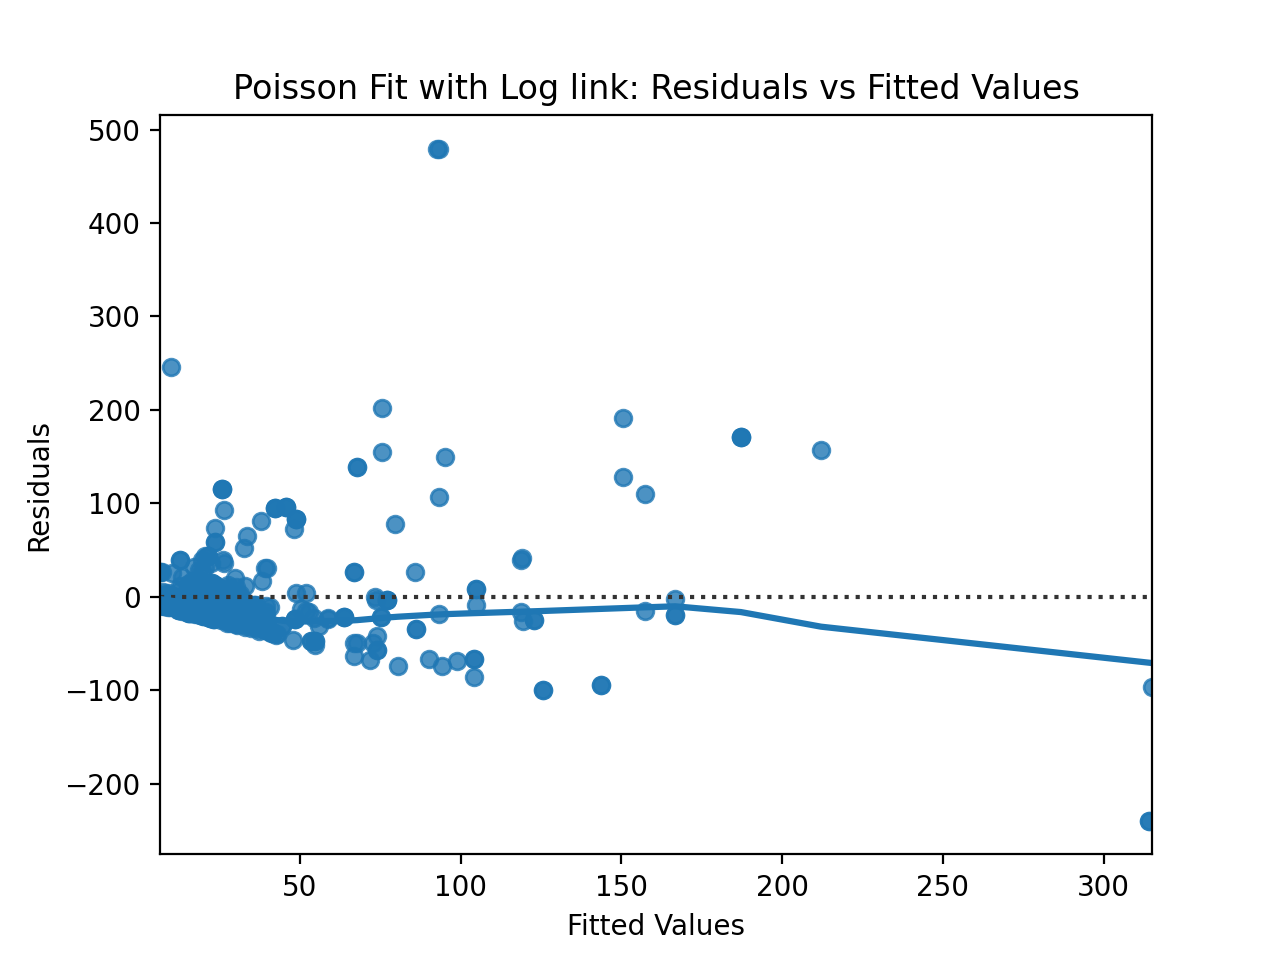

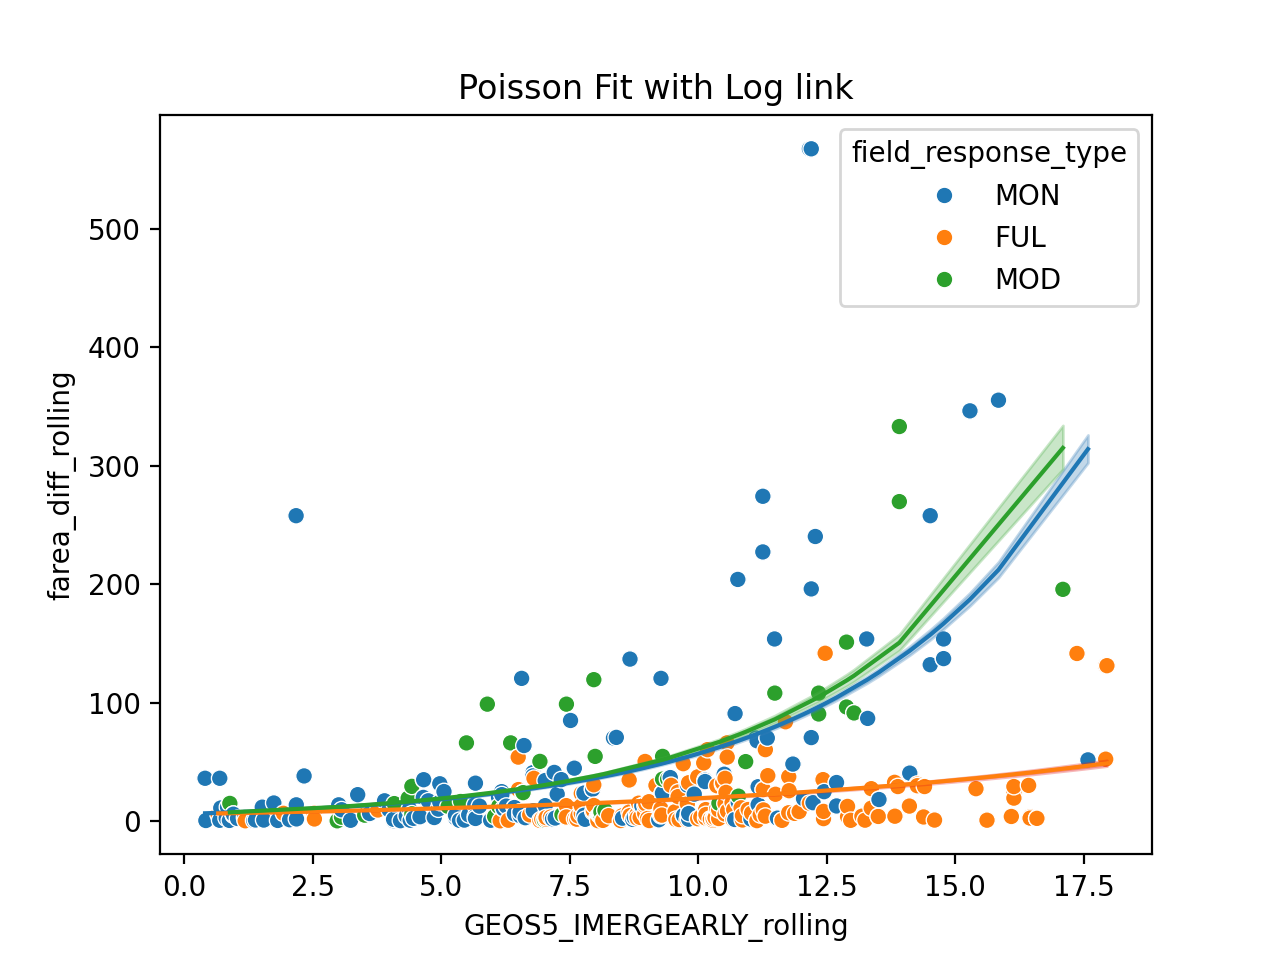

                 Generalized Linear Model Regression Results                  
Dep. Variable:     farea_diff_rolling   No. Observations:                  398
Model:                            GLM   Df Residuals:                      394
Model Family:                 Poisson   Df Model:                            3
Link Function:               Identity   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 16 Jul 2024   Deviance:                       5515.1
Time:                        13:16:37   Pearson chi2:                 3.11e+04
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The Identity link function does not respect the domain of the Poisson family.
/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:477: RuntimeWarning: invalid value encountered in log
/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.


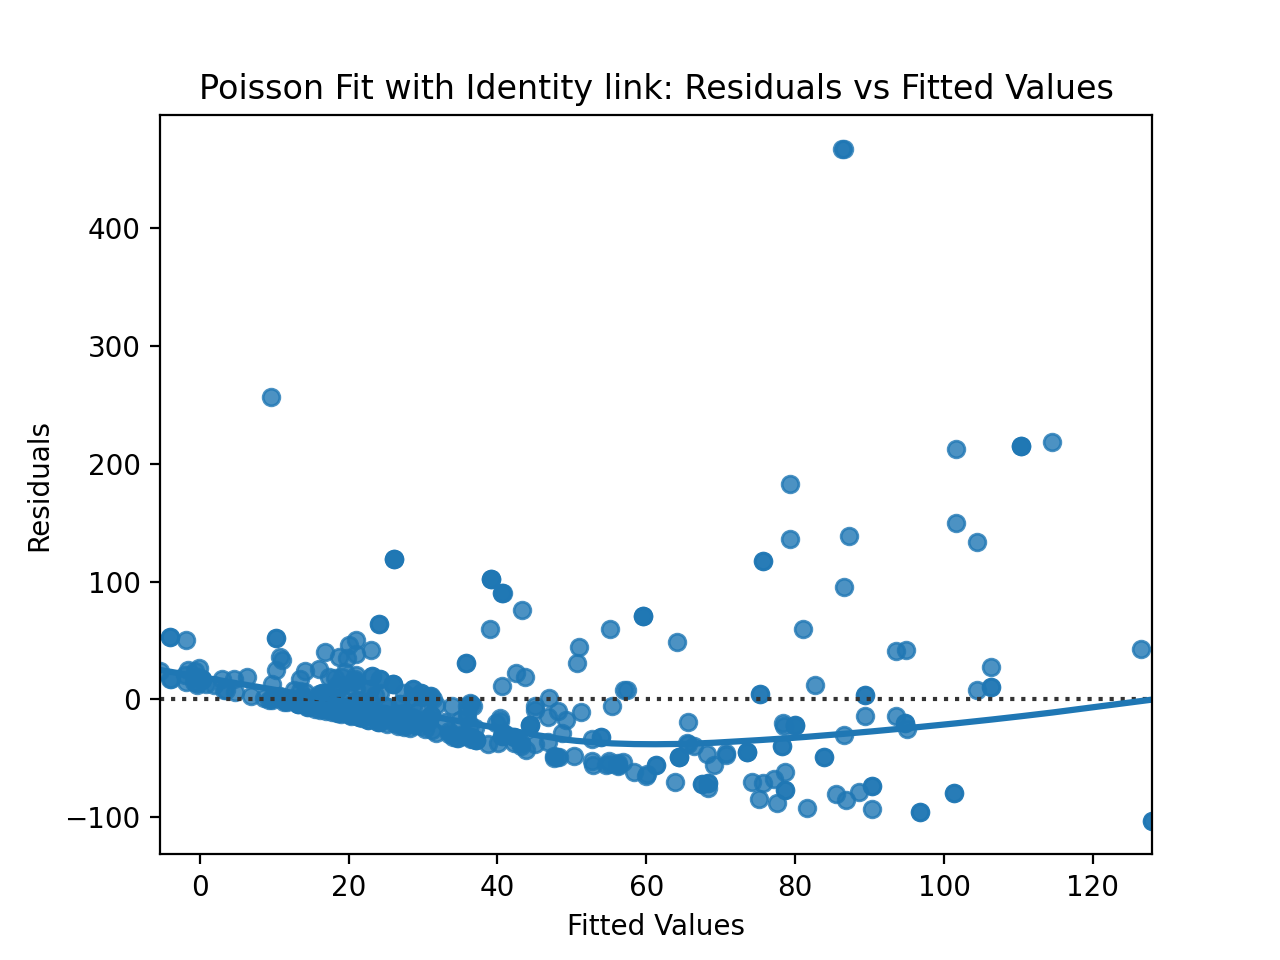

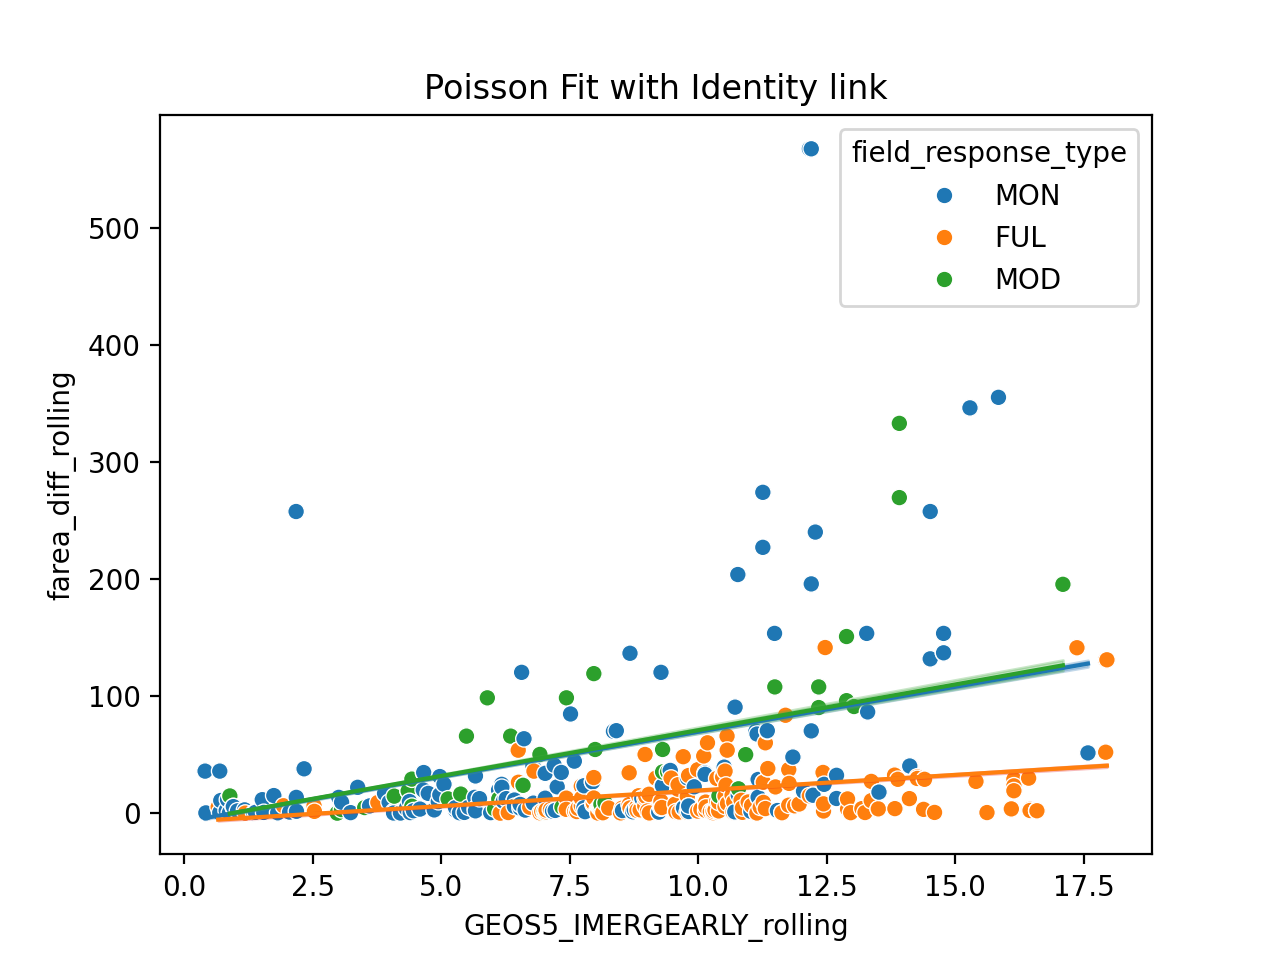

                 Generalized Linear Model Regression Results                  
Dep. Variable:     farea_diff_rolling   No. Observations:                  398
Model:                            GLM   Df Residuals:                      394
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1732.2
Date:                Tue, 16 Jul 2024   Deviance:                       582.68
Time:                        13:16:39   Pearson chi2:                     961.
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4782
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.


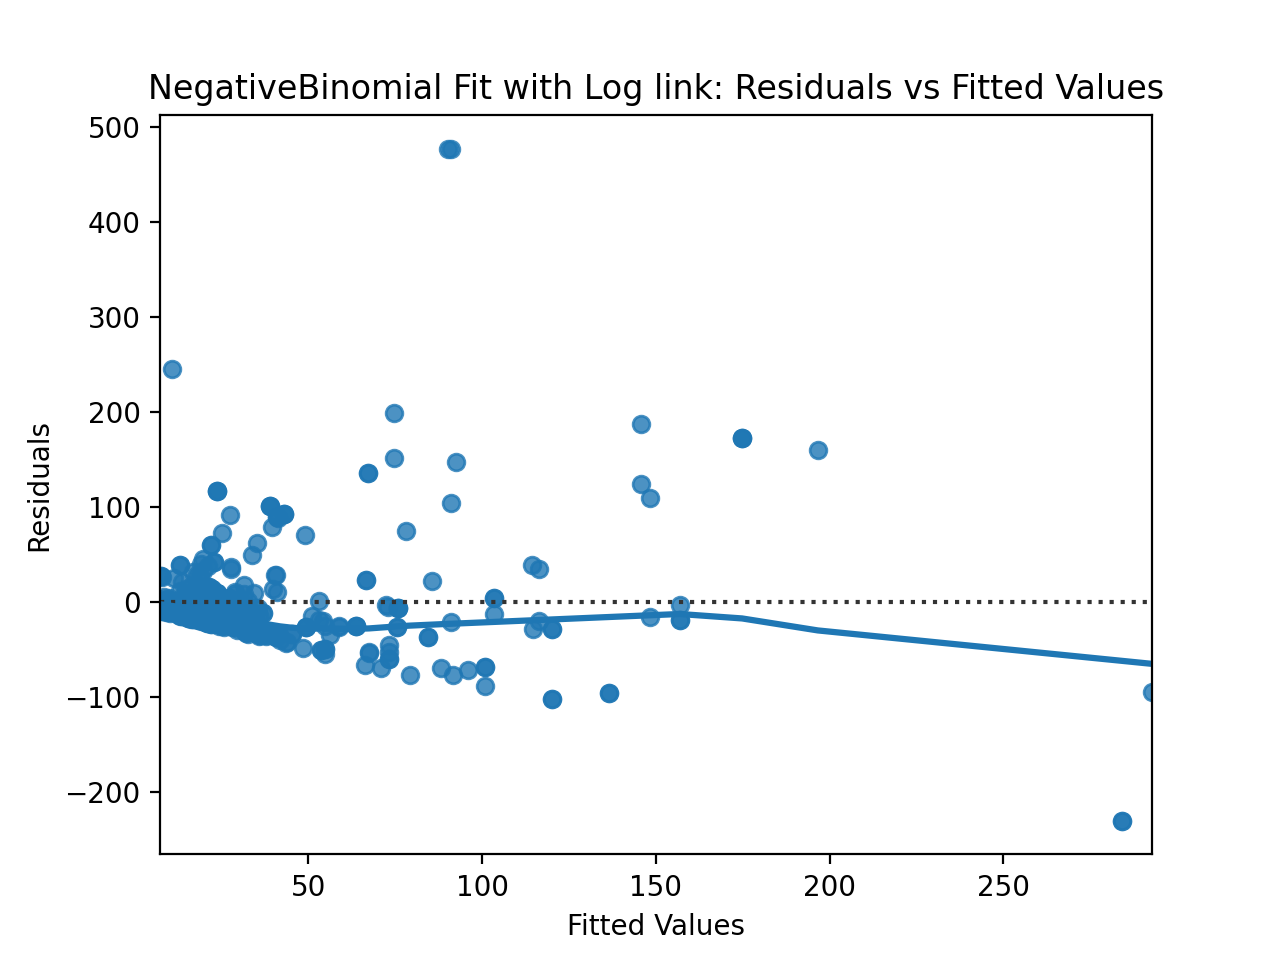

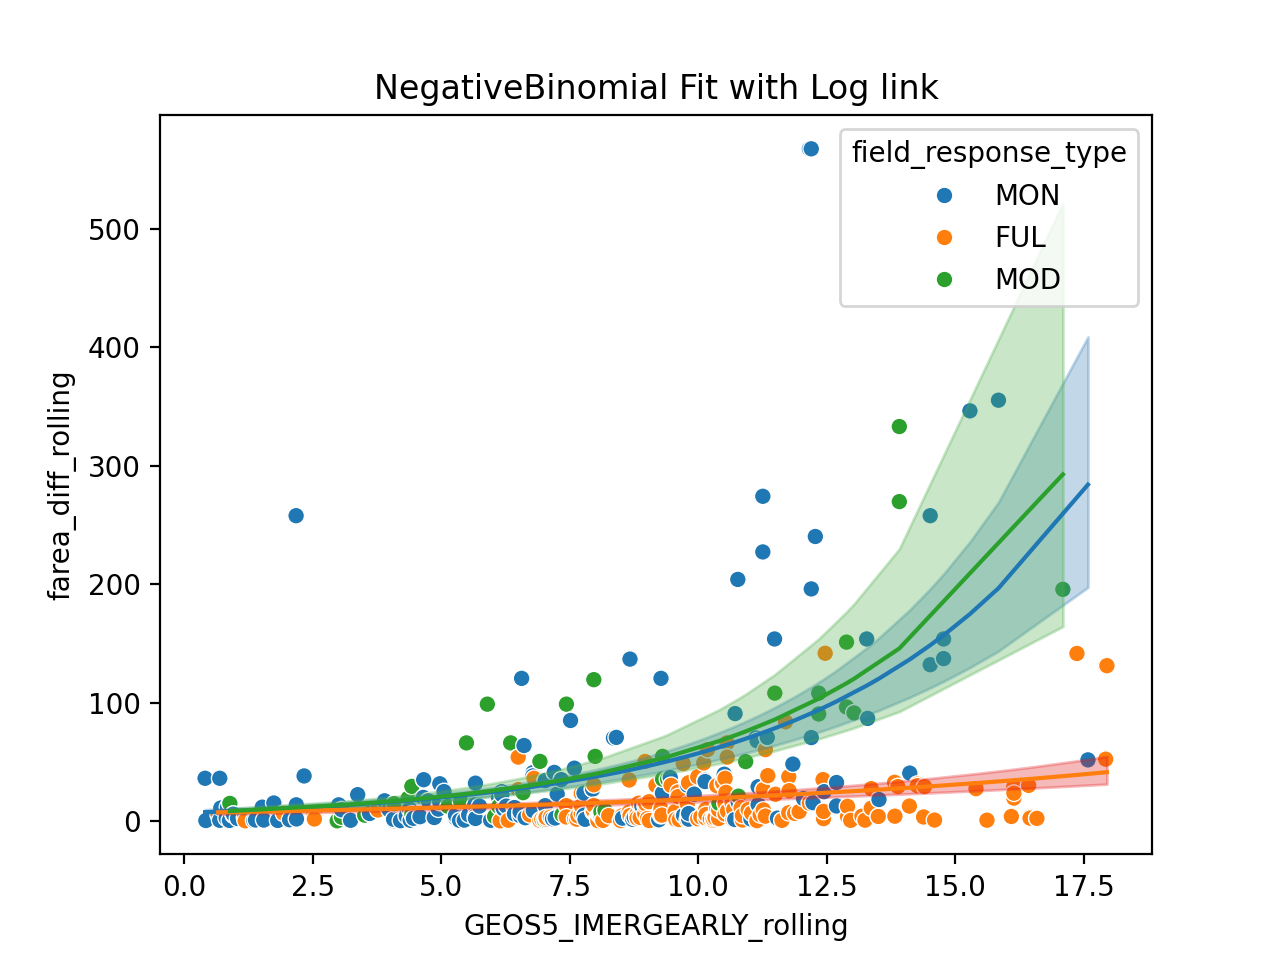

                 Generalized Linear Model Regression Results                  
Dep. Variable:     farea_diff_rolling   No. Observations:                  398
Model:                            GLM   Df Residuals:                      394
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:               Identity   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1955.8
Date:                Tue, 16 Jul 2024   Deviance:                       1029.9
Time:                        13:16:41   Pearson chi2:                 2.42e+03
No. Iterations:                   100   Pseudo R-squ. (CS):            -0.6052
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The Identity link function does not respect the domain of the NegativeBinomial family.
/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress thi

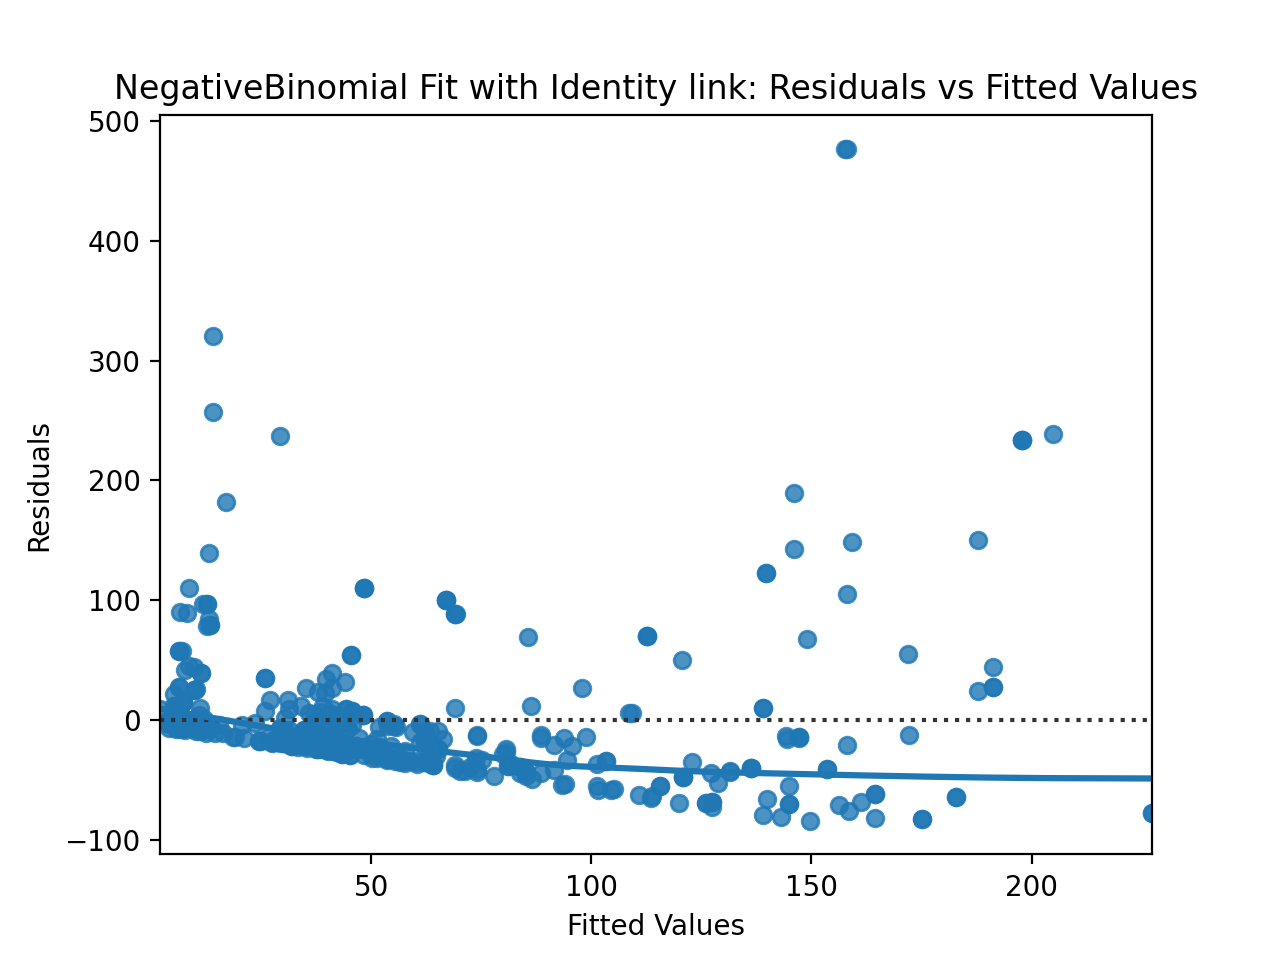

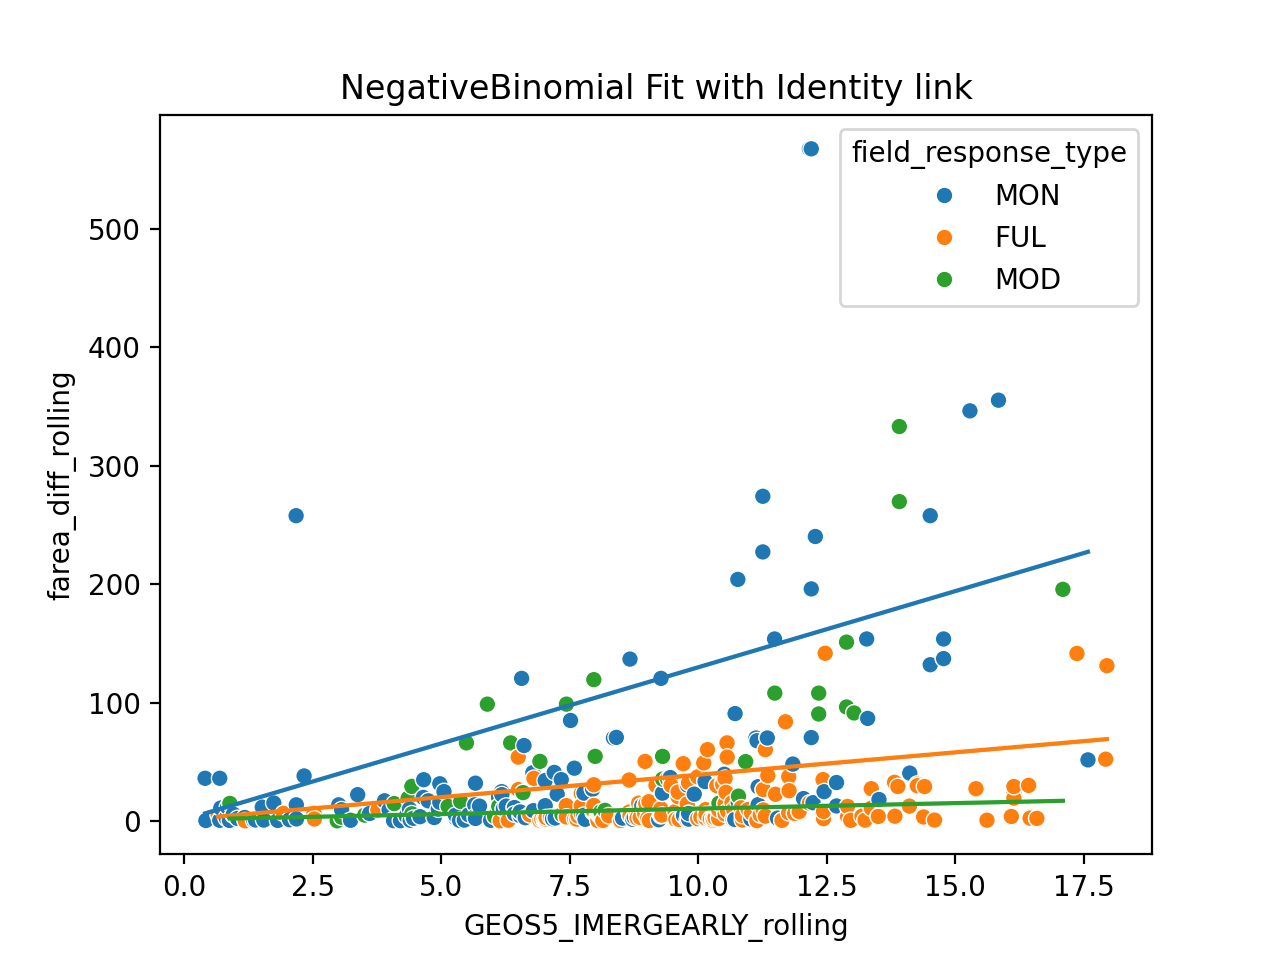

In [17]:
### Trying to fit a glm for non-constant varience 
from patsy import ModelDesc
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf


row_mask = (~fire3.fireID.str.contains("_")) & (fire3.farea_diff > 0.1) & (fire3.fireID.isin(long_fires)) #& fire3['max_dof'] >= 3#& (fire3.max_duration >= 3)
#row_mask = (~fire3.fireID.str.contains("_")) 

df = fire3[row_mask]

df = df[['fireID', 't',  'GEOS-5.IMERGEARLY', 'FWI',
'field_response_type', 
'FWI_rolling', 'farea_diff_rolling', 'GEOS-5.IMERGEARLY_rolling',"GEOS5_IMERGEARLY_rolling", "log_farea_diff_rolling"]].dropna()


y = "farea_diff_rolling"
x = "GEOS5_IMERGEARLY_rolling"
c = "field_response_type"


# Unique category labels: 'D', 'F', 'G', ...
color_labels = df[c].unique()

# List of RGB triplets
rgb_values = sns.color_palette("Set1", 3)
rgb_values.reverse()

# Map label to RGB
color_map = dict(zip(color_labels, rgb_values))

# # Finally use the mapped values
# plt.scatter(df['carat'], df['price'], c=df[c].map(color_map))


formula = f"{y} ~ {x}:C({c})"
print(formula)

families = ["Gaussian", "Gamma", "Poisson", "NegativeBinomial"]
links = ["Log", "Identity"]
#links = ["Identity"]

ls = []
fs = []
aic = []
ll = []
bic = []
for f in families:
    for l in links: 
        #desc = ModelDesc.from_formula(formula)
        #desc.describe()

        #sm.families.family.Gamma.links
        #link_g = sm.genmod.families.links.Identity()
        #link_g = sm.genmod.families.links.Log()
        #link_g = sm.genmod.families.links.CLogLog()
        #link_g = sm.genmod.families.links.Sqrt()
        #link_g = sm.genmod.families.links.InversePower()
        #link_g = sm.genmod.families.links.NegativeBinomial()
        #link_g = sm.genmod.families.links.Power()
        
        link_g = getattr(sm.genmod.families.links, l)

        method = getattr(sm.families, f)

        model = smf.glm(formula, data=df, family=method(link = link_g(), check_link=True)).fit() # family=sm.families.Poisson()
        print(model.summary())
        tmp = model.summary2()
        
        fs.append(f)
        ls.append(l)
        aic.append(model.aic)
        ll.append(tmp.tables[0].iloc[2,3])
        bic.append(model.bic)



        df['fitted'] = model.fittedvalues
        df['residuals'] = model.resid_response
        df = df.sort_values(by = x)
        # Plot residuals vs fitted values
        res = sns.residplot(x='fitted', y='residuals', data=df, lowess=True)
        res
        plt.title(f'{f} Fit with {l} link: Residuals vs Fitted Values')
        plt.xlabel('Fitted Values')
        plt.ylabel('Residuals')
        plt.show()
        
    
        predictions = model.get_prediction(df, transform = True) #df, transform = False
        df['predicted'] = predictions.predicted_mean
        df['conf_int_low'], df['conf_int_high'] = predictions.conf_int().T

        actual = sns.scatterplot(x=x, y=y, data=df, hue = c)
        actual
        # Plot the fitted values
        pred = sns.lineplot(x=x, y='predicted', data=df, hue =c, legend = False)
        pred
        # Plot the confidence intervals
        for cat in df[c].unique():
            #print(cat)
            #print(df.loc[(df[c] == cat), [c]].map(color_map))
            plt.fill_between(df.loc[(df[c] == cat)][x], df.loc[(df[c] == cat)]['conf_int_low'], df.loc[(df[c] == cat)]['conf_int_high'],  color=color_map[cat], alpha=0.3)

        plt.title(f'{f} Fit with {l} link')
        plt.xlabel(x)
        plt.ylabel(y)
        #plt.legend()
        plt.show()
        
        

In [18]:
stats = pd.DataFrame({"Family": fs, "Link_Function" : ls,  "Log_Likelyhood": ll, "AIC": aic, "BIC": bic})
stats

Family Link_Function Log_Likelyhood           AIC           BIC
0          Gaussian           Log        -2180.8   4369.695323  1.336807e+06
1          Gaussian      Identity        -2189.9   4387.782765  1.399142e+06
2             Gamma           Log        -1754.5   3516.942234 -1.700752e+03
3             Gamma      Identity        -1748.1   3504.176040 -1.645231e+03
4           Poisson           Log        -9133.3  18274.613272  1.415998e+04
5           Poisson      Identity            nan           NaN  3.156478e+03
6  NegativeBinomial           Log        -1732.2   3472.405136 -1.775981e+03
7  NegativeBinomial      Identity        -1955.8   3919.656806 -1.328729e+03

In [19]:
print(stats[stats.Log_Likelyhood.astype("float").min() == stats.Log_Likelyhood.astype("float") ])

print(stats[stats.AIC.astype("float").min() == stats.AIC.astype("float") ])
print(stats[stats.BIC.astype("float").min() == stats.BIC.astype("float") ])



    Family Link_Function Log_Likelyhood           AIC           BIC
4  Poisson           Log        -9133.3  18274.613272  14159.981848
             Family Link_Function Log_Likelyhood          AIC          BIC
6  NegativeBinomial           Log        -1732.2  3472.405136 -1775.980919
             Family Link_Function Log_Likelyhood          AIC          BIC
6  NegativeBinomial           Log        -1732.2  3472.405136 -1775.980919


In [20]:
#df

farea_diff_rolling ~ FWI_rolling:C(field_response_type)
                 Generalized Linear Model Regression Results                  
Dep. Variable:     farea_diff_rolling   No. Observations:                  398
Model:                            GLM   Df Residuals:                      394
Model Family:                Gaussian   Df Model:                            3
Link Function:                    Log   Scale:                          4056.2
Method:                          IRLS   Log-Likelihood:                -2216.0
Date:                Tue, 16 Jul 2024   Deviance:                   1.5982e+06
Time:                        13:16:43   Pearson chi2:                 1.60e+06
No. Iterations:                     9   Pseudo R-squ. (CS):             0.1955
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------

/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.


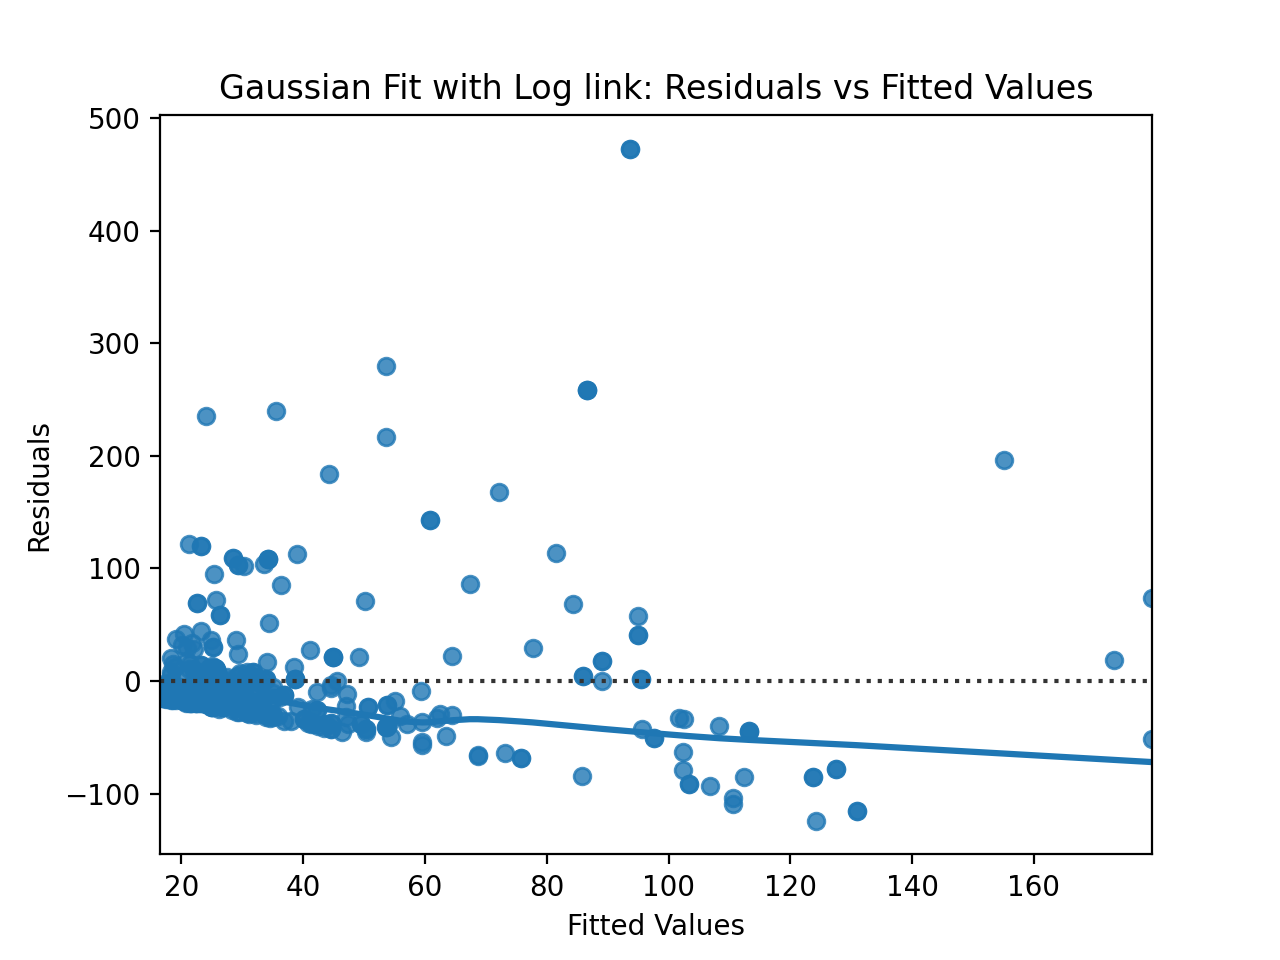

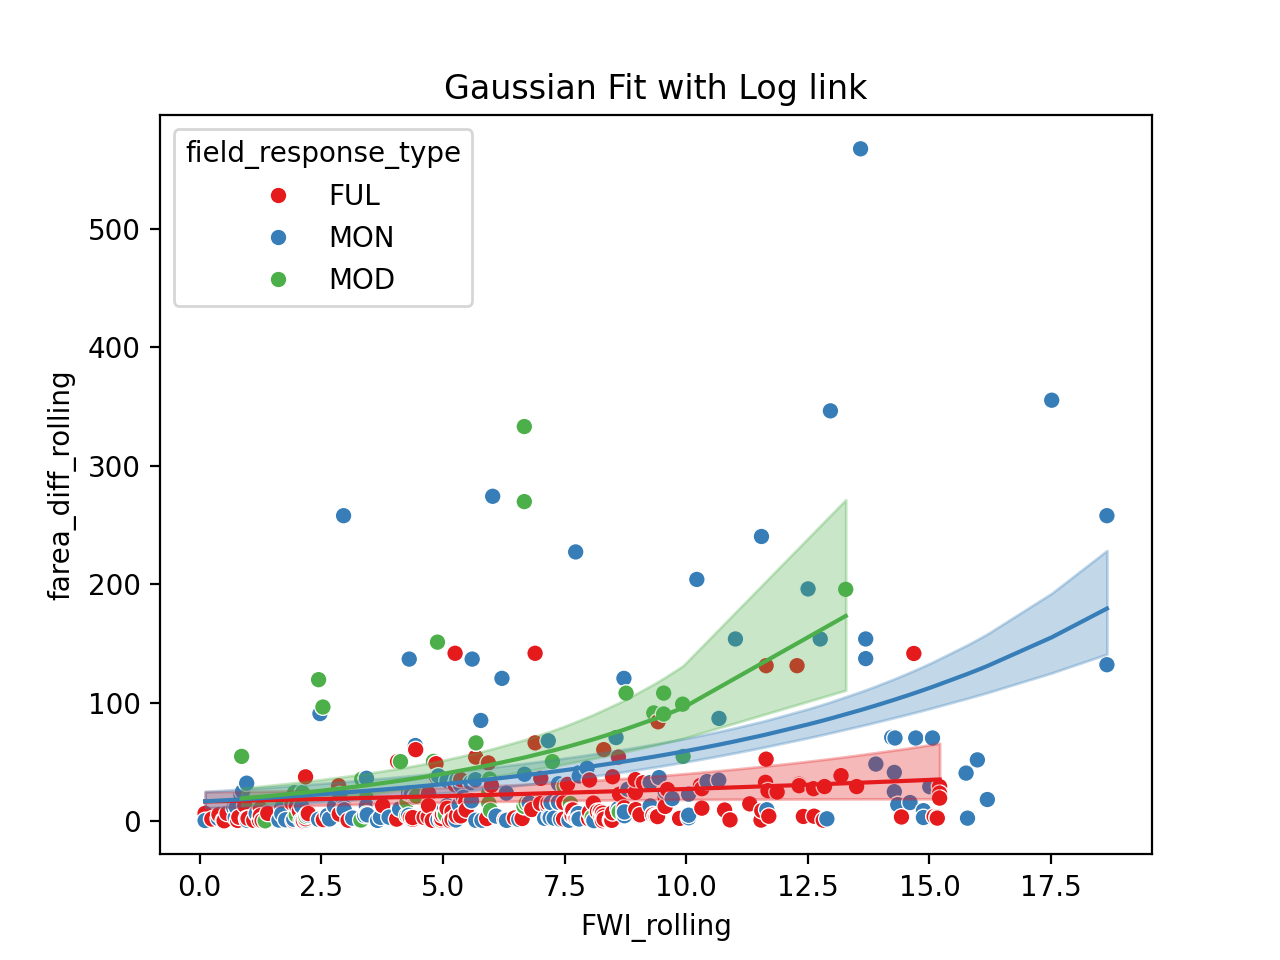

                 Generalized Linear Model Regression Results                  
Dep. Variable:     farea_diff_rolling   No. Observations:                  398
Model:                            GLM   Df Residuals:                      394
Model Family:                Gaussian   Df Model:                            3
Link Function:               Identity   Scale:                          4050.5
Method:                          IRLS   Log-Likelihood:                -2215.7
Date:                Tue, 16 Jul 2024   Deviance:                   1.5959e+06
Time:                        13:16:44   Pearson chi2:                 1.60e+06
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1969
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.


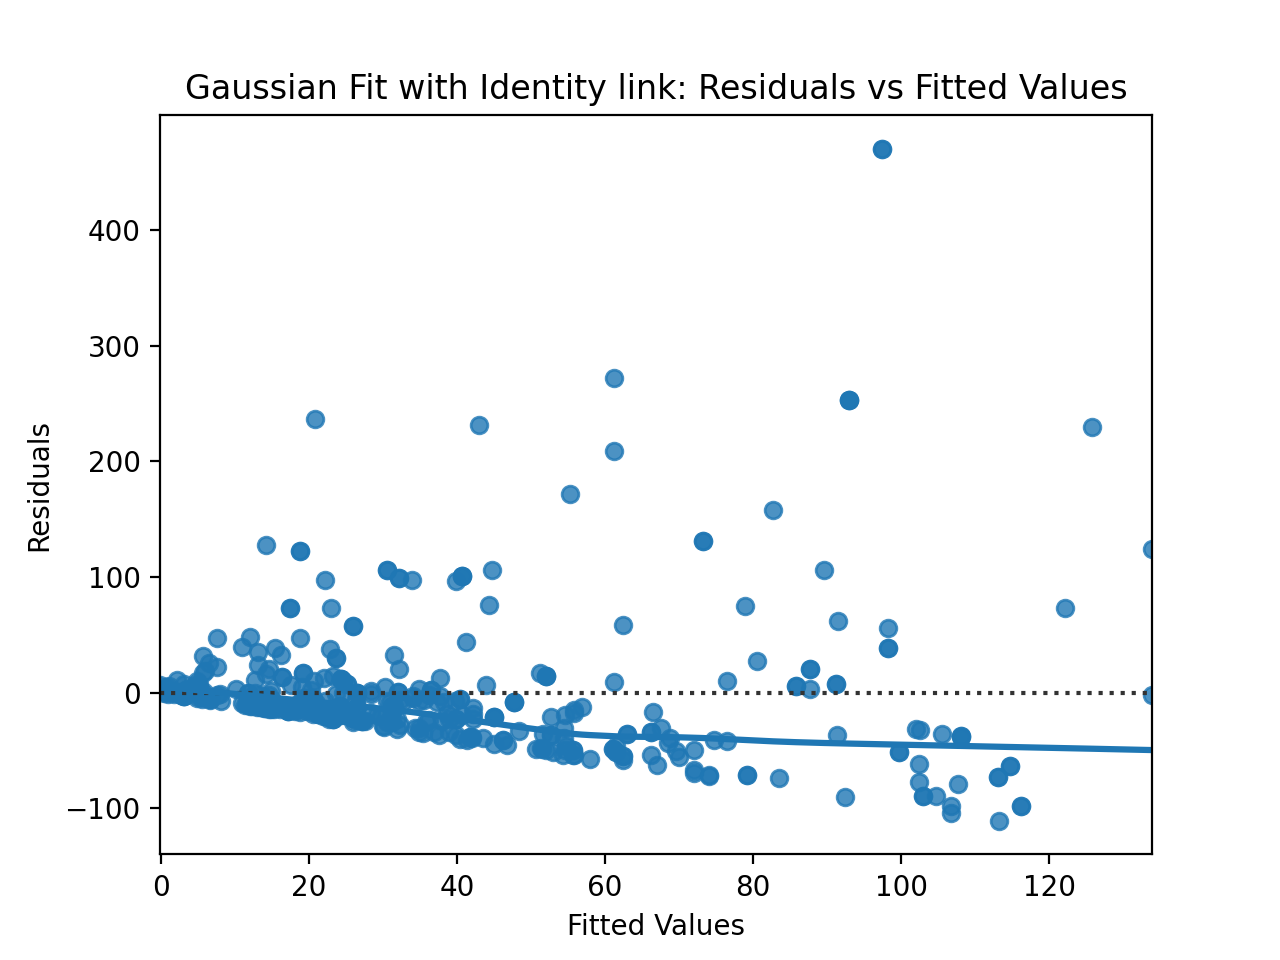

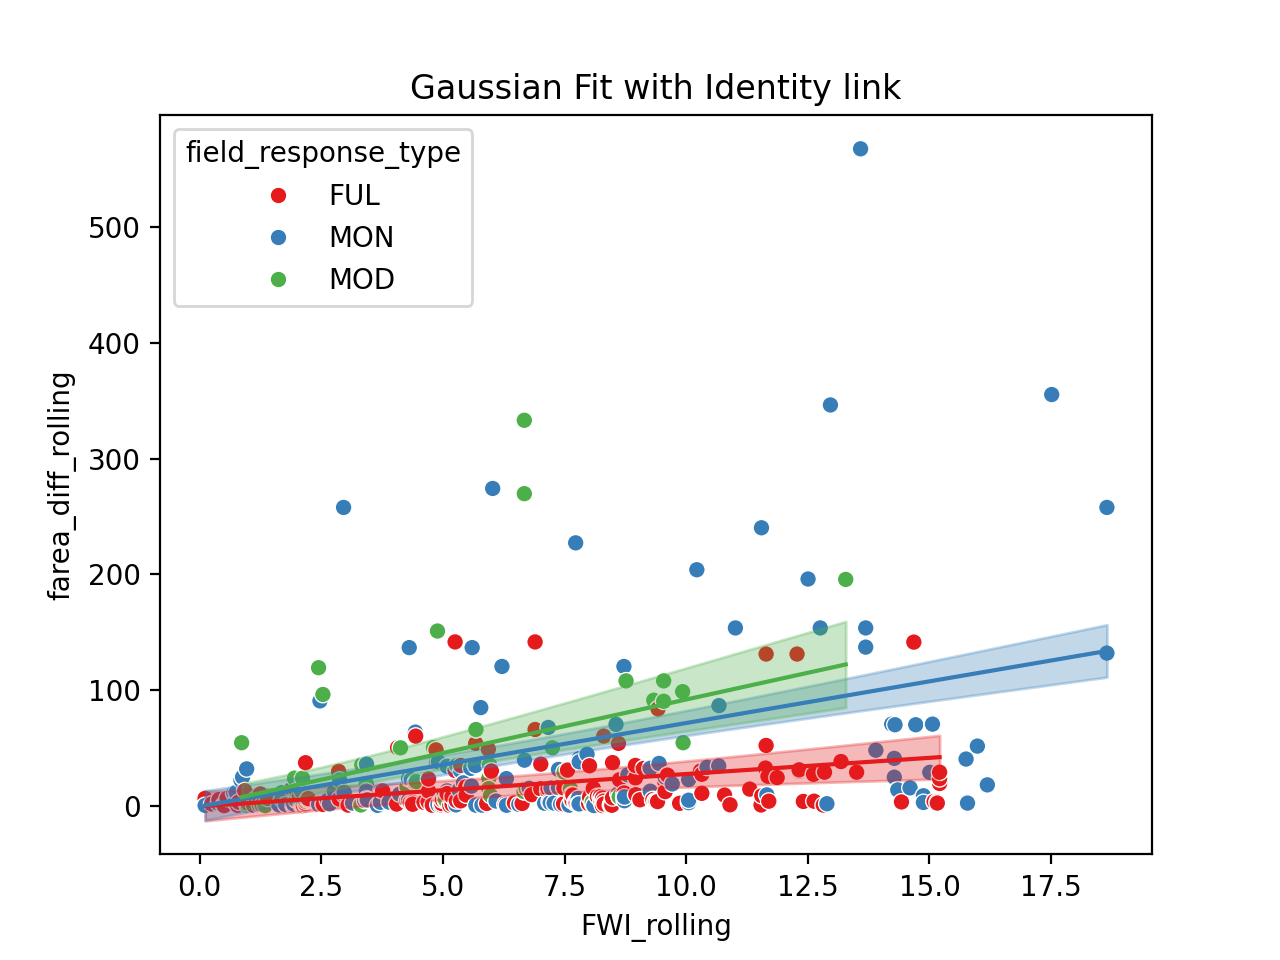

                 Generalized Linear Model Regression Results                  
Dep. Variable:     farea_diff_rolling   No. Observations:                  398
Model:                            GLM   Df Residuals:                      394
Model Family:                   Gamma   Df Model:                            3
Link Function:                    Log   Scale:                          2.2838
Method:                          IRLS   Log-Likelihood:                -1756.3
Date:                Tue, 16 Jul 2024   Deviance:                       734.90
Time:                        13:16:46   Pearson chi2:                     900.
No. Iterations:                    15   Pseudo R-squ. (CS):             0.1874
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.


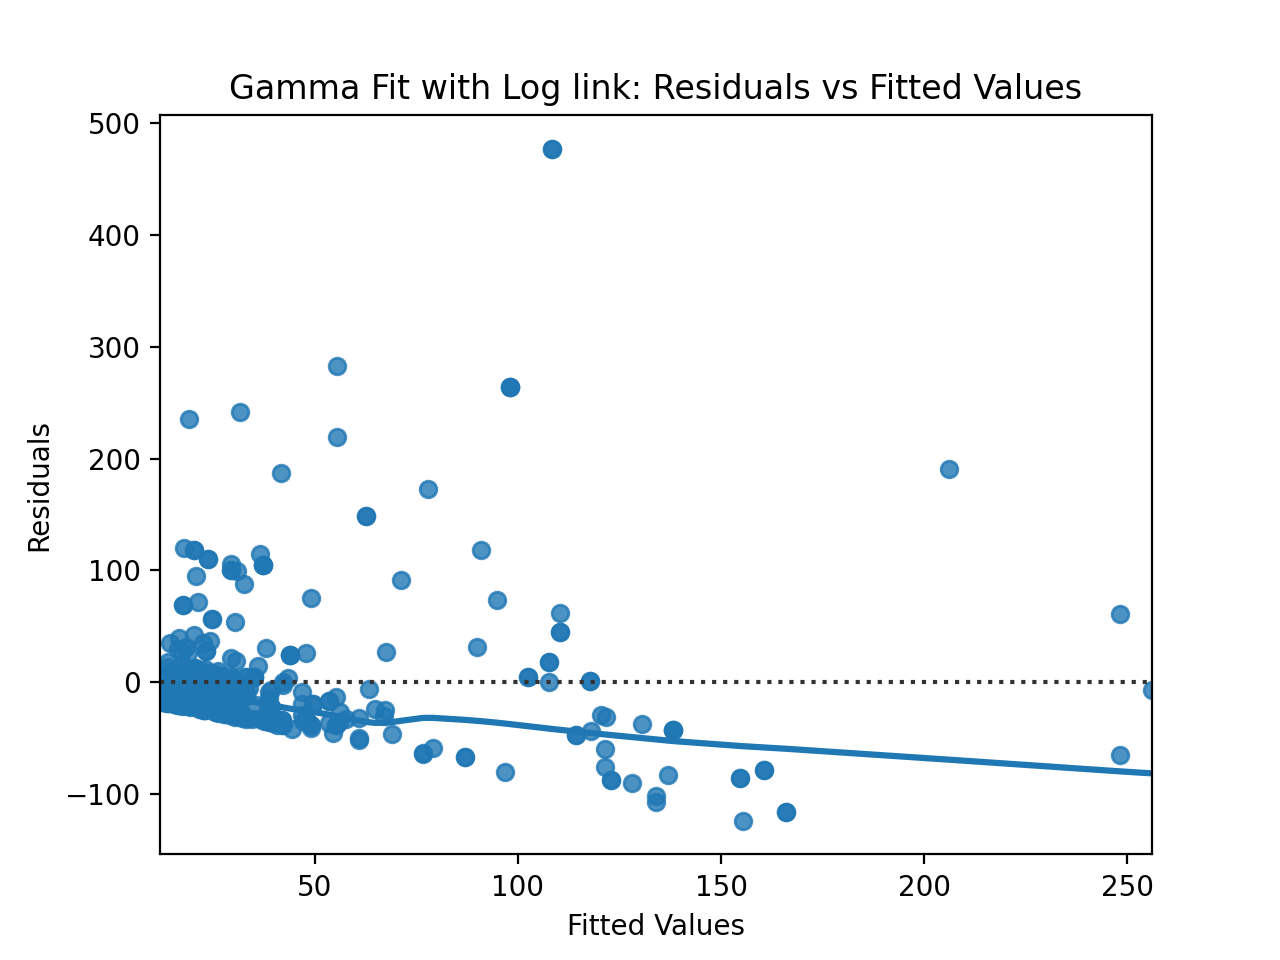

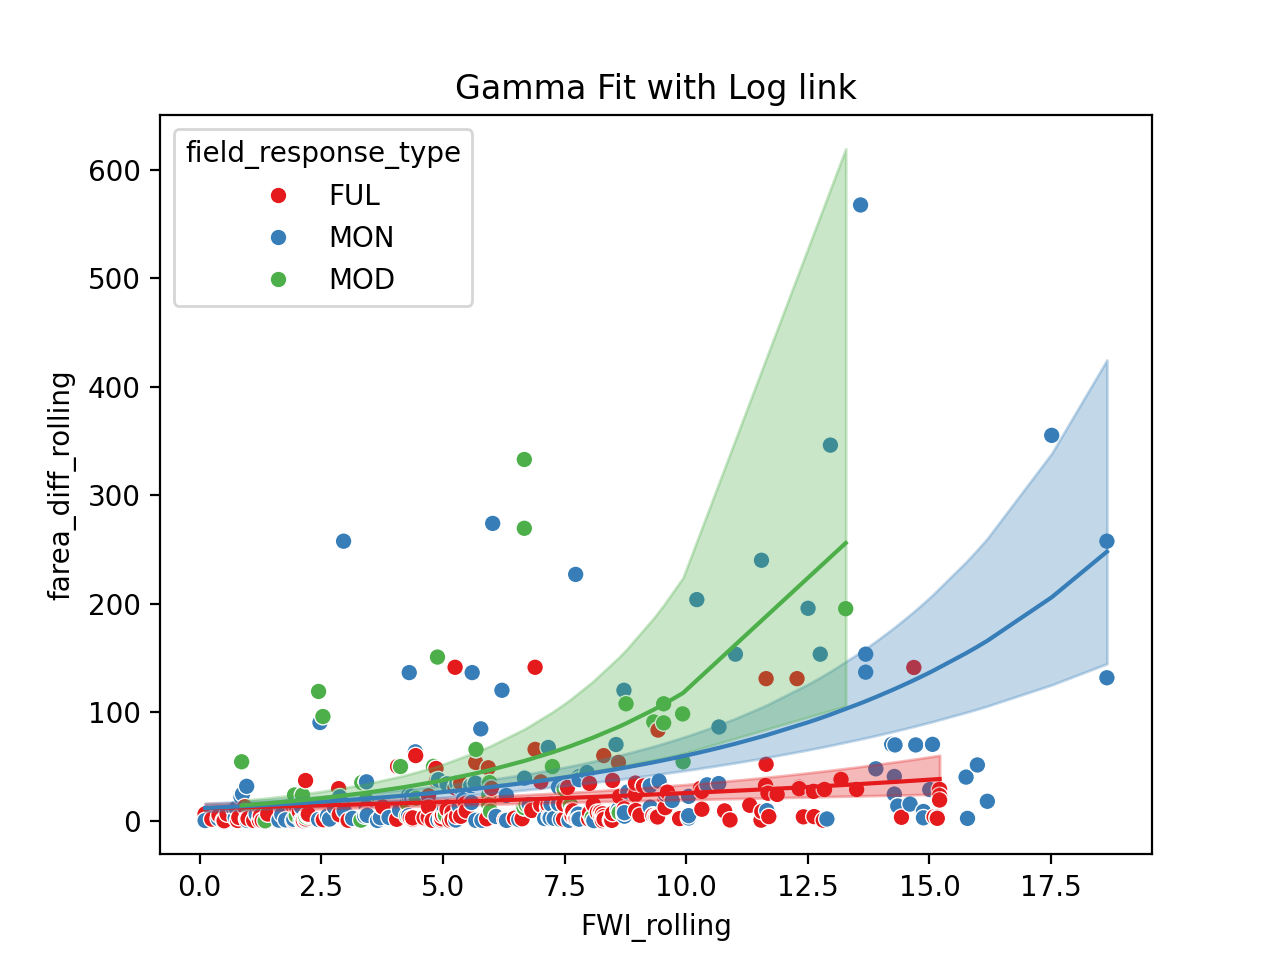

                 Generalized Linear Model Regression Results                  
Dep. Variable:     farea_diff_rolling   No. Observations:                  398
Model:                            GLM   Df Residuals:                      394
Model Family:                   Gamma   Df Model:                            3
Link Function:               Identity   Scale:                          2.0766
Method:                          IRLS   Log-Likelihood:                -1743.6
Date:                Tue, 16 Jul 2024   Deviance:                       716.65
Time:                        13:16:48   Pearson chi2:                     818.
No. Iterations:                    15   Pseudo R-squ. (CS):             0.2215
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The Identity link function does not respect the domain of the Gamma family.
/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.


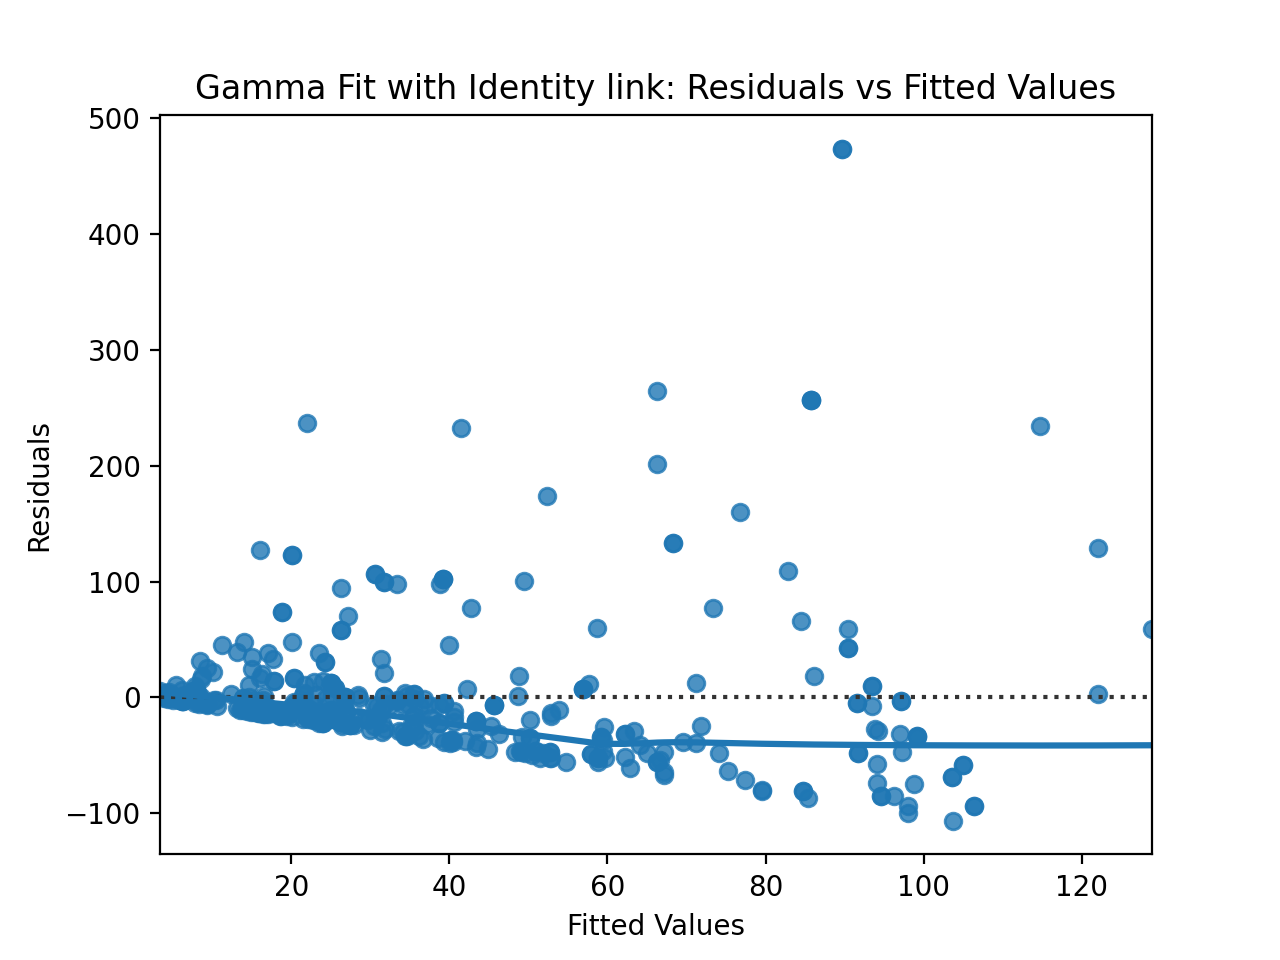

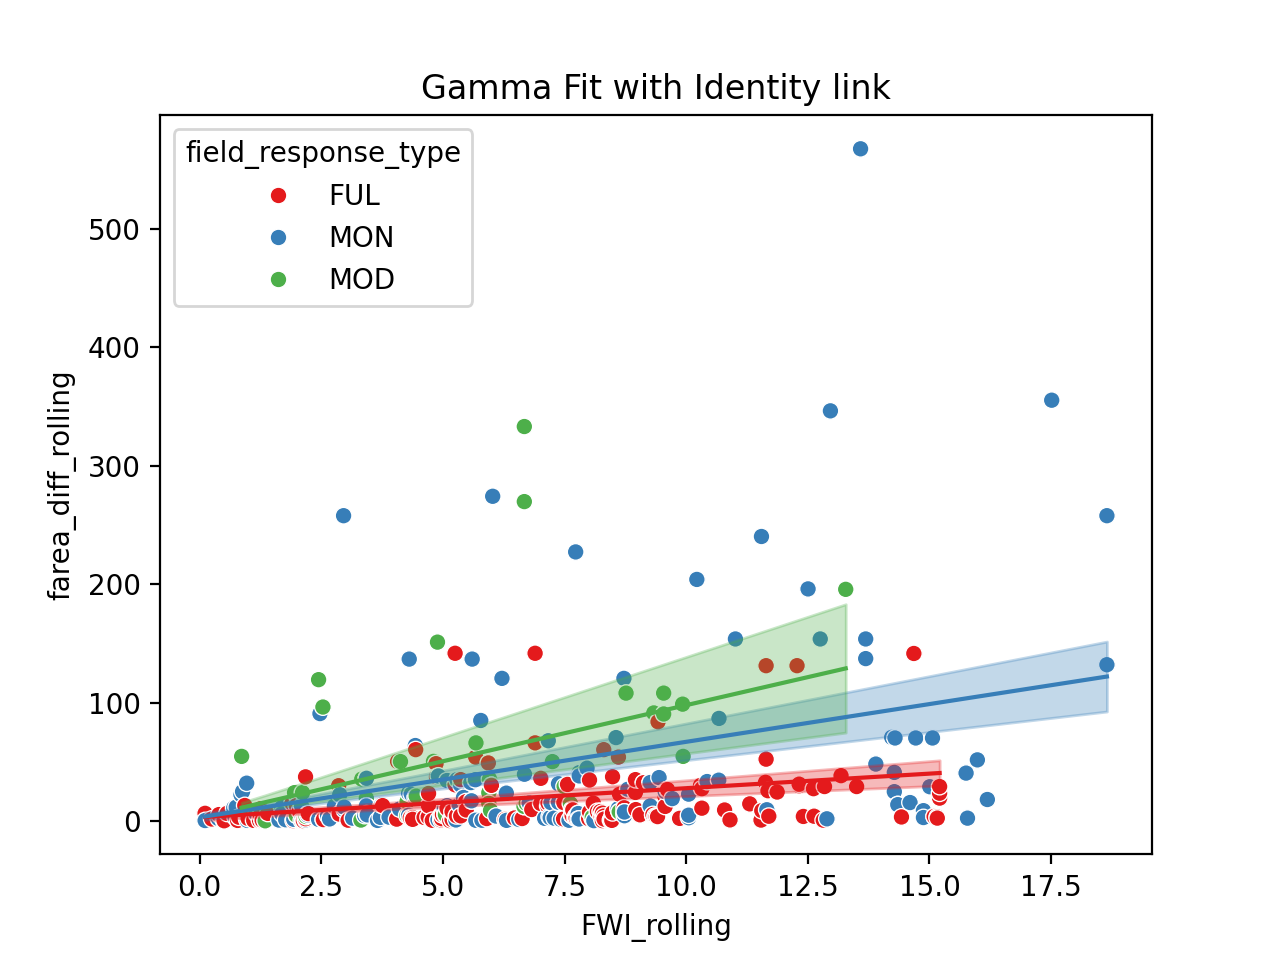

                 Generalized Linear Model Regression Results                  
Dep. Variable:     farea_diff_rolling   No. Observations:                  398
Model:                            GLM   Df Residuals:                      394
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11297.
Date:                Tue, 16 Jul 2024   Deviance:                       20846.
Time:                        13:16:49   Pearson chi2:                 3.02e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.


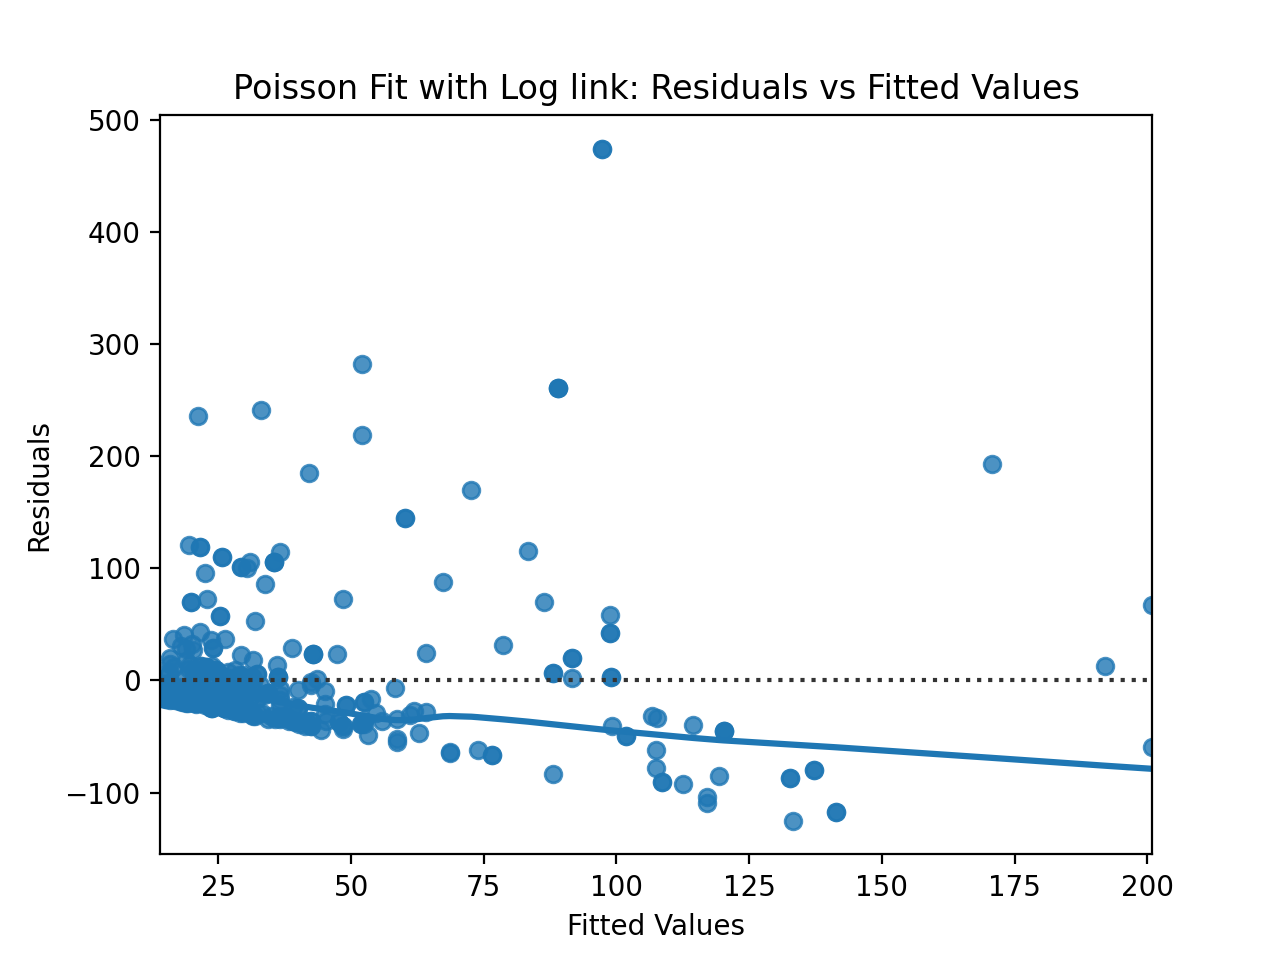

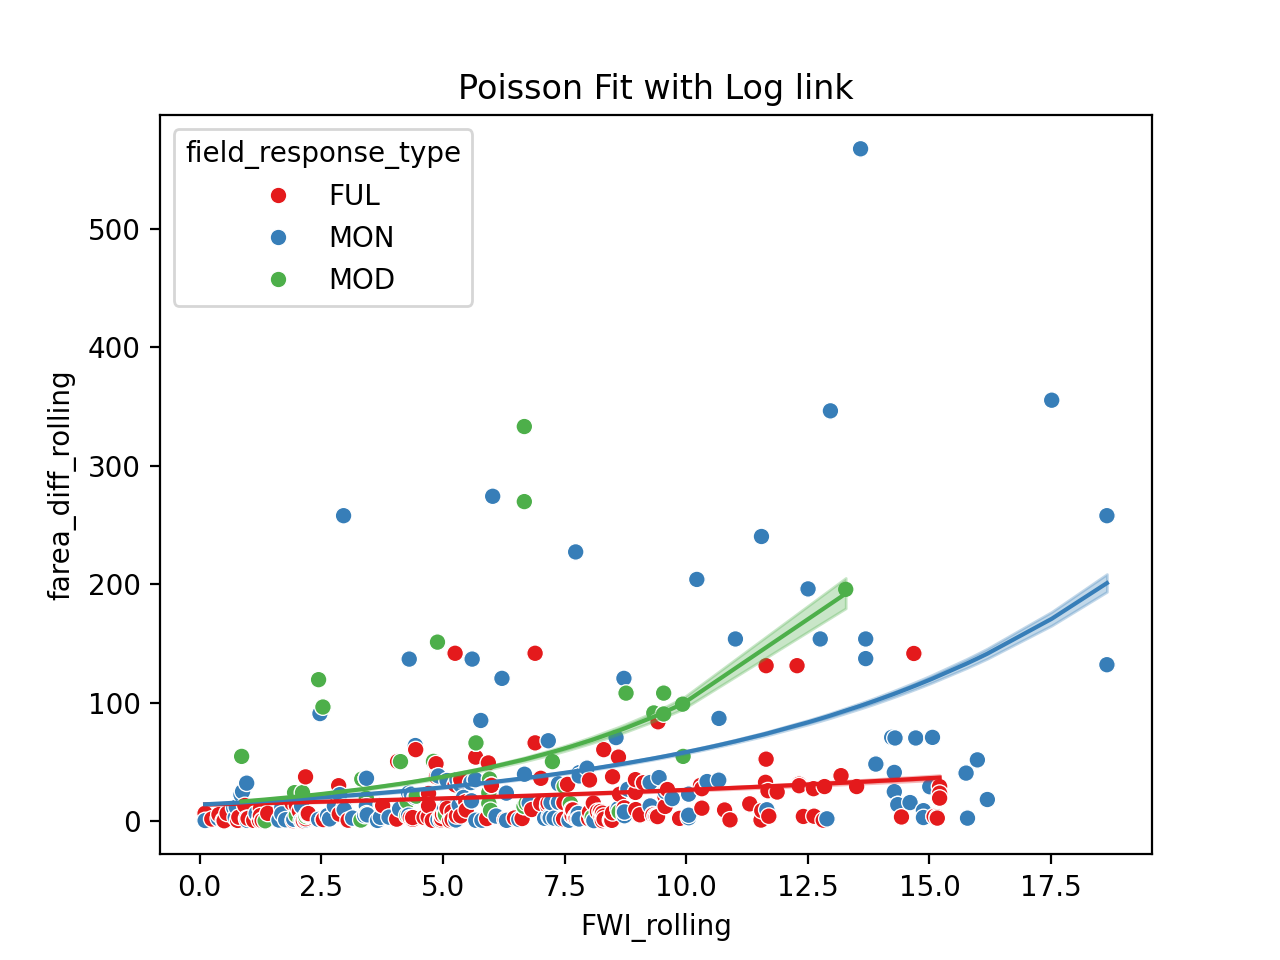

                 Generalized Linear Model Regression Results                  
Dep. Variable:     farea_diff_rolling   No. Observations:                  398
Model:                            GLM   Df Residuals:                      394
Model Family:                 Poisson   Df Model:                            3
Link Function:               Identity   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11211.
Date:                Tue, 16 Jul 2024   Deviance:                       20674.
Time:                        13:16:51   Pearson chi2:                 2.91e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The Identity link function does not respect the domain of the Poisson family.
/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.


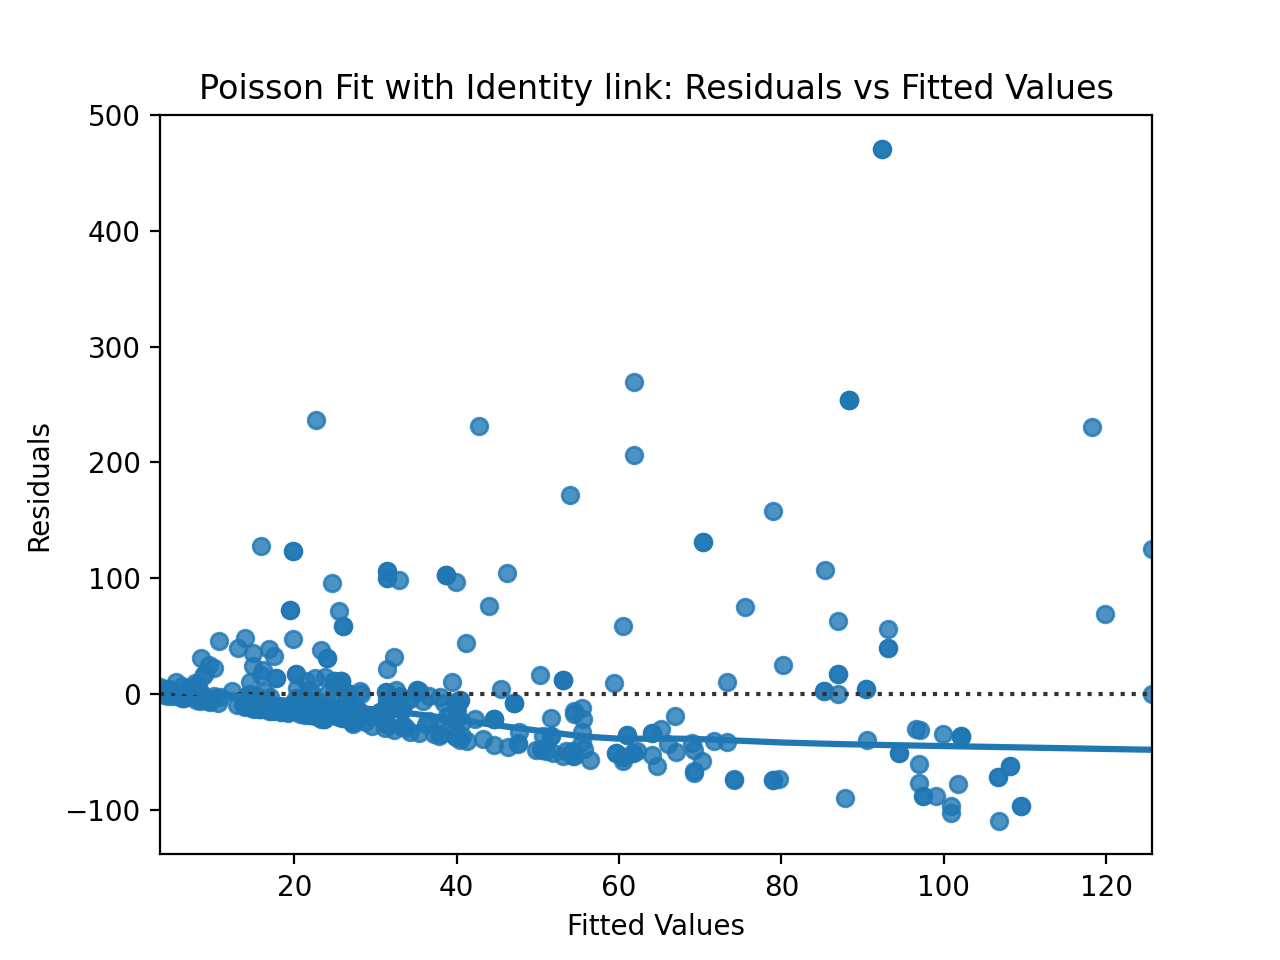

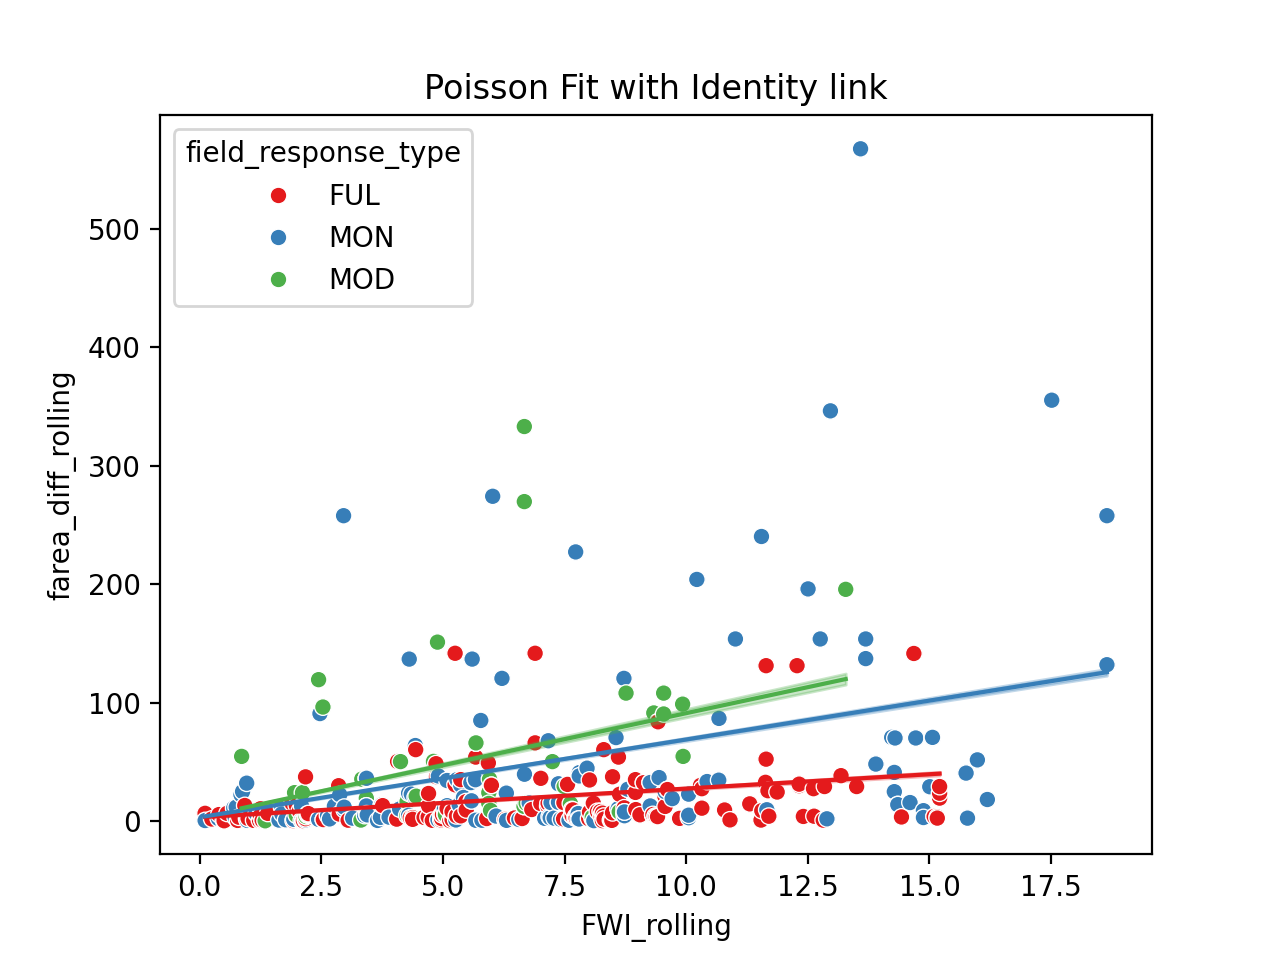

                 Generalized Linear Model Regression Results                  
Dep. Variable:     farea_diff_rolling   No. Observations:                  398
Model:                            GLM   Df Residuals:                      394
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1770.1
Date:                Tue, 16 Jul 2024   Deviance:                       658.40
Time:                        13:16:53   Pearson chi2:                     862.
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3689
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.


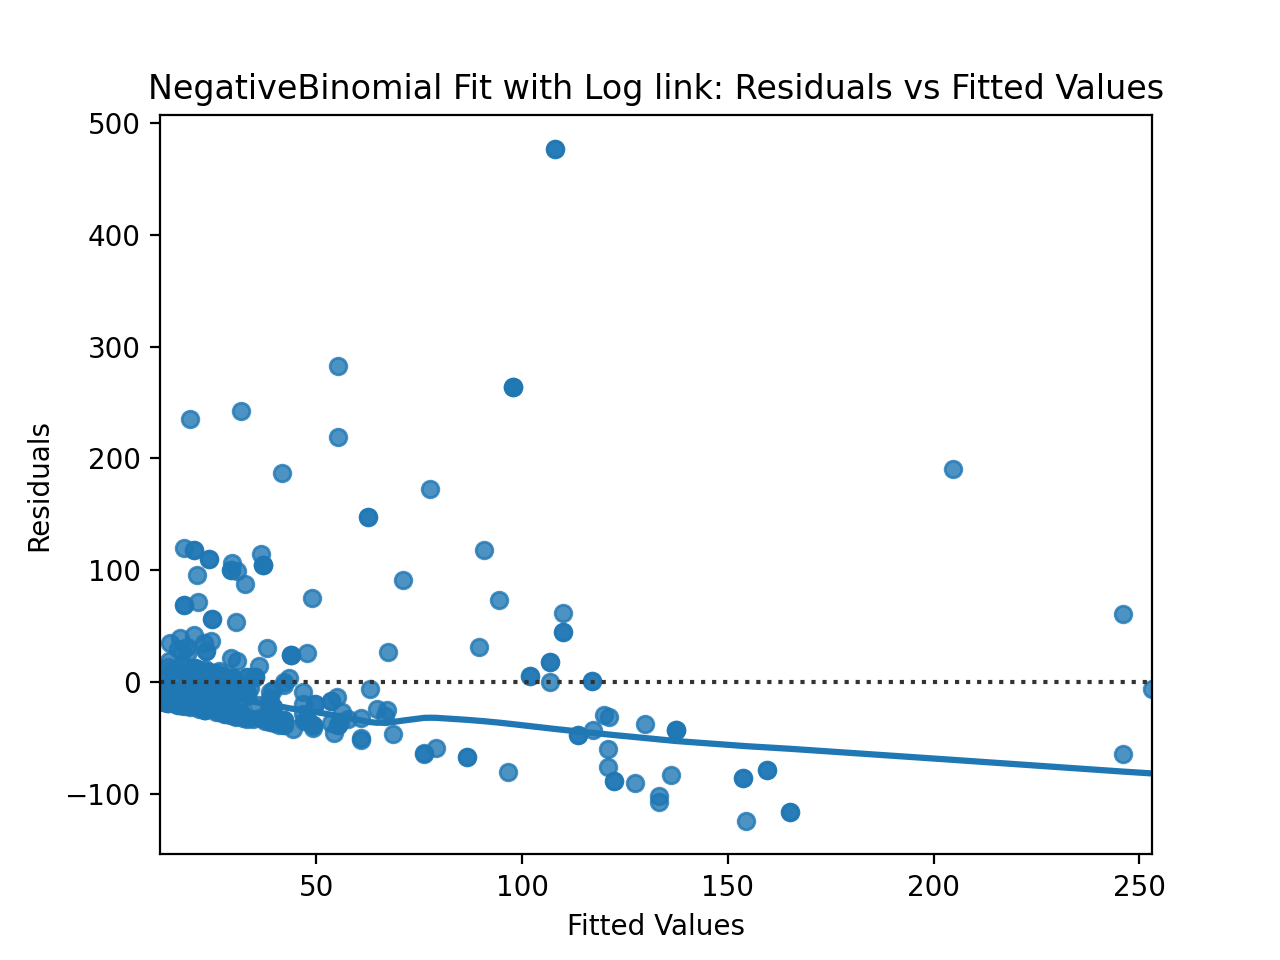

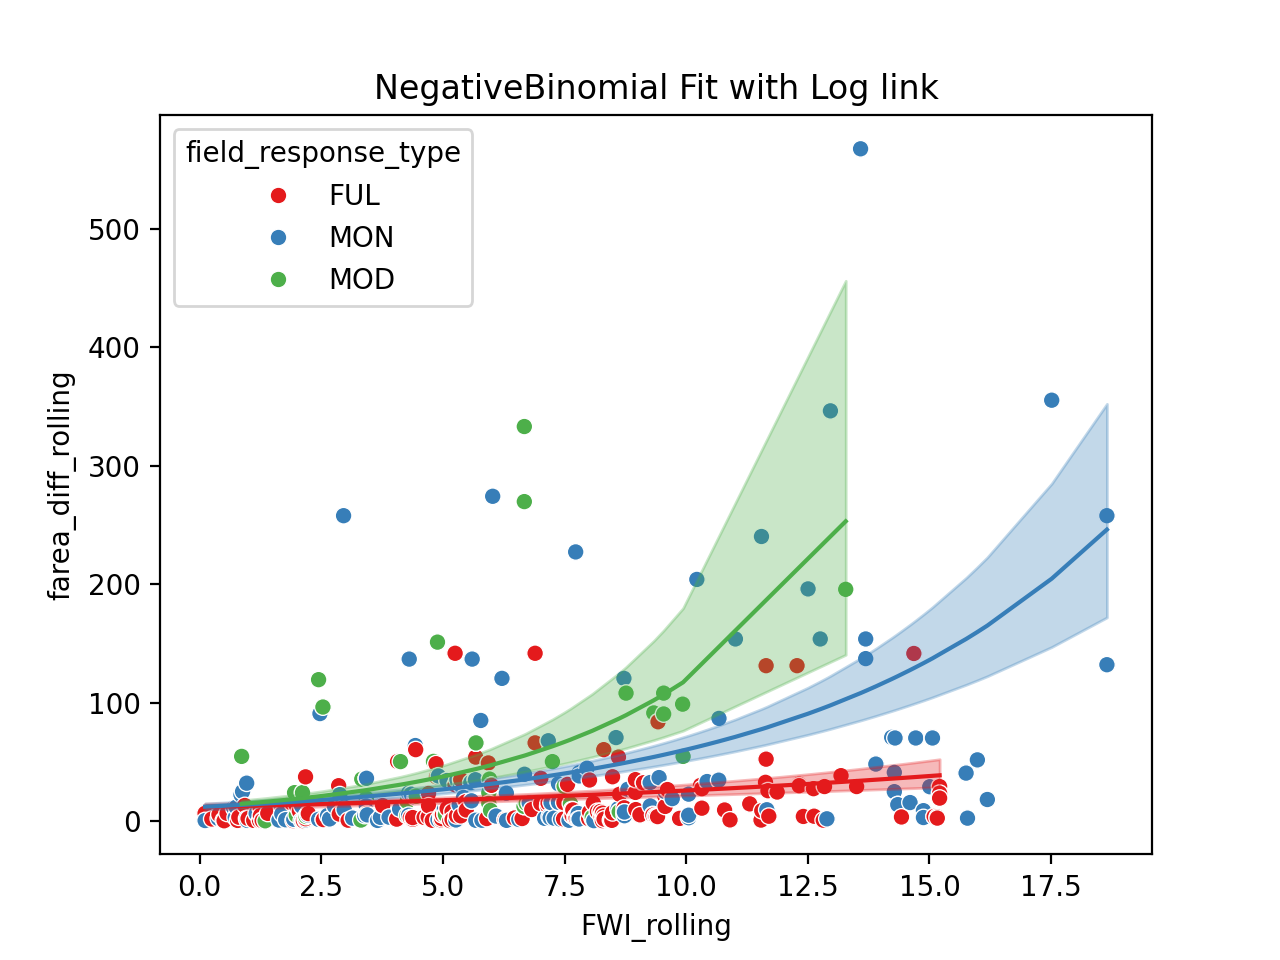

                 Generalized Linear Model Regression Results                  
Dep. Variable:     farea_diff_rolling   No. Observations:                  398
Model:                            GLM   Df Residuals:                      394
Model Family:        NegativeBinomial   Df Model:                            3
Link Function:               Identity   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1761.9
Date:                Tue, 16 Jul 2024   Deviance:                       642.05
Time:                        13:16:54   Pearson chi2:                     785.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.3943
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The Identity link function does not respect the domain of the NegativeBinomial family.
/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance

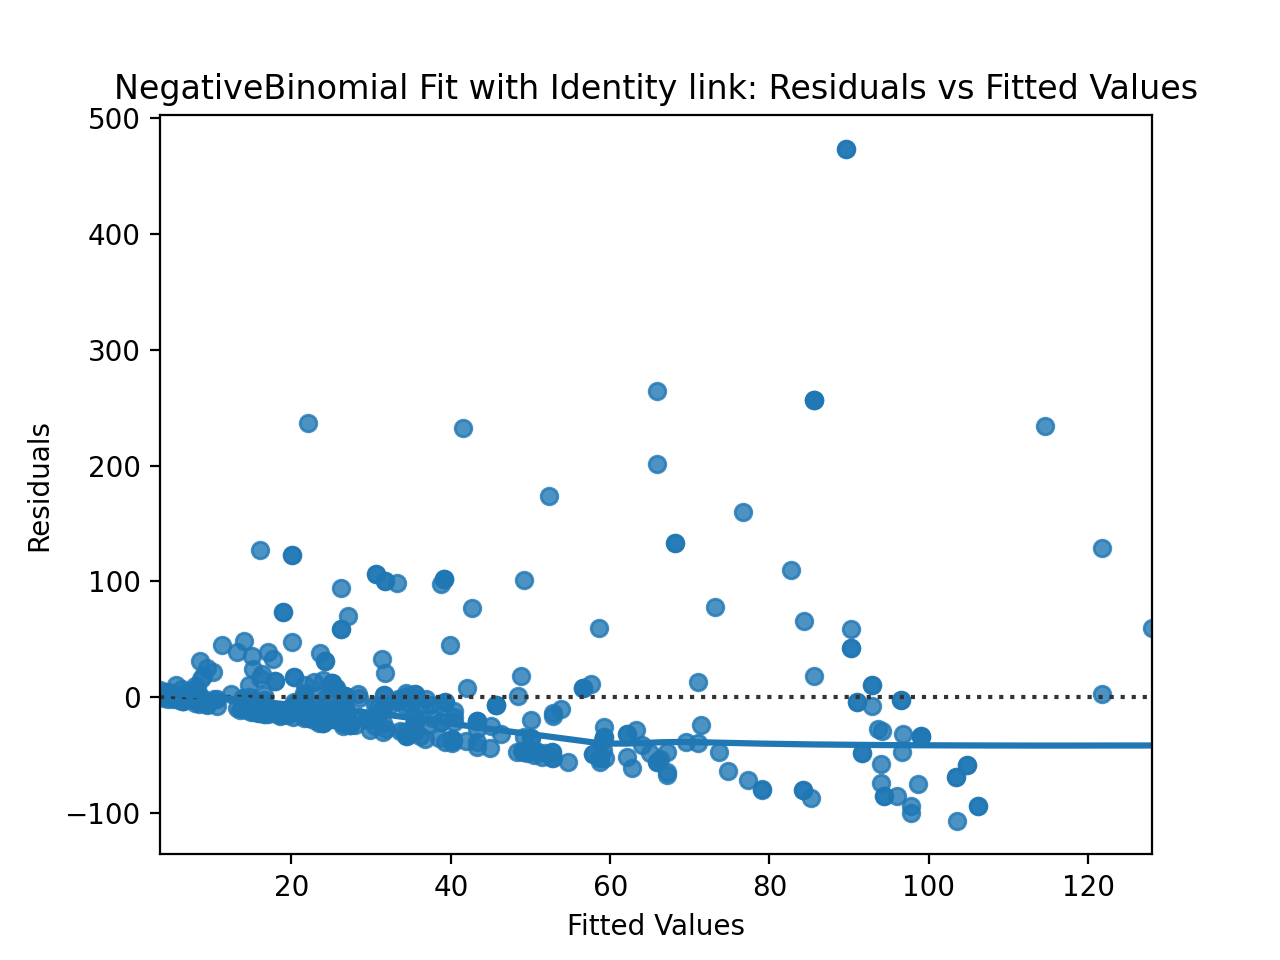

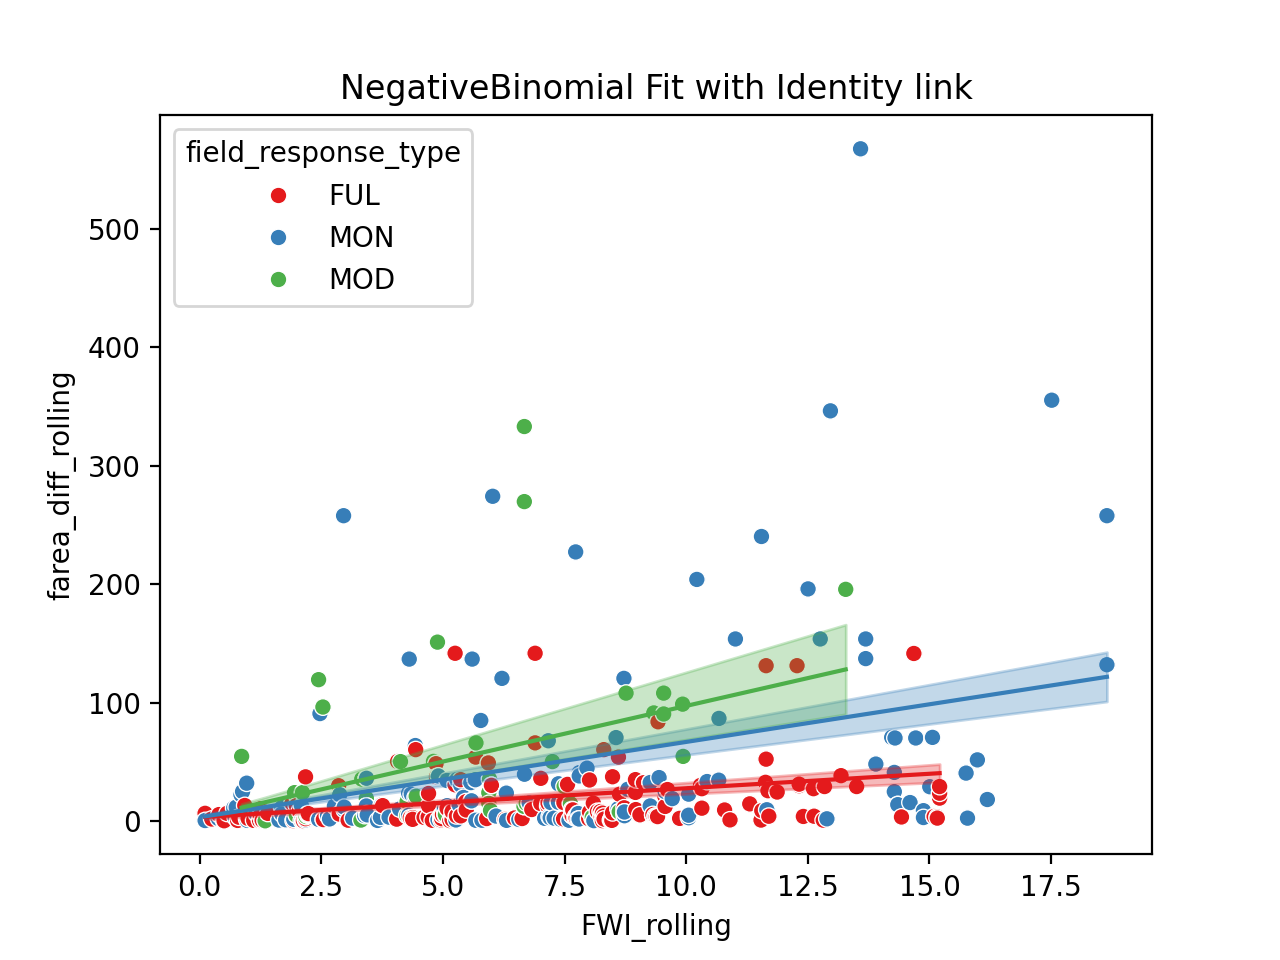

    Family Link_Function Log_Likelyhood           AIC           BIC
4  Poisson           Log        -11297.  22601.806918  18487.175493
  Family Link_Function Log_Likelyhood          AIC          BIC
3  Gamma      Identity        -1743.6  3495.281012 -1642.014025
             Family Link_Function Log_Likelyhood          AIC          BIC
7  NegativeBinomial      Identity        -1761.9  3531.775439 -1716.610616


Family Link_Function Log_Likelyhood           AIC           BIC
0          Gaussian           Log        -2216.0   4440.061686  1.595792e+06
1          Gaussian      Identity        -2215.7   4439.482290  1.593548e+06
2             Gamma           Log        -1756.3   3520.696768 -1.623762e+03
3             Gamma      Identity        -1743.6   3495.281012 -1.642014e+03
4           Poisson           Log        -11297.  22601.806918  1.848718e+04
5           Poisson      Identity        -11211.  22430.341178  1.831571e+04
6  NegativeBinomial           Log        -1770.1   3548.123837 -1.700262e+03
7  NegativeBinomial      Identity        -1761.9   3531.775439 -1.716611e+03

In [21]:
### Looking at only the GEOS-5

row_mask = (~fire3.fireID.str.contains("_")) & (fire3.farea_diff > 0.1) & (fire3.fireID.isin(long_fires)) #& fire3['max_dof'] >= 3#& (fire3.max_duration >= 3)
#row_mask = (~fire3.fireID.str.contains("_")) 

df = fire3[row_mask]

df = df[['fireID', 't',  'GEOS-5.IMERGEARLY', 'FWI',
'field_response_type', 
'FWI_rolling', 'farea_diff_rolling', 'GEOS-5.IMERGEARLY_rolling',"GEOS5_IMERGEARLY_rolling", "log_farea_diff_rolling"]].dropna()

y = "farea_diff_rolling"
x = "FWI_rolling"
c = "field_response_type"
#df = df.sort_values(by = x)

# Unique category labels: 'D', 'F', 'G', ...
# color_labels = df[c].unique()

# # List of RGB triplets

# #rgb_values = sns.color_palette("Set1", 3)
# #rgb_values.reverse()

# # Map label to RGB
# color_map = dict(zip(color_labels, rgb_values))

formula = f"{y} ~ {x}:C({c})"
print(formula)

families = ["Gaussian", "Gamma", "Poisson", "NegativeBinomial"]
links = ["Log", "Identity"]
#links = ["Identity"]

ls = []
fs = []
aic = []
ll = []
bic = []
for f in families:
    for l in links: 
        #desc = ModelDesc.from_formula(formula)
        #desc.describe()

        #sm.families.family.Gamma.links
        #link_g = sm.genmod.families.links.Identity()
        #link_g = sm.genmod.families.links.Log()
        #link_g = sm.genmod.families.links.CLogLog()
        #link_g = sm.genmod.families.links.Sqrt()
        #link_g = sm.genmod.families.links.InversePower()
        #link_g = sm.genmod.families.links.NegativeBinomial()
        #link_g = sm.genmod.families.links.Power()
        
        link_g = getattr(sm.genmod.families.links, l)

        method = getattr(sm.families, f)

        model = smf.glm(formula, data=df, family=method(link = link_g(), check_link=True)).fit() # family=sm.families.Poisson()
        print(model.summary())
        tmp = model.summary2()
        
        fs.append(f)
        ls.append(l)
        aic.append(model.aic)
        ll.append(tmp.tables[0].iloc[2,3])
        bic.append(model.bic)



        df['fitted'] = model.fittedvalues
        df['residuals'] = model.resid_response
        df = df.sort_values(by = x)
        
        # Plot residuals vs fitted values
        res = sns.residplot(x='fitted', y='residuals', data=df, lowess=True)
        res
        plt.title(f'{f} Fit with {l} link: Residuals vs Fitted Values')
        plt.xlabel('Fitted Values')
        plt.ylabel('Residuals')
        plt.show()
        

        predictions = model.get_prediction(df, transform = True) #df, transform = False
        df['predicted'] = predictions.predicted_mean
        df['conf_int_low'], df['conf_int_high'] = predictions.conf_int().T

        actual = sns.scatterplot(x=x, y=y, data=df, hue = c, palette= color_map) # hue = c)
        actual
        # Plot the fitted values
        pred = sns.lineplot(x=x, y='predicted', data=df, hue = c, palette= color_map, legend = False) #  hue =c,
        pred
        # Plot the confidence intervals
        for cat in df[c].unique():
            #print(cat)
            #print(df.loc[(df[c] == cat), [c]].map(color_map))
            plt.fill_between(df.loc[(df[c] == cat)][x], df.loc[(df[c] == cat)]['conf_int_low'], df.loc[(df[c] == cat)]['conf_int_high'],  color=color_map[cat], alpha=0.3)

        plt.title(f'{f} Fit with {l} link')
        plt.xlabel(x)
        plt.ylabel(y)
        #plt.legend()
        plt.show()
        
stats_fwi_rolling = pd.DataFrame({"Family": fs, "Link_Function" : ls,  "Log_Likelyhood": ll, "AIC": aic, "BIC": bic})


print(stats_fwi_rolling[stats_fwi_rolling.Log_Likelyhood.astype("float").min() == stats_fwi_rolling.Log_Likelyhood.astype("float") ])

print(stats_fwi_rolling[stats_fwi_rolling.AIC.astype("float").min() == stats_fwi_rolling.AIC.astype("float") ])
print(stats_fwi_rolling[stats_fwi_rolling.BIC.astype("float").min() == stats_fwi_rolling.BIC.astype("float") ])
stats_fwi_rolling

### Comparing individual models to single-fit model. 

farea_diff_rolling ~ GEOS5_IMERGEARLY_rolling
                 Generalized Linear Model Regression Results                  
Dep. Variable:     farea_diff_rolling   No. Observations:                  398
Model:                            GLM   Df Residuals:                      396
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1791.6
Date:                Tue, 16 Jul 2024   Deviance:                       701.51
Time:                        13:16:56   Pearson chi2:                 1.11e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2967
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------

/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.


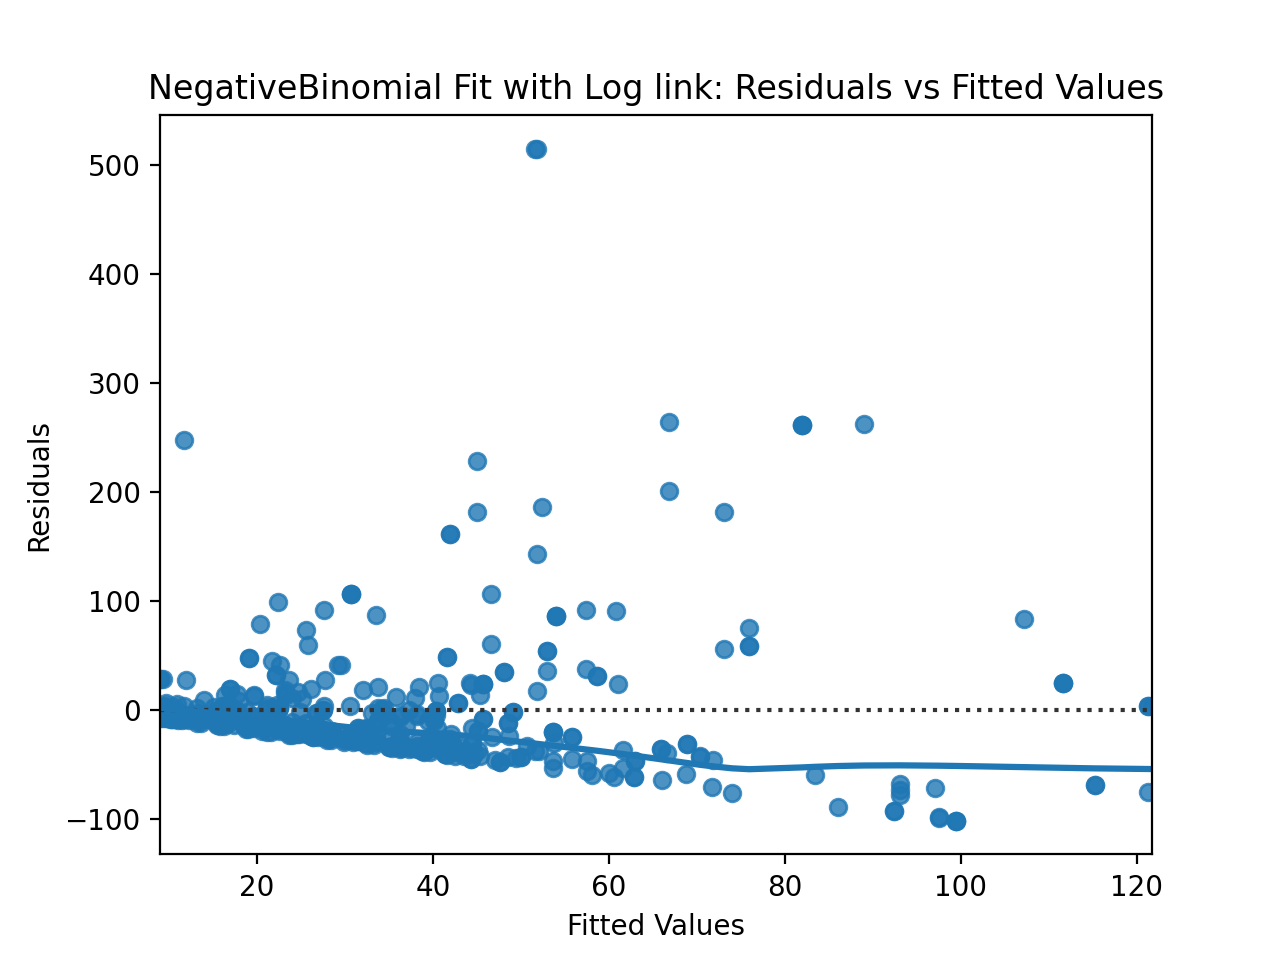

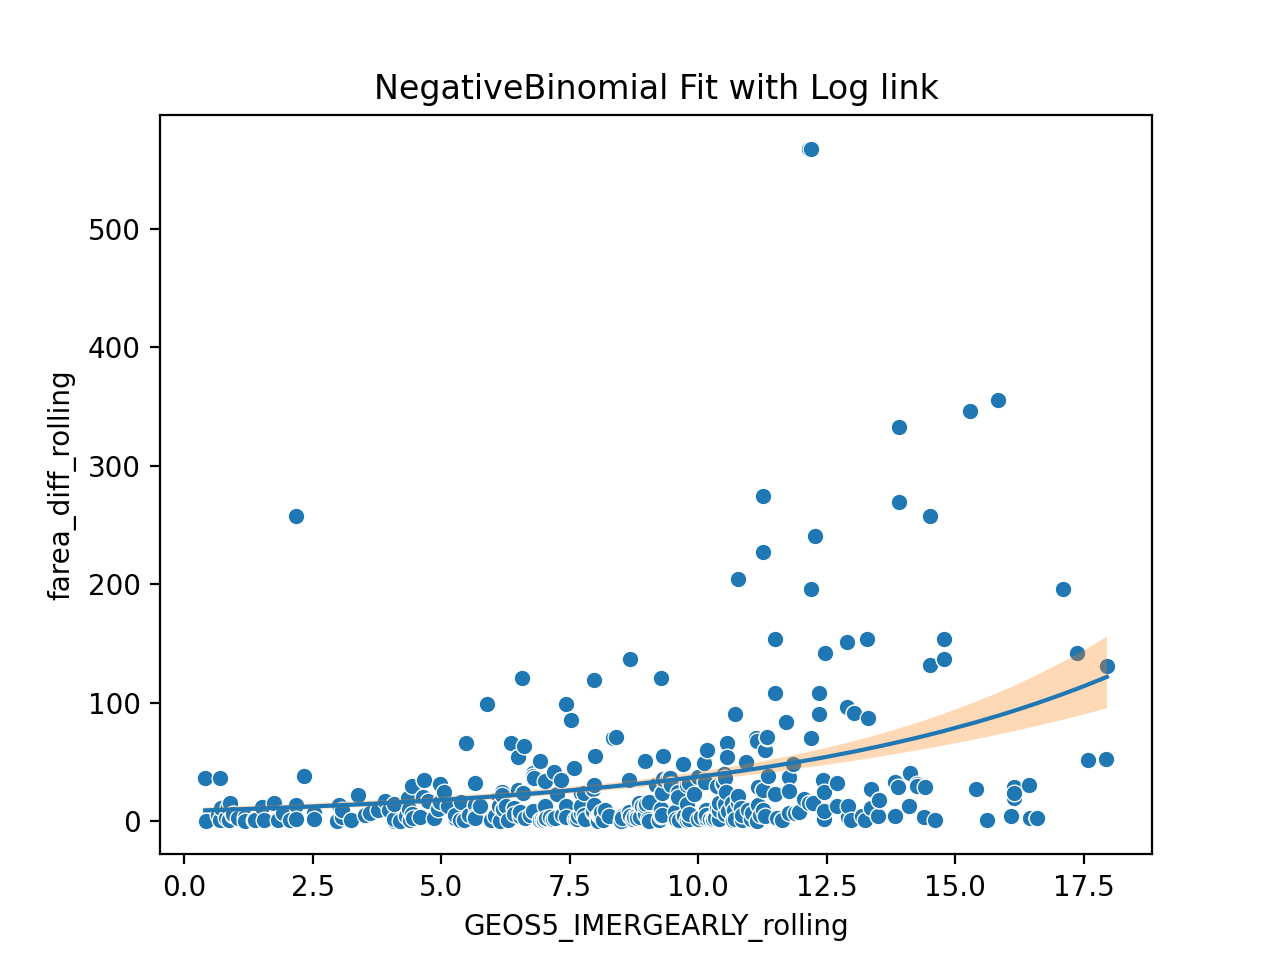

The model with supression had a BIC of: -1775.9809187837304. The model without supression had a BIC of: -1669.1278570127756


Family Link_Function Log_Likelyhood          AIC          BIC
0  NegativeBinomial           Log        -1791.6  3587.231102 -1669.127857

In [22]:
############ GEO5-5 and IMERGE #################


row_mask = (~fire3.fireID.str.contains("_")) & (fire3.farea_diff > 0.1) & (fire3.fireID.isin(long_fires)) #& fire3['max_dof'] >= 3#& (fire3.max_duration >= 3)
#row_mask = (~fire3.fireID.str.contains("_")) 

df = fire3[row_mask]

df = df[['fireID', 't',  'GEOS-5.IMERGEARLY', 'FWI',
'field_response_type', 
'FWI_rolling', 'farea_diff_rolling', 'GEOS-5.IMERGEARLY_rolling',"GEOS5_IMERGEARLY_rolling", "log_farea_diff_rolling"]].dropna()

y = "farea_diff_rolling"
x = "GEOS5_IMERGEARLY_rolling"
c = "field_response_type"


formula = f"{y} ~ {x}"
print(formula)

families = ["NegativeBinomial"] ### Chosen based on BIC (and AIC)
links = ["Log"]
#links = ["Identity"]

ls = []
fs = []
aic = []
ll = []
bic = []
for f in families:
    for l in links: 
        #desc = ModelDesc.from_formula(formula)
        #desc.describe()

        #sm.families.family.Gamma.links
        #link_g = sm.genmod.families.links.Identity()
        #link_g = sm.genmod.families.links.Log()
        #link_g = sm.genmod.families.links.CLogLog()
        #link_g = sm.genmod.families.links.Sqrt()
        #link_g = sm.genmod.families.links.InversePower()
        #link_g = sm.genmod.families.links.NegativeBinomial()
        #link_g = sm.genmod.families.links.Power()
        
        link_g = getattr(sm.genmod.families.links, l)

        method = getattr(sm.families, f)

        model = smf.glm(formula, data=df, family=method(link = link_g(), check_link=True)).fit() # family=sm.families.Poisson()
        print(model.summary())
        tmp = model.summary2()
        
        fs.append(f)
        ls.append(l)
        aic.append(model.aic)
        ll.append(tmp.tables[0].iloc[2,3])
        bic.append(model.bic)

    

        df['fitted'] = model.fittedvalues
        df['residuals'] = model.resid_response
        df = df.sort_values(by = x)
        # Plot residuals vs fitted values
        res = sns.residplot(x='fitted', y='residuals', data=df, lowess=True)
        res
        plt.title(f'{f} Fit with {l} link: Residuals vs Fitted Values')
        plt.xlabel('Fitted Values')
        plt.ylabel('Residuals')
        plt.show()
        

        predictions = model.get_prediction(df, transform = True) #df, transform = False
        df['predicted'] = predictions.predicted_mean
        df['conf_int_low'], df['conf_int_high'] = predictions.conf_int().T

        actual = sns.scatterplot(x=x, y=y, data=df)
        actual
        # Plot the fitted values
        pred = sns.lineplot(x=x, y='predicted', data=df, legend = False)
        pred
        # Plot the confidence intervals
        plt.fill_between(df[x], df['conf_int_low'], df['conf_int_high'], alpha=0.3)

        plt.title(f'{f} Fit with {l} link')
        plt.xlabel(x)
        plt.ylabel(y)
        #plt.legend()
        plt.show()
        
stats_single_model_imerge = pd.DataFrame({"Family": fs, "Link_Function" : ls,  "Log_Likelyhood": ll, "AIC": aic, "BIC": bic})

print(f"The model with supression had a BIC of: {stats.BIC.min()}. The model without supression had a BIC of: {stats_single_model_imerge.BIC.min()}")



stats_single_model_imerge

farea_diff_rolling ~ FWI_rolling
                 Generalized Linear Model Regression Results                  
Dep. Variable:     farea_diff_rolling   No. Observations:                  398
Model:                            GLM   Df Residuals:                      396
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:               Identity   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1800.6
Date:                Tue, 16 Jul 2024   Deviance:                       719.46
Time:                        13:16:58   Pearson chi2:                     985.
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2642
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4

/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The Identity link function does not respect the domain of the NegativeBinomial family.
/projects/myenvs/fireatlas_oct4/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance

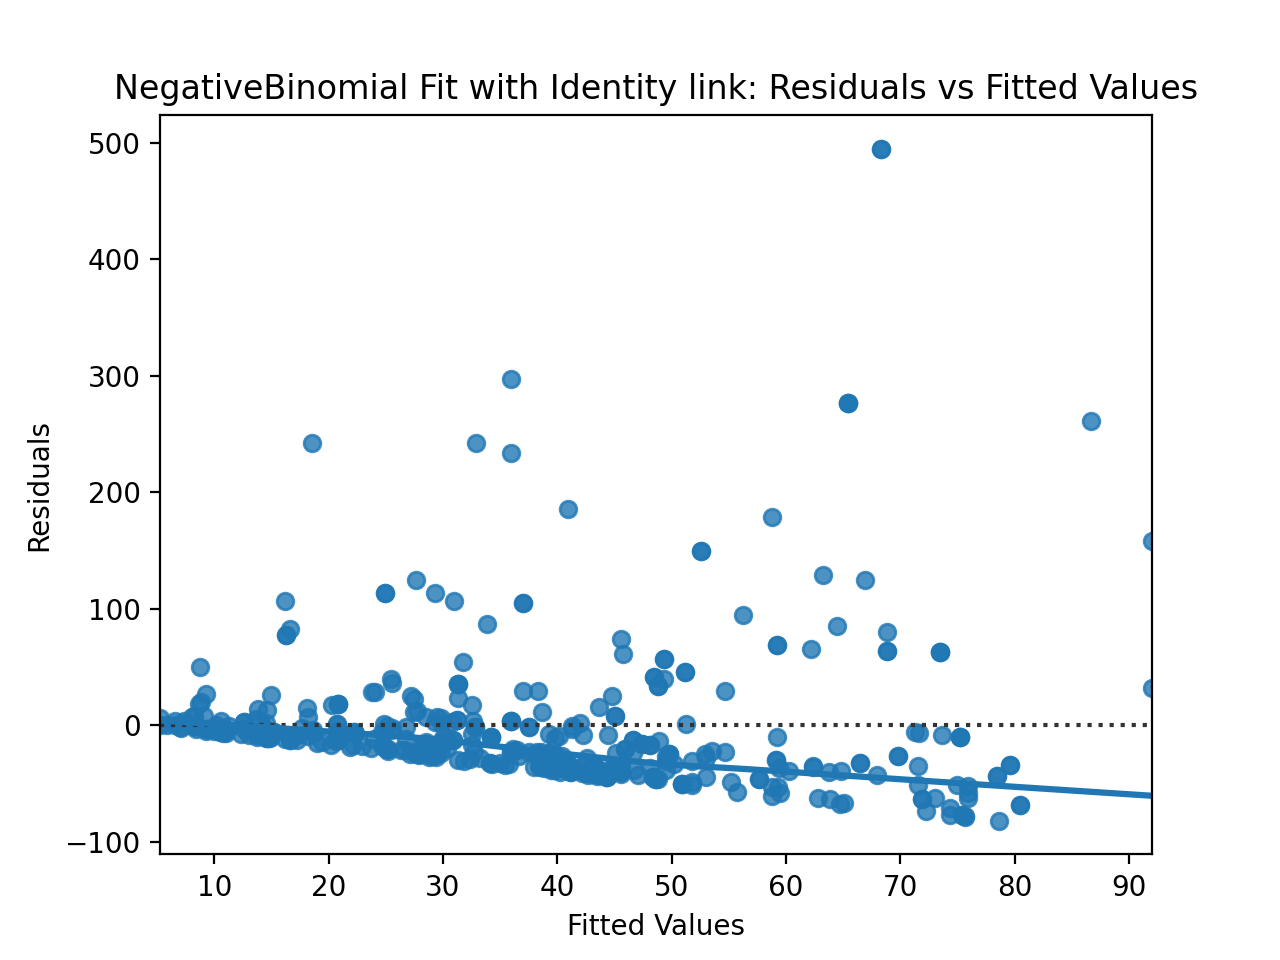

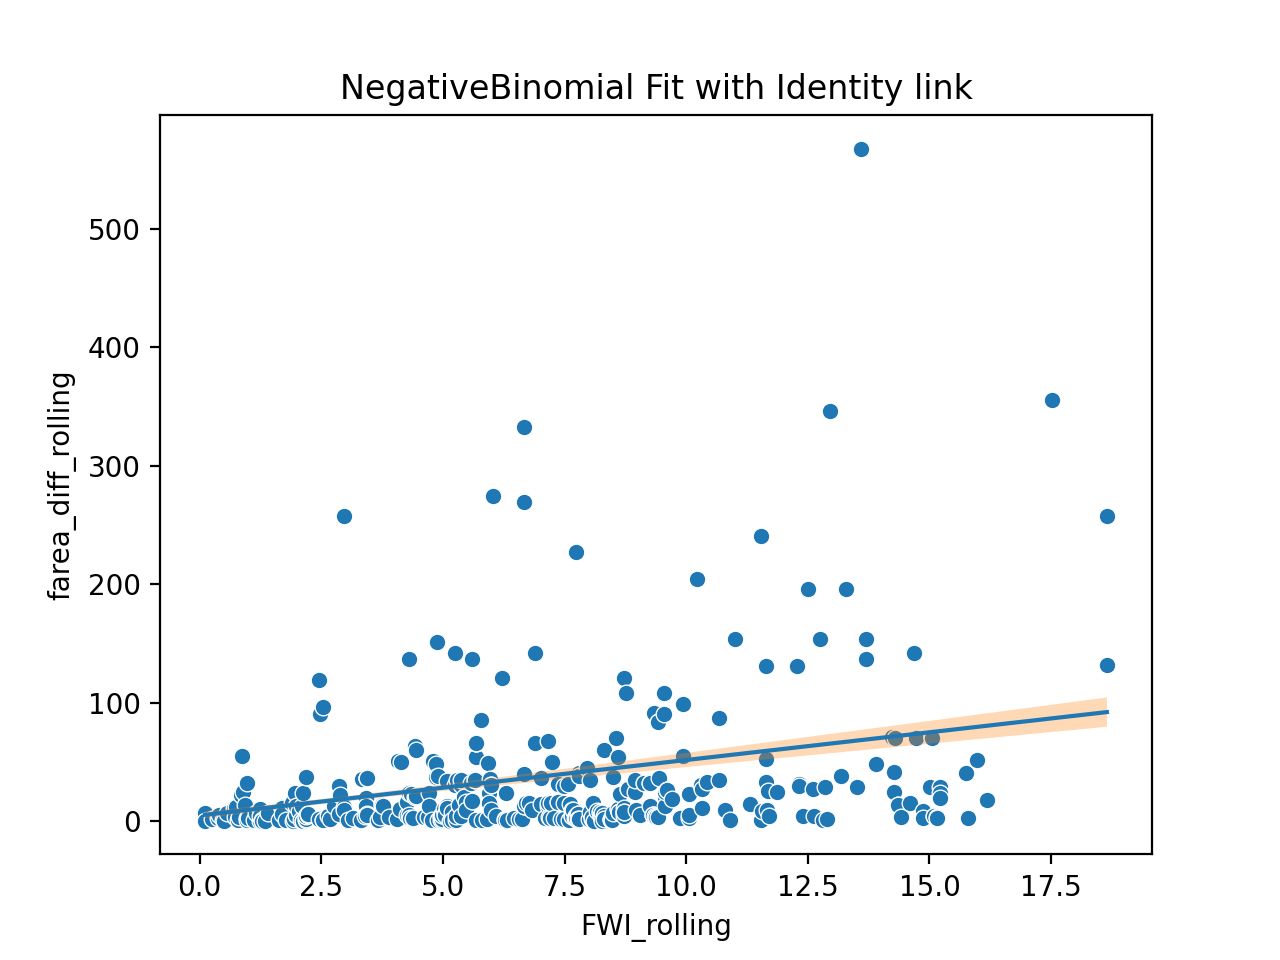

The model with supression had a BIC of: -1716.6106156231024. The model without supression had a BIC of: -1651.1774421773687


Family Link_Function Log_Likelyhood          AIC          BIC
0  NegativeBinomial      Identity        -1800.6  3605.181517 -1651.177442

In [23]:

row_mask = (~fire3.fireID.str.contains("_")) & (fire3.farea_diff > 0.1) & (fire3.fireID.isin(long_fires)) #& fire3['max_dof'] >= 3#& (fire3.max_duration >= 3)
#row_mask = (~fire3.fireID.str.contains("_")) 

df = fire3[row_mask]

df = df[['fireID', 't',  'GEOS-5.IMERGEARLY', 'FWI',
'field_response_type', 
'FWI_rolling', 'farea_diff_rolling', 'GEOS-5.IMERGEARLY_rolling',"GEOS5_IMERGEARLY_rolling", "log_farea_diff_rolling"]].dropna()

y = "farea_diff_rolling"
x = "FWI_rolling"
c = "field_response_type"


formula = f"{y} ~ {x}"
print(formula)

families = ["NegativeBinomial"] ### Chosen based on BIC (and AIC)
links = ["Identity"]
#links = ["Identity"]

ls = []
fs = []
aic = []
ll = []
bic = []
for f in families:
    for l in links: 
        #desc = ModelDesc.from_formula(formula)
        #desc.describe()

        #sm.families.family.Gamma.links
        #link_g = sm.genmod.families.links.Identity()
        #link_g = sm.genmod.families.links.Log()
        #link_g = sm.genmod.families.links.CLogLog()
        #link_g = sm.genmod.families.links.Sqrt()
        #link_g = sm.genmod.families.links.InversePower()
        #link_g = sm.genmod.families.links.NegativeBinomial()
        #link_g = sm.genmod.families.links.Power()
        
        link_g = getattr(sm.genmod.families.links, l)

        method = getattr(sm.families, f)

        model = smf.glm(formula, data=df, family=method(link = link_g(), check_link=True)).fit() # family=sm.families.Poisson()
        print(model.summary())
        tmp = model.summary2()
        
        fs.append(f)
        ls.append(l)
        aic.append(model.aic)
        ll.append(tmp.tables[0].iloc[2,3])
        bic.append(model.bic)



        df['fitted'] = model.fittedvalues
        df['residuals'] = model.resid_response

        # Plot residuals vs fitted values
        res = sns.residplot(x='fitted', y='residuals', data=df, lowess=True)
        res
        plt.title(f'{f} Fit with {l} link: Residuals vs Fitted Values')
        plt.xlabel('Fitted Values')
        plt.ylabel('Residuals')
        plt.show()
        

        predictions = model.get_prediction(df, transform = True) #df, transform = False
        df['predicted'] = predictions.predicted_mean
        df['conf_int_low'], df['conf_int_high'] = predictions.conf_int().T
        df = df.sort_values(by = x)

        actual = sns.scatterplot(x=x, y=y, data=df)
        actual
        # Plot the fitted values
        pred = sns.lineplot(x=x, y='predicted', data=df, legend = False)
        pred
        # Plot the confidence intervals
        #plt.fill_between(df['FWI_rolling'], df['conf_int_low'], df['conf_int_high'], c ="field_response_type", alpha=0.3)
        
        plt.fill_between(df['FWI_rolling'], df['conf_int_low'], df['conf_int_high'], alpha=0.3)

        plt.title(f'{f} Fit with {l} link')
        plt.xlabel(x)
        plt.ylabel(y)
        #plt.legend()
        plt.show()
        
stats_single_model_fwi_rolling = pd.DataFrame({"Family": fs, "Link_Function" : ls,  "Log_Likelyhood": ll, "AIC": aic, "BIC": bic})

print(f"The model with supression had a BIC of: {stats_fwi_rolling.BIC.min()}. The model without supression had a BIC of: {stats_single_model_fwi_rolling.BIC.min()}")



stats_single_model_fwi_rolling

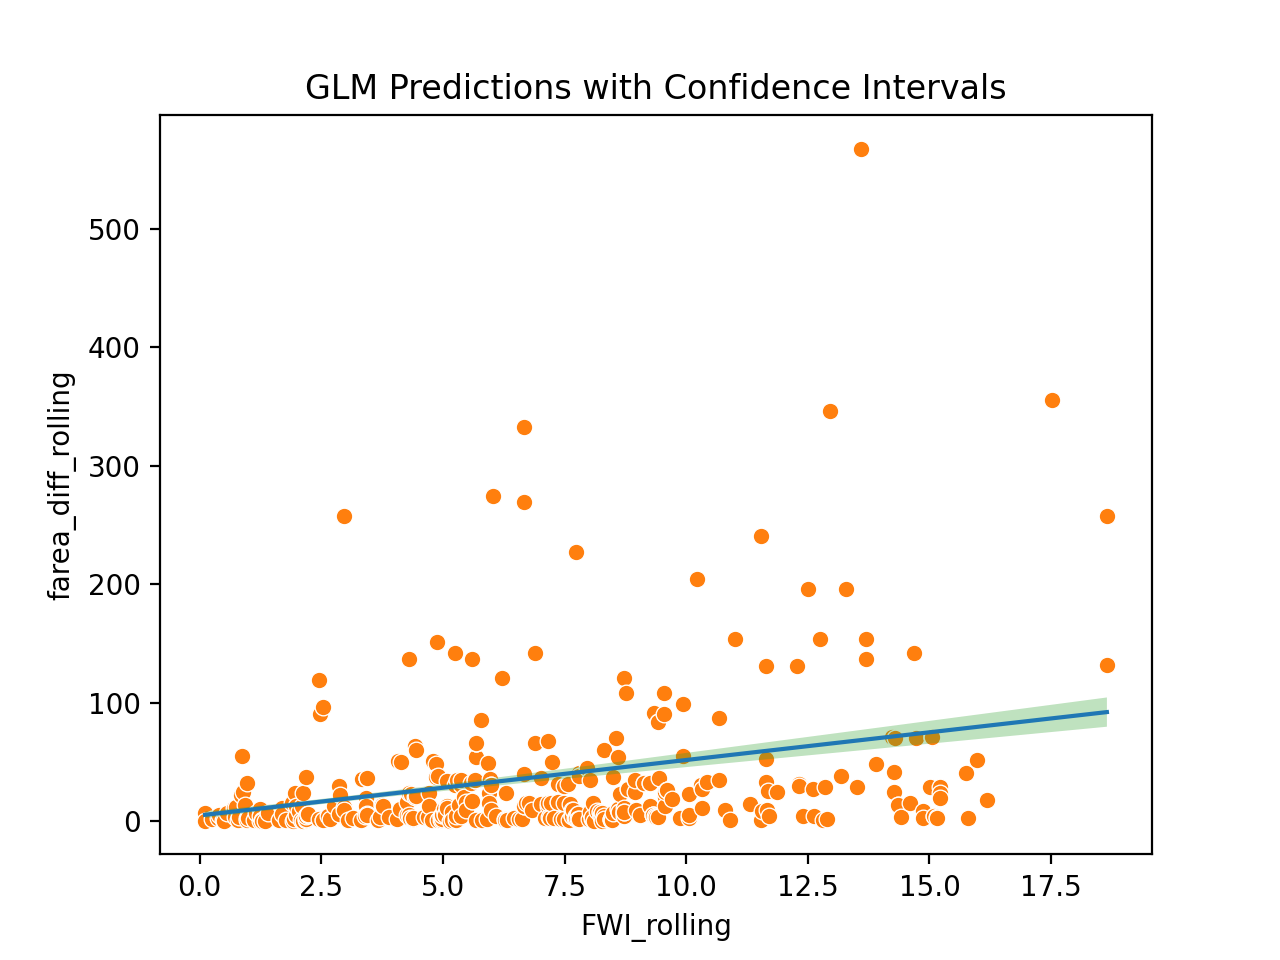

In [27]:
df = df[['fireID', 't',  'GEOS-5.IMERGEARLY', 'FWI',
       'field_response_type', 
       'FWI_rolling', 'farea_diff_rolling', 'GEOS-5.IMERGEARLY_rolling',"GEOS5_IMERGEARLY_rolling",
       'fitted', 'residuals']].dropna()
predictions = model.get_prediction(df)
df['predicted'] = predictions.predicted_mean
df['conf_int_low'], df['conf_int_high'] = predictions.conf_int(method = "delta").T

df = df.sort_values(by = 'FWI_rolling')

actual = sns.scatterplot(x='FWI_rolling', y='farea_diff_rolling', data=df)
actual
# Plot the fitted values
pred = sns.lineplot(x='FWI_rolling', y='predicted', data=df, legend = False)
pred
# Plot the confidence intervals
plt.fill_between(df['FWI_rolling'], df['conf_int_low'], df['conf_int_high'], alpha=0.3)

plt.title('GLM Predictions with Confidence Intervals')
plt.xlabel('FWI_rolling')
plt.ylabel('farea_diff_rolling')
#plt.legend()
plt.show()

In [26]:
#plt.scatter(df[x], df[y], hue = df[c])

# Supplemental Exploratory plots

- Supression by day-of-fire

- Supression vs fuels for explaining stuff

# Misc exploratory stuff

In [ ]:
## For plot of farea_diff_folling vs GEOS-5.IMERGEEARLY_rolling, two outliers

## Outlier 10972 @ 7/07 -- Still looks like a peak temporal missmatch. Rolling over more numers didn't get rid ove it though. 

### Ourlier 10406 @ 06/22 -- looks like either som small temporal mismatch OR more likely that the IMERGE EARLY FWI got it a little better. 

fire3

In [ ]:
# import geoviews
# import hvplot.pandas
# #from bokeh.models import DatetimeTickFormatter, HoverTool







# fire3[row_mask].hvplot.scatter(x = "GEOS-5.IMERGEARLY_rolling", y = "farea_diff_rolling", hover_cols = ["fireID", "t"] )

    

In [ ]:
#fire3[(fire3.fireID.str.contains("8474")) & (fire3.t == "2023-06-07 12:00:00") ].sort_values(by = "t").fireID.unique()#.explore(style_kwds = {"fillOpacity": 0})


fire3[(fire3.fireID.str.contains("8635"))].sort_values(by = "t").fireID.unique()#.explore(style_kwds = {"fillOpacity": 0})

In [ ]:
fire3[row_mask & (fire3.fireID == "10972") ].sort_values(by = "t") ### Missing some polygons??????????
#print(fire3[row_mask & (fire3.fireID == "10972") & (~fire3.geometry.isna())].t.min())

In [ ]:



density_tansform = fire3[row_mask].groupby(["fireID", "field_response_type"]).farea.max().reset_index()
print(len(density_tansform.fireID.unique()))
print(len(density_tansform.fireID))
#density_tansform

row_mask = (~fire3.fireID.str.contains("_")) & (fire3.farea_diff > 0.1) & (fire3.fireID.isin(long_fires)) #& fire3['max_dof'] >= 3#& (fire3.max_duration >= 3)

p = (ggplot(density_tansform, aes(x = "farea", color = "field_response_type"))
        #p = (ggplot(fire3[row_mask], aes( x = x, y = y, color = "farea_shifted"))
     + plotnine.geom_density()
     #+ plotnine.labels.ylab(y)
     + plotnine.labels.xlab("Maximum fire area (km^2) before merging")
     #+ stat_smooth(method = "glm")
     #+ plotnine.scale_y_log10()
     + plotnine.scale_x_log10()
     #+ plotnine.ggtitle(f"{agg_function} in rolling window of {rolling_num} days")

     )
print(p)

In [ ]:
import seaborn as sns

sns.histplot(data=density_tansform, x="farea", hue = "field_response_type")

In [ ]:
p = (ggplot(density_tansform, aes(x = "farea", fill = "field_response_type"))
        #p = (ggplot(fire3[row_mask], aes( x = x, y = y, color = "farea_shifted"))
     + plotnine.geom_histogram(bins = 17)
     #+ plotnine.labels.ylab(y)
     + plotnine.labels.xlab("Maximum fire area (km) before merging")
     #+ stat_smooth(method = "glm")
     #+ plotnine.scale_y_log10()
     + plotnine.scale_x_log10()
     #+ plotnine.ggtitle(f"{agg_function} in rolling window of {rolling_num} days")

     )
print(p)

In [ ]:
density_tansform = fire3[row_mask].groupby(["fireID", "field_response_type"]).farea.min().reset_index()
print(len(density_tansform.fireID.unique()))
print(len(density_tansform.fireID))


p = (ggplot(density_tansform, aes(x = "farea", fill = "field_response_type"))
        #p = (ggplot(fire3[row_mask], aes( x = x, y = y, color = "farea_shifted"))
     + plotnine.geom_histogram(bins = 17)
     #+ plotnine.labels.ylab(y)
     + plotnine.labels.xlab("Fire area (km^2) at start of fire")
     #+ stat_smooth(method = "glm")
     #+ plotnine.scale_y_log10()
     + plotnine.scale_x_log10()
     #+ plotnine.ggtitle(f"{agg_function} in rolling window of {rolling_num} days")

     )
print(p)

In [ ]:

row_mask = (~fire3.fireID.str.contains("_")) & (fire3.farea_diff > 0.1) & (fire3.fireID.isin(long_fires)) #& fire3['max_dof'] >= 3#& (fire3.max_duration >= 3)


p = (ggplot(fire3[row_mask], aes(x = "farea_diff", color = "field_response_type"))
        #p = (ggplot(fire3[row_mask], aes( x = x, y = y, color = "farea_shifted"))
     #+ plotnine.geom_histogram(bins = 17)
     + plotnine.geom_density()
     #+ plotnine.labels.ylab(y)
     + plotnine.labels.xlab("difference in fire area (km^2)")
     #+ stat_smooth(method = "glm")
     #+ plotnine.scale_y_log10()
     + plotnine.scale_x_log10()
     #+ plotnine.ggtitle(f"{agg_function} in rolling window of {rolling_num} days")

     )
print(p)

In [ ]:
density_tansform[density_tansform.farea >= 500]

In [ ]:
# #from plotnine import *

# df = pd.DataFrame({
#     'x': [1, 2, 3, 4, 5],
#     'y': [1, 4, 9, 16, 25],
#     'color_var': [1, 1, 2, 2, 3]  # Numerical variable
# })

# # Plot using ggplot (plotnine) with numerical gradient color scale
# p = (ggplot(df, aes(x='x', y='y', color='color_var')) +
#      geom_point() +
#      scale_color_continuous(low="#0000FF", high="#FF0000") +  # Specify the colors for low and high values
#      labs(title='Plot with Numerical Gradient Color Scale')
#     )

# print(p)

In [ ]:
fire3.columns

In [ ]:
# fire3[['fireID', 't', 'farea_diff', 'FWI_diff', 'FWI_rolling',
#        'day_of_fire', 'farea_shifted', 'normalized_farea_diff',
#        'FWI_diff_rolling', 'farea_rolling', 'farea_diff_rolling',
#        'max_dof', 'duration']]

In [ ]:
 p = (ggplot(fire3[row_mask], aes( x = x, y = y, color = "field_response_type"))
         + geom_point()
         + plotnine.labels.ylab(y)
         + plotnine.labels.xlab(x)
         + stat_smooth(method = "glm")
         #+ plotnine.scale_y_log10()
         + plotnine.ggtitle(f"{agg_function} in window of {rolling_num}")

        )
print(p)

In [ ]:
FWI_sorted = fire3[row_mask].sort_values(by = "FWI", ascending= True)

In [ ]:
FWI_sorted[(FWI_sorted.farea_diff >= 50) & FWI_sorted.FWI <= 3].t.astype("datetime64[ns]").hist()

In [ ]:
#FWI_sorted[(FWI_sorted.farea_diff >= 50) & FWI_sorted.FWI <= 3].lat.hist()

In [ ]:
FWI_sorted.columns

# FWI_sorted = FWI_sorted[['fireID', 't', 'geometry',
#        'n_pixels', 'n_newpixels', 'farea', 'fperim', 'flinelen', 'duration',
#        'pixden', 'meanFRP', 'GEOS-5.IMERGEARLY', 'FWI', 'FWI_lead_1',
#        'FWI_lead_2', 'FWI_lead_3', 'FWI_lead_4', 'FWI_lead_5', 'FWI_lead_6',
#        'FWI_lead_7', 'FWI_lead_8', 'farea_diff']]

In [ ]:
big_sp_low_fwi = FWI_sorted[(FWI_sorted.farea_diff >= 50) & FWI_sorted.FWI <= 3]

big_sp_big_fwi = FWI_sorted[(FWI_sorted.farea_diff >= 100) & (FWI_sorted.FWI >= 10)]

low_sp_big_fwi = FWI_sorted[(FWI_sorted.farea_diff <= 100) & (FWI_sorted.FWI >= 10)]

In [ ]:
big_sp_low_fwi = big_sp_low_fwi.to_crs("EPSG:4326")
big_sp_big_fwi = big_sp_big_fwi.to_crs("EPSG:4326")

In [ ]:
big_sp_low_fwi.to_file("/projects/old_shared/fire_weather_vis/Lightning_analysis/Shapefiles/big_spread_low_fwi/low_FWI.shp")

In [ ]:
big_sp_big_fwi.to_file("/projects/old_shared/fire_weather_vis/Lightning_analysis/Shapefiles/big_spread_high_fwi/high_FWI.shp")

In [ ]:
import matplotlib.pyplot as plt

big_sp_big_fwi.t.astype("datetime64[ns]").hist()
plt.xticks(rotation='vertical')

In [ ]:
big_sp_low_fwi.t.astype("datetime64[ns]").hist()

In [ ]:
big_sp_big_fwi

In [ ]:
big_sp_big_fwi

In [ ]:
#import skgstat as skg

In [ ]:
big_sp_big_fwi

In [ ]:
low_sp_big_fwi.columns

In [ ]:
low_sp_big_fwi[['fireID', 't', 'geometry', 'n_pixels', 'n_newpixels', 'farea', 'fperim',
       'flinelen', 'duration', 'meanFRP', 'GEOS-5.IMERGEARLY', 'FWI', 'farea_diff']]

In [ ]:
plt.scatter(low_sp_big_fwi.farea_diff.astype("float"), low_sp_big_fwi["GEOS-5.IMERGEARLY"].astype("float"))
plt.show()

In [ ]:
plt.scatter(low_sp_big_fwi.farea_diff.astype("float"), low_sp_big_fwi["FWI"].astype("float"))
plt.show()

In [ ]:
### Playing with growth rate

fire3["flinelen_shifted"] = fire3.groupby("fireID").flinelen.shift(periods = 1)
fire3["fperim_shifted"] = fire3.groupby("fireID").fperim.shift(periods = 1)
fire3["flinelen_diff"] = fire3.groupby("fireID").flinelen.diff()
fire3["fperim_diff"] = fire3.groupby("fireID").fperim.diff()


### Implementing FBP technical handbook equation 88 https://drive.google.com/file/d/1xBseasON22KFC4jEVBKk75EOuUK-dpM2/view

#1) Calculate the length and breadth of the fires. Simple way, get just the convex hull and the longer one is length. More complex, length shoudl maybe be tied to where active fire line is (to represent head fire?)
from shapely.geometry import LineString

def get_length_to_breadth(polygon):
    
    mbr_points = list(zip(*polygon.minimum_rotated_rectangle.exterior.coords.xy)) ### oh no projection issues? 
    # calculate the length of each side of the minimum bounding rectangle
    mbr_lengths = [LineString((mbr_points[i], mbr_points[i+1])).length for i in range(len(mbr_points) - 1)]

    # get major/minor axis measurements
    minor_axis = min(mbr_lengths)
    major_axis = max(mbr_lengths)
    
    return(major_axis/minor_axis)



fire3["LB"] = fire3.geometry.apply(get_length_to_breadth)


## Calculate spread rate

row_mask = (fire3.fperim_diff > 0.1) & (fire3.flinelen > 0)
perimeter_growth_rate = fire3[row_mask]["fperim_diff"] ### Modify by length of active fire line? 
LB = fire3[row_mask]["LB"]


fire3["spread_rate"] = np.nan
fire3.loc[row_mask, "spread_rate"] = 1/(2*((np.pi * (1+(1/LB)) * (1 + ((LB -1)/(2*(LB+1)))**2)) / perimeter_growth_rate ))


fire3["flinelen_rolling"]  = fire3.groupby("fireID").flinelen.rolling(rolling_num).agg(agg_function).reset_index(drop = True)
fire3["flinelen_diff_rolling"] = fire3.groupby("fireID").flinelen_diff.rolling(rolling_num).agg(agg_function).reset_index(drop = True)
fire3["fperim_rolling"] = fire3.groupby("fireID").fperim.rolling(rolling_num).agg(agg_function).reset_index(drop = True)
fire3["fperim_diff_rolling"] = fire3.groupby("fireID").fperim_diff.rolling(rolling_num).agg(agg_function).reset_index(drop = True)
fire3["spread_rate_rolling"] = fire3.groupby("fireID").spread_rate.rolling(rolling_num).agg(agg_function).reset_index(drop = True)


long_fires = fire3[fire3.day_of_fire > 3].fireID.unique()
#fire3['max_dof'] = fire3.groupby("fireID").day_of_fire.max()

row_mask = (~fire3.fireID.str.contains("_")) & (fire3.farea_diff > 0.1) & (fire3.fireID.isin(long_fires)) #& fire3['max_dof'] >= 3#& (fire3.max_duration >= 3)

#x_var = ["FWI","FWI_rolling", "FWI_diff_rolling", "FWI_norm_rolling"]
#y_var = ['farea', "normalized_farea_diff", 'farea_rolling', 'farea_diff_rolling']

#x_var = ["FWI","FWI_rolling", "FWI_diff_rolling"]
#y_var = ["flinelen", "flinelen_rolling", "flinelen_diff_rolling", "fperim_rolling", "fperim_diff_rolling", "spread_rate", "spread_rate_rolling"]

x_var = ["FWI","FWI_rolling", "FWI_diff_rolling", "GEOS-5.IMERGEARLY", "GEOS-5.IMERGEARLY_rolling"]
y_var = ["flinelen_shifted", "spread_rate", "spread_rate_rolling"]


for x in x_var:
    for y in y_var:
        #p = (ggplot(fire3[row_mask], aes( x = x, y = y))
        p = (ggplot(fire3[row_mask], aes( x = x, y = y, color = "field_response_type"))
        #p = (ggplot(fire3[row_mask], aes( x = x, y = y, color = "farea_shifted"))
         + geom_point()
         + plotnine.labels.ylab(y)
         + plotnine.labels.xlab(x)
         + stat_smooth(method = "glm")
         #+ plotnine.scale_y_log10()
         + plotnine.ggtitle(f"{agg_function} in rolling window of {rolling_num} days")

         )
        print(p)
        #del(p)

In [ ]:
row_mask = fire3.farea_diff >0.1

# plt.scatter(fire3[row_mask].farea_diff, ((fire3[row_mask].flinelen_shifted) * fire3[row_mask]["GEOS-5.IMERGEARLY"]))
# plt.show()

y = "farea_diff"



p = (ggplot(fire3[row_mask], aes(x = (fire3[row_mask].flinelen_shifted) * fire3[row_mask]["GEOS-5.IMERGEARLY"], y = y, color = "field_response_type"))
+ geom_point()
+ plotnine.labels.ylab(y)
+ plotnine.labels.xlab("fireline len * FWI")
+ stat_smooth(method = "glm")
+ plotnine.ggtitle(f"{agg_function} in rolling window of {rolling_num} days"))
print(p)

In [ ]:
y = "fperim_diff"


p = (ggplot(fire3[row_mask], aes(x = (fire3[row_mask].flinelen_shifted) * fire3[row_mask]["GEOS-5.IMERGEARLY"], y = y, color = "field_response_type"))
+ geom_point()
+ plotnine.labels.ylab(y)
+ plotnine.labels.xlab("fireline len * FWI")
+ stat_smooth(method = "glm")
+ plotnine.ggtitle(f"{agg_function} in rolling window of {rolling_num} days"))
print(p)